# load the dataset

In [167]:
import os
DATADIR = "C:/iris_dataset"
# List of folder names (categories)
CATEGORIES = [folder for folder in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, folder))]
print(CATEGORIES)

['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142'

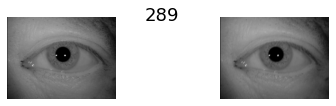

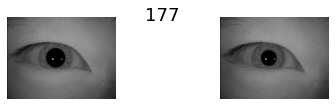

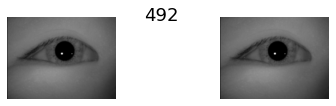

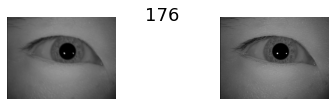

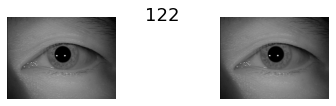

In [168]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Set the number of categories to display
num_categories_to_display = 5

# Randomly select 5 categories from the list of categories
selected_categories = random.sample(CATEGORIES, num_categories_to_display)

# Visualizing the images for the selected categories
for category in selected_categories:
    # Constructing the path
    path = os.path.join(DATADIR, category)
    images = os.listdir(path)

    # Create a figure for the category
    fig, ax = plt.subplots(1, 2, figsize=(7, 1.5))
    fig.suptitle(f'{category}', fontsize=18)

    for i in range(2):
        # Select a random image
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        # Convert the BGR image to RGB
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

        # Display the image
        ax[i].imshow(img_rgb)
        ax[i].axis('off')

    # Show the figure and then close it to free memory
    plt.show()
    plt.close(fig)


In [169]:
def count_images(directory):
  for category in CATEGORIES:
    path = os.path.join(directory, category)
    images = os.listdir(path)
    num_images = len(images)
    print(f'{category} : {num_images} images')

count_images(DATADIR)

000 : 10 images
001 : 10 images
002 : 10 images
003 : 10 images
004 : 10 images
005 : 10 images
006 : 10 images
007 : 10 images
008 : 10 images
009 : 10 images
010 : 10 images
011 : 10 images
012 : 10 images
013 : 10 images
014 : 10 images
015 : 10 images
016 : 10 images
017 : 10 images
018 : 10 images
019 : 10 images
020 : 10 images
021 : 10 images
022 : 10 images
023 : 10 images
024 : 10 images
025 : 10 images
026 : 10 images
027 : 10 images
028 : 10 images
029 : 10 images
030 : 10 images
031 : 10 images
032 : 10 images
033 : 10 images
034 : 10 images
035 : 10 images
036 : 10 images
037 : 10 images
038 : 10 images
039 : 10 images
040 : 10 images
041 : 10 images
042 : 10 images
043 : 10 images
044 : 10 images
045 : 10 images
046 : 10 images
047 : 10 images
048 : 10 images
049 : 10 images
050 : 10 images
051 : 10 images
052 : 10 images
053 : 10 images
054 : 10 images
055 : 10 images
056 : 10 images
057 : 10 images
058 : 10 images
059 : 10 images
060 : 10 images
061 : 10 images
062 : 10

In [170]:
img_array.shape

(480, 640, 3)

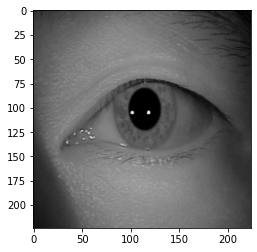

In [171]:
# resizing images
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
import os
import cv2
import numpy as np

def load_images_and_labels(base_dir, img_size=(224, 224)):
    images = []
    labels = []
    
    # Loop over each folder in the dataset directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        # Ensure that we are only processing directories (i.e., label folders)
        if os.path.isdir(folder_path):
            # Loop over each image in the folder
            for image_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, image_name)
                print(f"Loading image: {img_path}")  # Debugging line
                
                # Read and resize the image
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Failed to load image: {img_path}")
                    continue
                
                img = cv2.resize(img, img_size)  # Resize to match EfficientNet input size
                
                # Append the image and the label (folder name)
                images.append(img)
                labels.append(int(folder_name))  # Assuming folder name is the label (e.g., 1, 2, 3, etc.)
    
    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    print("Before normalizing the images:")
    print("Images shape:", images.shape)
    print("Images:", images)
    print("Images type:",images.dtype)
    
    # Normalize images to the range [0, 1]
    images = images.astype(np.float32) / 255.0
    print("After normalizing:")
    print("Images shape:", images.shape)
    print("Images:", images)
    print("Images type",images.dtype)
    
    print(f"Loaded {len(images)} images after quality check.")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

    return images, labels

# Load images and labels
image_dir = "C:/iris_dataset"  # Replace with the correct path
images, labels = load_images_and_labels(image_dir)

Loading image: C:/iris_dataset\000\S6000S00.jpg
Loading image: C:/iris_dataset\000\S6000S01.jpg
Loading image: C:/iris_dataset\000\S6000S02.jpg
Loading image: C:/iris_dataset\000\S6000S03.jpg
Loading image: C:/iris_dataset\000\S6000S04.jpg
Loading image: C:/iris_dataset\000\S6000S05.jpg
Loading image: C:/iris_dataset\000\S6000S06.jpg
Loading image: C:/iris_dataset\000\S6000S07.jpg
Loading image: C:/iris_dataset\000\S6000S08.jpg
Loading image: C:/iris_dataset\000\S6000S09.jpg
Loading image: C:/iris_dataset\001\S6001S00.jpg
Loading image: C:/iris_dataset\001\S6001S01.jpg
Loading image: C:/iris_dataset\001\S6001S02.jpg
Loading image: C:/iris_dataset\001\S6001S03.jpg
Loading image: C:/iris_dataset\001\S6001S04.jpg
Loading image: C:/iris_dataset\001\S6001S05.jpg
Loading image: C:/iris_dataset\001\S6001S06.jpg
Loading image: C:/iris_dataset\001\S6001S07.jpg
Loading image: C:/iris_dataset\001\S6001S08.jpg
Loading image: C:/iris_dataset\001\S6001S09.jpg
Loading image: C:/iris_dataset\002\S6002

Loading image: C:/iris_dataset\017\S6017S03.jpg
Loading image: C:/iris_dataset\017\S6017S04.jpg
Loading image: C:/iris_dataset\017\S6017S05.jpg
Loading image: C:/iris_dataset\017\S6017S06.jpg
Loading image: C:/iris_dataset\017\S6017S07.jpg
Loading image: C:/iris_dataset\017\S6017S08.jpg
Loading image: C:/iris_dataset\017\S6017S09.jpg
Loading image: C:/iris_dataset\018\S6018S00.jpg
Loading image: C:/iris_dataset\018\S6018S01.jpg
Loading image: C:/iris_dataset\018\S6018S02.jpg
Loading image: C:/iris_dataset\018\S6018S03.jpg
Loading image: C:/iris_dataset\018\S6018S04.jpg
Loading image: C:/iris_dataset\018\S6018S05.jpg
Loading image: C:/iris_dataset\018\S6018S06.jpg
Loading image: C:/iris_dataset\018\S6018S07.jpg
Loading image: C:/iris_dataset\018\S6018S08.jpg
Loading image: C:/iris_dataset\018\S6018S09.jpg
Loading image: C:/iris_dataset\019\S6019S00.jpg
Loading image: C:/iris_dataset\019\S6019S01.jpg
Loading image: C:/iris_dataset\019\S6019S02.jpg
Loading image: C:/iris_dataset\019\S6019

Loading image: C:/iris_dataset\035\S6035S00.jpg
Loading image: C:/iris_dataset\035\S6035S01.jpg
Loading image: C:/iris_dataset\035\S6035S02.jpg
Loading image: C:/iris_dataset\035\S6035S03.jpg
Loading image: C:/iris_dataset\035\S6035S04.jpg
Loading image: C:/iris_dataset\035\S6035S05.jpg
Loading image: C:/iris_dataset\035\S6035S06.jpg
Loading image: C:/iris_dataset\035\S6035S07.jpg
Loading image: C:/iris_dataset\035\S6035S08.jpg
Loading image: C:/iris_dataset\035\S6035S09.jpg
Loading image: C:/iris_dataset\036\S6036S00.jpg
Loading image: C:/iris_dataset\036\S6036S01.jpg
Loading image: C:/iris_dataset\036\S6036S02.jpg
Loading image: C:/iris_dataset\036\S6036S03.jpg
Loading image: C:/iris_dataset\036\S6036S04.jpg
Loading image: C:/iris_dataset\036\S6036S05.jpg
Loading image: C:/iris_dataset\036\S6036S06.jpg
Loading image: C:/iris_dataset\036\S6036S07.jpg
Loading image: C:/iris_dataset\036\S6036S08.jpg
Loading image: C:/iris_dataset\036\S6036S09.jpg
Loading image: C:/iris_dataset\037\S6037

Loading image: C:/iris_dataset\053\S6053S00.jpg
Loading image: C:/iris_dataset\053\S6053S01.jpg
Loading image: C:/iris_dataset\053\S6053S02.jpg
Loading image: C:/iris_dataset\053\S6053S03.jpg
Loading image: C:/iris_dataset\053\S6053S04.jpg
Loading image: C:/iris_dataset\053\S6053S05.jpg
Loading image: C:/iris_dataset\053\S6053S06.jpg
Loading image: C:/iris_dataset\053\S6053S07.jpg
Loading image: C:/iris_dataset\053\S6053S08.jpg
Loading image: C:/iris_dataset\053\S6053S09.jpg
Loading image: C:/iris_dataset\054\S6054S00.jpg
Loading image: C:/iris_dataset\054\S6054S01.jpg
Loading image: C:/iris_dataset\054\S6054S02.jpg
Loading image: C:/iris_dataset\054\S6054S03.jpg
Loading image: C:/iris_dataset\054\S6054S04.jpg
Loading image: C:/iris_dataset\054\S6054S05.jpg
Loading image: C:/iris_dataset\054\S6054S06.jpg
Loading image: C:/iris_dataset\054\S6054S07.jpg
Loading image: C:/iris_dataset\054\S6054S08.jpg
Loading image: C:/iris_dataset\054\S6054S09.jpg
Loading image: C:/iris_dataset\055\S6055

Loading image: C:/iris_dataset\070\S6070S02.jpg
Loading image: C:/iris_dataset\070\S6070S03.jpg
Loading image: C:/iris_dataset\070\S6070S04.jpg
Loading image: C:/iris_dataset\070\S6070S05.jpg
Loading image: C:/iris_dataset\070\S6070S06.jpg
Loading image: C:/iris_dataset\070\S6070S07.jpg
Loading image: C:/iris_dataset\070\S6070S08.jpg
Loading image: C:/iris_dataset\070\S6070S09.jpg
Loading image: C:/iris_dataset\071\S6071S00.jpg
Loading image: C:/iris_dataset\071\S6071S01.jpg
Loading image: C:/iris_dataset\071\S6071S02.jpg
Loading image: C:/iris_dataset\071\S6071S03.jpg
Loading image: C:/iris_dataset\071\S6071S04.jpg
Loading image: C:/iris_dataset\071\S6071S05.jpg
Loading image: C:/iris_dataset\071\S6071S06.jpg
Loading image: C:/iris_dataset\071\S6071S07.jpg
Loading image: C:/iris_dataset\071\S6071S08.jpg
Loading image: C:/iris_dataset\071\S6071S09.jpg
Loading image: C:/iris_dataset\072\S6072S00.jpg
Loading image: C:/iris_dataset\072\S6072S01.jpg
Loading image: C:/iris_dataset\072\S6072

Loading image: C:/iris_dataset\088\S6088S04.jpg
Loading image: C:/iris_dataset\088\S6088S05.jpg
Loading image: C:/iris_dataset\088\S6088S06.jpg
Loading image: C:/iris_dataset\088\S6088S07.jpg
Loading image: C:/iris_dataset\088\S6088S08.jpg
Loading image: C:/iris_dataset\088\S6088S09.jpg
Loading image: C:/iris_dataset\089\S6089S00.jpg
Loading image: C:/iris_dataset\089\S6089S01.jpg
Loading image: C:/iris_dataset\089\S6089S02.jpg
Loading image: C:/iris_dataset\089\S6089S03.jpg
Loading image: C:/iris_dataset\089\S6089S04.jpg
Loading image: C:/iris_dataset\089\S6089S05.jpg
Loading image: C:/iris_dataset\089\S6089S06.jpg
Loading image: C:/iris_dataset\089\S6089S07.jpg
Loading image: C:/iris_dataset\089\S6089S08.jpg
Loading image: C:/iris_dataset\089\S6089S09.jpg
Loading image: C:/iris_dataset\090\S6090S00.jpg
Loading image: C:/iris_dataset\090\S6090S01.jpg
Loading image: C:/iris_dataset\090\S6090S02.jpg
Loading image: C:/iris_dataset\090\S6090S03.jpg
Loading image: C:/iris_dataset\090\S6090

Loading image: C:/iris_dataset\106\S6106S02.jpg
Loading image: C:/iris_dataset\106\S6106S03.jpg
Loading image: C:/iris_dataset\106\S6106S04.jpg
Loading image: C:/iris_dataset\106\S6106S05.jpg
Loading image: C:/iris_dataset\106\S6106S06.jpg
Loading image: C:/iris_dataset\106\S6106S07.jpg
Loading image: C:/iris_dataset\106\S6106S08.jpg
Loading image: C:/iris_dataset\106\S6106S09.jpg
Loading image: C:/iris_dataset\107\S6107S00.jpg
Loading image: C:/iris_dataset\107\S6107S01.jpg
Loading image: C:/iris_dataset\107\S6107S02.jpg
Loading image: C:/iris_dataset\107\S6107S03.jpg
Loading image: C:/iris_dataset\107\S6107S04.jpg
Loading image: C:/iris_dataset\107\S6107S05.jpg
Loading image: C:/iris_dataset\107\S6107S06.jpg
Loading image: C:/iris_dataset\107\S6107S07.jpg
Loading image: C:/iris_dataset\107\S6107S08.jpg
Loading image: C:/iris_dataset\107\S6107S09.jpg
Loading image: C:/iris_dataset\108\S6108S00.jpg
Loading image: C:/iris_dataset\108\S6108S01.jpg
Loading image: C:/iris_dataset\108\S6108

Loading image: C:/iris_dataset\124\S6124S04.jpg
Loading image: C:/iris_dataset\124\S6124S05.jpg
Loading image: C:/iris_dataset\124\S6124S06.jpg
Loading image: C:/iris_dataset\124\S6124S07.jpg
Loading image: C:/iris_dataset\124\S6124S08.jpg
Loading image: C:/iris_dataset\124\S6124S09.jpg
Loading image: C:/iris_dataset\125\S6125S00.jpg
Loading image: C:/iris_dataset\125\S6125S01.jpg
Loading image: C:/iris_dataset\125\S6125S02.jpg
Loading image: C:/iris_dataset\125\S6125S03.jpg
Loading image: C:/iris_dataset\125\S6125S04.jpg
Loading image: C:/iris_dataset\125\S6125S05.jpg
Loading image: C:/iris_dataset\125\S6125S06.jpg
Loading image: C:/iris_dataset\125\S6125S07.jpg
Loading image: C:/iris_dataset\125\S6125S08.jpg
Loading image: C:/iris_dataset\125\S6125S09.jpg
Loading image: C:/iris_dataset\126\S6126S00.jpg
Loading image: C:/iris_dataset\126\S6126S01.jpg
Loading image: C:/iris_dataset\126\S6126S02.jpg
Loading image: C:/iris_dataset\126\S6126S03.jpg
Loading image: C:/iris_dataset\126\S6126

Loading image: C:/iris_dataset\141\S6141S06.jpg
Loading image: C:/iris_dataset\141\S6141S07.jpg
Loading image: C:/iris_dataset\141\S6141S08.jpg
Loading image: C:/iris_dataset\141\S6141S09.jpg
Loading image: C:/iris_dataset\142\S6142S00.jpg
Loading image: C:/iris_dataset\142\S6142S01.jpg
Loading image: C:/iris_dataset\142\S6142S02.jpg
Loading image: C:/iris_dataset\142\S6142S03.jpg
Loading image: C:/iris_dataset\142\S6142S04.jpg
Loading image: C:/iris_dataset\142\S6142S05.jpg
Loading image: C:/iris_dataset\142\S6142S06.jpg
Loading image: C:/iris_dataset\142\S6142S07.jpg
Loading image: C:/iris_dataset\142\S6142S08.jpg
Loading image: C:/iris_dataset\142\S6142S09.jpg
Loading image: C:/iris_dataset\143\S6143S00.jpg
Loading image: C:/iris_dataset\143\S6143S01.jpg
Loading image: C:/iris_dataset\143\S6143S02.jpg
Loading image: C:/iris_dataset\143\S6143S03.jpg
Loading image: C:/iris_dataset\143\S6143S04.jpg
Loading image: C:/iris_dataset\143\S6143S05.jpg
Loading image: C:/iris_dataset\143\S6143

Loading image: C:/iris_dataset\160\S6160S02.jpg
Loading image: C:/iris_dataset\160\S6160S03.jpg
Loading image: C:/iris_dataset\160\S6160S04.jpg
Loading image: C:/iris_dataset\160\S6160S05.jpg
Loading image: C:/iris_dataset\160\S6160S06.jpg
Loading image: C:/iris_dataset\160\S6160S07.jpg
Loading image: C:/iris_dataset\160\S6160S08.jpg
Loading image: C:/iris_dataset\160\S6160S09.jpg
Loading image: C:/iris_dataset\161\S6161S00.jpg
Loading image: C:/iris_dataset\161\S6161S01.jpg
Loading image: C:/iris_dataset\161\S6161S02.jpg
Loading image: C:/iris_dataset\161\S6161S03.jpg
Loading image: C:/iris_dataset\161\S6161S04.jpg
Loading image: C:/iris_dataset\161\S6161S05.jpg
Loading image: C:/iris_dataset\161\S6161S06.jpg
Loading image: C:/iris_dataset\161\S6161S07.jpg
Loading image: C:/iris_dataset\161\S6161S08.jpg
Loading image: C:/iris_dataset\161\S6161S09.jpg
Loading image: C:/iris_dataset\162\S6162S00.jpg
Loading image: C:/iris_dataset\162\S6162S01.jpg
Loading image: C:/iris_dataset\162\S6162

Loading image: C:/iris_dataset\178\S6178S02.jpg
Loading image: C:/iris_dataset\178\S6178S03.jpg
Loading image: C:/iris_dataset\178\S6178S04.jpg
Loading image: C:/iris_dataset\178\S6178S05.jpg
Loading image: C:/iris_dataset\178\S6178S06.jpg
Loading image: C:/iris_dataset\178\S6178S07.jpg
Loading image: C:/iris_dataset\178\S6178S08.jpg
Loading image: C:/iris_dataset\178\S6178S09.jpg
Loading image: C:/iris_dataset\179\S6179S00.jpg
Loading image: C:/iris_dataset\179\S6179S01.jpg
Loading image: C:/iris_dataset\179\S6179S02.jpg
Loading image: C:/iris_dataset\179\S6179S03.jpg
Loading image: C:/iris_dataset\179\S6179S04.jpg
Loading image: C:/iris_dataset\179\S6179S05.jpg
Loading image: C:/iris_dataset\179\S6179S06.jpg
Loading image: C:/iris_dataset\179\S6179S07.jpg
Loading image: C:/iris_dataset\179\S6179S08.jpg
Loading image: C:/iris_dataset\179\S6179S09.jpg
Loading image: C:/iris_dataset\180\S6180S00.jpg
Loading image: C:/iris_dataset\180\S6180S01.jpg
Loading image: C:/iris_dataset\180\S6180

Loading image: C:/iris_dataset\195\S6195S05.jpg
Loading image: C:/iris_dataset\195\S6195S06.jpg
Loading image: C:/iris_dataset\195\S6195S07.jpg
Loading image: C:/iris_dataset\195\S6195S08.jpg
Loading image: C:/iris_dataset\195\S6195S09.jpg
Loading image: C:/iris_dataset\196\S6196S00.jpg
Loading image: C:/iris_dataset\196\S6196S01.jpg
Loading image: C:/iris_dataset\196\S6196S02.jpg
Loading image: C:/iris_dataset\196\S6196S03.jpg
Loading image: C:/iris_dataset\196\S6196S04.jpg
Loading image: C:/iris_dataset\196\S6196S05.jpg
Loading image: C:/iris_dataset\196\S6196S06.jpg
Loading image: C:/iris_dataset\196\S6196S07.jpg
Loading image: C:/iris_dataset\196\S6196S08.jpg
Loading image: C:/iris_dataset\196\S6196S09.jpg
Loading image: C:/iris_dataset\197\S6197S00.jpg
Loading image: C:/iris_dataset\197\S6197S01.jpg
Loading image: C:/iris_dataset\197\S6197S02.jpg
Loading image: C:/iris_dataset\197\S6197S03.jpg
Loading image: C:/iris_dataset\197\S6197S04.jpg
Loading image: C:/iris_dataset\197\S6197

Loading image: C:/iris_dataset\212\S6212S06.jpg
Loading image: C:/iris_dataset\212\S6212S07.jpg
Loading image: C:/iris_dataset\212\S6212S08.jpg
Loading image: C:/iris_dataset\212\S6212S09.jpg
Loading image: C:/iris_dataset\213\S6213S00.jpg
Loading image: C:/iris_dataset\213\S6213S01.jpg
Loading image: C:/iris_dataset\213\S6213S02.jpg
Loading image: C:/iris_dataset\213\S6213S03.jpg
Loading image: C:/iris_dataset\213\S6213S04.jpg
Loading image: C:/iris_dataset\213\S6213S05.jpg
Loading image: C:/iris_dataset\213\S6213S06.jpg
Loading image: C:/iris_dataset\213\S6213S07.jpg
Loading image: C:/iris_dataset\213\S6213S08.jpg
Loading image: C:/iris_dataset\213\S6213S09.jpg
Loading image: C:/iris_dataset\214\S6214S00.jpg
Loading image: C:/iris_dataset\214\S6214S01.jpg
Loading image: C:/iris_dataset\214\S6214S02.jpg
Loading image: C:/iris_dataset\214\S6214S03.jpg
Loading image: C:/iris_dataset\214\S6214S04.jpg
Loading image: C:/iris_dataset\214\S6214S05.jpg
Loading image: C:/iris_dataset\214\S6214

Loading image: C:/iris_dataset\231\S6231S00.jpg
Loading image: C:/iris_dataset\231\S6231S01.jpg
Loading image: C:/iris_dataset\231\S6231S02.jpg
Loading image: C:/iris_dataset\231\S6231S03.jpg
Loading image: C:/iris_dataset\231\S6231S04.jpg
Loading image: C:/iris_dataset\231\S6231S05.jpg
Loading image: C:/iris_dataset\231\S6231S06.jpg
Loading image: C:/iris_dataset\231\S6231S07.jpg
Loading image: C:/iris_dataset\231\S6231S08.jpg
Loading image: C:/iris_dataset\231\S6231S09.jpg
Loading image: C:/iris_dataset\232\S6232S00.jpg
Loading image: C:/iris_dataset\232\S6232S01.jpg
Loading image: C:/iris_dataset\232\S6232S02.jpg
Loading image: C:/iris_dataset\232\S6232S03.jpg
Loading image: C:/iris_dataset\232\S6232S04.jpg
Loading image: C:/iris_dataset\232\S6232S05.jpg
Loading image: C:/iris_dataset\232\S6232S06.jpg
Loading image: C:/iris_dataset\232\S6232S07.jpg
Loading image: C:/iris_dataset\232\S6232S08.jpg
Loading image: C:/iris_dataset\232\S6232S09.jpg
Loading image: C:/iris_dataset\233\S6233

Loading image: C:/iris_dataset\248\S6248S03.jpg
Loading image: C:/iris_dataset\248\S6248S04.jpg
Loading image: C:/iris_dataset\248\S6248S05.jpg
Loading image: C:/iris_dataset\248\S6248S06.jpg
Loading image: C:/iris_dataset\248\S6248S07.jpg
Loading image: C:/iris_dataset\248\S6248S08.jpg
Loading image: C:/iris_dataset\248\S6248S09.jpg
Loading image: C:/iris_dataset\249\S6249S00.jpg
Loading image: C:/iris_dataset\249\S6249S01.jpg
Loading image: C:/iris_dataset\249\S6249S02.jpg
Loading image: C:/iris_dataset\249\S6249S03.jpg
Loading image: C:/iris_dataset\249\S6249S04.jpg
Loading image: C:/iris_dataset\249\S6249S05.jpg
Loading image: C:/iris_dataset\249\S6249S06.jpg
Loading image: C:/iris_dataset\249\S6249S07.jpg
Loading image: C:/iris_dataset\249\S6249S08.jpg
Loading image: C:/iris_dataset\249\S6249S09.jpg
Loading image: C:/iris_dataset\250\S6250S00.jpg
Loading image: C:/iris_dataset\250\S6250S01.jpg
Loading image: C:/iris_dataset\250\S6250S02.jpg
Loading image: C:/iris_dataset\250\S6250

Loading image: C:/iris_dataset\267\S6267S00.jpg
Loading image: C:/iris_dataset\267\S6267S01.jpg
Loading image: C:/iris_dataset\267\S6267S02.jpg
Loading image: C:/iris_dataset\267\S6267S03.jpg
Loading image: C:/iris_dataset\267\S6267S04.jpg
Loading image: C:/iris_dataset\267\S6267S05.jpg
Loading image: C:/iris_dataset\267\S6267S06.jpg
Loading image: C:/iris_dataset\267\S6267S07.jpg
Loading image: C:/iris_dataset\267\S6267S08.jpg
Loading image: C:/iris_dataset\267\S6267S09.jpg
Loading image: C:/iris_dataset\268\S6268S00.jpg
Loading image: C:/iris_dataset\268\S6268S01.jpg
Loading image: C:/iris_dataset\268\S6268S02.jpg
Loading image: C:/iris_dataset\268\S6268S03.jpg
Loading image: C:/iris_dataset\268\S6268S04.jpg
Loading image: C:/iris_dataset\268\S6268S05.jpg
Loading image: C:/iris_dataset\268\S6268S06.jpg
Loading image: C:/iris_dataset\268\S6268S07.jpg
Loading image: C:/iris_dataset\268\S6268S08.jpg
Loading image: C:/iris_dataset\268\S6268S09.jpg
Loading image: C:/iris_dataset\269\S6269

Loading image: C:/iris_dataset\284\S6284S01.jpg
Loading image: C:/iris_dataset\284\S6284S02.jpg
Loading image: C:/iris_dataset\284\S6284S03.jpg
Loading image: C:/iris_dataset\284\S6284S04.jpg
Loading image: C:/iris_dataset\284\S6284S05.jpg
Loading image: C:/iris_dataset\284\S6284S06.jpg
Loading image: C:/iris_dataset\284\S6284S07.jpg
Loading image: C:/iris_dataset\284\S6284S08.jpg
Loading image: C:/iris_dataset\284\S6284S09.jpg
Loading image: C:/iris_dataset\285\S6285S00.jpg
Loading image: C:/iris_dataset\285\S6285S01.jpg
Loading image: C:/iris_dataset\285\S6285S02.jpg
Loading image: C:/iris_dataset\285\S6285S03.jpg
Loading image: C:/iris_dataset\285\S6285S04.jpg
Loading image: C:/iris_dataset\285\S6285S05.jpg
Loading image: C:/iris_dataset\285\S6285S06.jpg
Loading image: C:/iris_dataset\285\S6285S07.jpg
Loading image: C:/iris_dataset\285\S6285S08.jpg
Loading image: C:/iris_dataset\285\S6285S09.jpg
Loading image: C:/iris_dataset\286\S6286S00.jpg
Loading image: C:/iris_dataset\286\S6286

Loading image: C:/iris_dataset\301\S6301S04.jpg
Loading image: C:/iris_dataset\301\S6301S05.jpg
Loading image: C:/iris_dataset\301\S6301S06.jpg
Loading image: C:/iris_dataset\301\S6301S07.jpg
Loading image: C:/iris_dataset\301\S6301S08.jpg
Loading image: C:/iris_dataset\301\S6301S09.jpg
Loading image: C:/iris_dataset\302\S6302S00.jpg
Loading image: C:/iris_dataset\302\S6302S01.jpg
Loading image: C:/iris_dataset\302\S6302S02.jpg
Loading image: C:/iris_dataset\302\S6302S03.jpg
Loading image: C:/iris_dataset\302\S6302S04.jpg
Loading image: C:/iris_dataset\302\S6302S05.jpg
Loading image: C:/iris_dataset\302\S6302S06.jpg
Loading image: C:/iris_dataset\302\S6302S07.jpg
Loading image: C:/iris_dataset\302\S6302S08.jpg
Loading image: C:/iris_dataset\302\S6302S09.jpg
Loading image: C:/iris_dataset\303\S6303S00.jpg
Loading image: C:/iris_dataset\303\S6303S01.jpg
Loading image: C:/iris_dataset\303\S6303S02.jpg
Loading image: C:/iris_dataset\303\S6303S03.jpg
Loading image: C:/iris_dataset\303\S6303

Loading image: C:/iris_dataset\318\S6318S05.jpg
Loading image: C:/iris_dataset\318\S6318S06.jpg
Loading image: C:/iris_dataset\318\S6318S07.jpg
Loading image: C:/iris_dataset\318\S6318S08.jpg
Loading image: C:/iris_dataset\318\S6318S09.jpg
Loading image: C:/iris_dataset\319\S6319S00.jpg
Loading image: C:/iris_dataset\319\S6319S01.jpg
Loading image: C:/iris_dataset\319\S6319S02.jpg
Loading image: C:/iris_dataset\319\S6319S03.jpg
Loading image: C:/iris_dataset\319\S6319S04.jpg
Loading image: C:/iris_dataset\319\S6319S05.jpg
Loading image: C:/iris_dataset\319\S6319S06.jpg
Loading image: C:/iris_dataset\319\S6319S07.jpg
Loading image: C:/iris_dataset\319\S6319S08.jpg
Loading image: C:/iris_dataset\319\S6319S09.jpg
Loading image: C:/iris_dataset\320\S6320S00.jpg
Loading image: C:/iris_dataset\320\S6320S01.jpg
Loading image: C:/iris_dataset\320\S6320S02.jpg
Loading image: C:/iris_dataset\320\S6320S03.jpg
Loading image: C:/iris_dataset\320\S6320S04.jpg
Loading image: C:/iris_dataset\320\S6320

Loading image: C:/iris_dataset\336\S6336S03.jpg
Loading image: C:/iris_dataset\336\S6336S04.jpg
Loading image: C:/iris_dataset\336\S6336S05.jpg
Loading image: C:/iris_dataset\336\S6336S06.jpg
Loading image: C:/iris_dataset\336\S6336S07.jpg
Loading image: C:/iris_dataset\336\S6336S08.jpg
Loading image: C:/iris_dataset\336\S6336S09.jpg
Loading image: C:/iris_dataset\337\S6337S00.jpg
Loading image: C:/iris_dataset\337\S6337S01.jpg
Loading image: C:/iris_dataset\337\S6337S02.jpg
Loading image: C:/iris_dataset\337\S6337S03.jpg
Loading image: C:/iris_dataset\337\S6337S04.jpg
Loading image: C:/iris_dataset\337\S6337S05.jpg
Loading image: C:/iris_dataset\337\S6337S06.jpg
Loading image: C:/iris_dataset\337\S6337S07.jpg
Loading image: C:/iris_dataset\337\S6337S08.jpg
Loading image: C:/iris_dataset\337\S6337S09.jpg
Loading image: C:/iris_dataset\338\S6338S00.jpg
Loading image: C:/iris_dataset\338\S6338S01.jpg
Loading image: C:/iris_dataset\338\S6338S02.jpg
Loading image: C:/iris_dataset\338\S6338

Loading image: C:/iris_dataset\354\S6354S04.jpg
Loading image: C:/iris_dataset\354\S6354S05.jpg
Loading image: C:/iris_dataset\354\S6354S06.jpg
Loading image: C:/iris_dataset\354\S6354S07.jpg
Loading image: C:/iris_dataset\354\S6354S08.jpg
Loading image: C:/iris_dataset\354\S6354S09.jpg
Loading image: C:/iris_dataset\355\S6355S00.jpg
Loading image: C:/iris_dataset\355\S6355S01.jpg
Loading image: C:/iris_dataset\355\S6355S02.jpg
Loading image: C:/iris_dataset\355\S6355S03.jpg
Loading image: C:/iris_dataset\355\S6355S04.jpg
Loading image: C:/iris_dataset\355\S6355S05.jpg
Loading image: C:/iris_dataset\355\S6355S06.jpg
Loading image: C:/iris_dataset\355\S6355S07.jpg
Loading image: C:/iris_dataset\355\S6355S08.jpg
Loading image: C:/iris_dataset\355\S6355S09.jpg
Loading image: C:/iris_dataset\356\S6356S00.jpg
Loading image: C:/iris_dataset\356\S6356S01.jpg
Loading image: C:/iris_dataset\356\S6356S02.jpg
Loading image: C:/iris_dataset\356\S6356S03.jpg
Loading image: C:/iris_dataset\356\S6356

Loading image: C:/iris_dataset\372\S6372S07.jpg
Loading image: C:/iris_dataset\372\S6372S08.jpg
Loading image: C:/iris_dataset\372\S6372S09.jpg
Loading image: C:/iris_dataset\373\S6373S00.jpg
Loading image: C:/iris_dataset\373\S6373S01.jpg
Loading image: C:/iris_dataset\373\S6373S02.jpg
Loading image: C:/iris_dataset\373\S6373S03.jpg
Loading image: C:/iris_dataset\373\S6373S04.jpg
Loading image: C:/iris_dataset\373\S6373S05.jpg
Loading image: C:/iris_dataset\373\S6373S06.jpg
Loading image: C:/iris_dataset\373\S6373S07.jpg
Loading image: C:/iris_dataset\373\S6373S08.jpg
Loading image: C:/iris_dataset\373\S6373S09.jpg
Loading image: C:/iris_dataset\374\S6374S00.jpg
Loading image: C:/iris_dataset\374\S6374S01.jpg
Loading image: C:/iris_dataset\374\S6374S02.jpg
Loading image: C:/iris_dataset\374\S6374S03.jpg
Loading image: C:/iris_dataset\374\S6374S04.jpg
Loading image: C:/iris_dataset\374\S6374S05.jpg
Loading image: C:/iris_dataset\374\S6374S06.jpg
Loading image: C:/iris_dataset\374\S6374

Loading image: C:/iris_dataset\390\S6390S05.jpg
Loading image: C:/iris_dataset\390\S6390S06.jpg
Loading image: C:/iris_dataset\390\S6390S07.jpg
Loading image: C:/iris_dataset\390\S6390S08.jpg
Loading image: C:/iris_dataset\390\S6390S09.jpg
Loading image: C:/iris_dataset\391\S6391S00.jpg
Loading image: C:/iris_dataset\391\S6391S01.jpg
Loading image: C:/iris_dataset\391\S6391S02.jpg
Loading image: C:/iris_dataset\391\S6391S03.jpg
Loading image: C:/iris_dataset\391\S6391S04.jpg
Loading image: C:/iris_dataset\391\S6391S05.jpg
Loading image: C:/iris_dataset\391\S6391S06.jpg
Loading image: C:/iris_dataset\391\S6391S07.jpg
Loading image: C:/iris_dataset\391\S6391S08.jpg
Loading image: C:/iris_dataset\391\S6391S09.jpg
Loading image: C:/iris_dataset\392\S6392S00.jpg
Loading image: C:/iris_dataset\392\S6392S01.jpg
Loading image: C:/iris_dataset\392\S6392S02.jpg
Loading image: C:/iris_dataset\392\S6392S03.jpg
Loading image: C:/iris_dataset\392\S6392S04.jpg
Loading image: C:/iris_dataset\392\S6392

Loading image: C:/iris_dataset\407\S6407S07.jpg
Loading image: C:/iris_dataset\407\S6407S08.jpg
Loading image: C:/iris_dataset\407\S6407S09.jpg
Loading image: C:/iris_dataset\408\S6408S00.jpg
Loading image: C:/iris_dataset\408\S6408S01.jpg
Loading image: C:/iris_dataset\408\S6408S02.jpg
Loading image: C:/iris_dataset\408\S6408S03.jpg
Loading image: C:/iris_dataset\408\S6408S04.jpg
Loading image: C:/iris_dataset\408\S6408S05.jpg
Loading image: C:/iris_dataset\408\S6408S06.jpg
Loading image: C:/iris_dataset\408\S6408S07.jpg
Loading image: C:/iris_dataset\408\S6408S08.jpg
Loading image: C:/iris_dataset\408\S6408S09.jpg
Loading image: C:/iris_dataset\409\S6409S00.jpg
Loading image: C:/iris_dataset\409\S6409S01.jpg
Loading image: C:/iris_dataset\409\S6409S02.jpg
Loading image: C:/iris_dataset\409\S6409S03.jpg
Loading image: C:/iris_dataset\409\S6409S04.jpg
Loading image: C:/iris_dataset\409\S6409S05.jpg
Loading image: C:/iris_dataset\409\S6409S06.jpg
Loading image: C:/iris_dataset\409\S6409

Loading image: C:/iris_dataset\425\S6425S00.jpg
Loading image: C:/iris_dataset\425\S6425S01.jpg
Loading image: C:/iris_dataset\425\S6425S02.jpg
Loading image: C:/iris_dataset\425\S6425S03.jpg
Loading image: C:/iris_dataset\425\S6425S04.jpg
Loading image: C:/iris_dataset\425\S6425S05.jpg
Loading image: C:/iris_dataset\425\S6425S06.jpg
Loading image: C:/iris_dataset\425\S6425S07.jpg
Loading image: C:/iris_dataset\425\S6425S08.jpg
Loading image: C:/iris_dataset\425\S6425S09.jpg
Loading image: C:/iris_dataset\426\S6426S00.jpg
Loading image: C:/iris_dataset\426\S6426S01.jpg
Loading image: C:/iris_dataset\426\S6426S02.jpg
Loading image: C:/iris_dataset\426\S6426S03.jpg
Loading image: C:/iris_dataset\426\S6426S04.jpg
Loading image: C:/iris_dataset\426\S6426S05.jpg
Loading image: C:/iris_dataset\426\S6426S06.jpg
Loading image: C:/iris_dataset\426\S6426S07.jpg
Loading image: C:/iris_dataset\426\S6426S08.jpg
Loading image: C:/iris_dataset\426\S6426S09.jpg
Loading image: C:/iris_dataset\427\S6427

Loading image: C:/iris_dataset\443\S6443S00.jpg
Loading image: C:/iris_dataset\443\S6443S01.jpg
Loading image: C:/iris_dataset\443\S6443S02.jpg
Loading image: C:/iris_dataset\443\S6443S03.jpg
Loading image: C:/iris_dataset\443\S6443S04.jpg
Loading image: C:/iris_dataset\443\S6443S05.jpg
Loading image: C:/iris_dataset\443\S6443S06.jpg
Loading image: C:/iris_dataset\443\S6443S07.jpg
Loading image: C:/iris_dataset\443\S6443S08.jpg
Loading image: C:/iris_dataset\443\S6443S09.jpg
Loading image: C:/iris_dataset\444\S6444S00.jpg
Loading image: C:/iris_dataset\444\S6444S01.jpg
Loading image: C:/iris_dataset\444\S6444S02.jpg
Loading image: C:/iris_dataset\444\S6444S03.jpg
Loading image: C:/iris_dataset\444\S6444S04.jpg
Loading image: C:/iris_dataset\444\S6444S05.jpg
Loading image: C:/iris_dataset\444\S6444S06.jpg
Loading image: C:/iris_dataset\444\S6444S07.jpg
Loading image: C:/iris_dataset\444\S6444S08.jpg
Loading image: C:/iris_dataset\444\S6444S09.jpg
Loading image: C:/iris_dataset\445\S6445

Loading image: C:/iris_dataset\460\S6460S03.jpg
Loading image: C:/iris_dataset\460\S6460S04.jpg
Loading image: C:/iris_dataset\460\S6460S05.jpg
Loading image: C:/iris_dataset\460\S6460S06.jpg
Loading image: C:/iris_dataset\460\S6460S07.jpg
Loading image: C:/iris_dataset\460\S6460S08.jpg
Loading image: C:/iris_dataset\460\S6460S09.jpg
Loading image: C:/iris_dataset\461\S6461S00.jpg
Loading image: C:/iris_dataset\461\S6461S01.jpg
Loading image: C:/iris_dataset\461\S6461S02.jpg
Loading image: C:/iris_dataset\461\S6461S03.jpg
Loading image: C:/iris_dataset\461\S6461S04.jpg
Loading image: C:/iris_dataset\461\S6461S05.jpg
Loading image: C:/iris_dataset\461\S6461S06.jpg
Loading image: C:/iris_dataset\461\S6461S07.jpg
Loading image: C:/iris_dataset\461\S6461S08.jpg
Loading image: C:/iris_dataset\461\S6461S09.jpg
Loading image: C:/iris_dataset\462\S6462S00.jpg
Loading image: C:/iris_dataset\462\S6462S01.jpg
Loading image: C:/iris_dataset\462\S6462S02.jpg
Loading image: C:/iris_dataset\462\S6462

Loading image: C:/iris_dataset\478\S6478S04.jpg
Loading image: C:/iris_dataset\478\S6478S05.jpg
Loading image: C:/iris_dataset\478\S6478S06.jpg
Loading image: C:/iris_dataset\478\S6478S07.jpg
Loading image: C:/iris_dataset\478\S6478S08.jpg
Loading image: C:/iris_dataset\478\S6478S09.jpg
Loading image: C:/iris_dataset\479\S6479S00.jpg
Loading image: C:/iris_dataset\479\S6479S01.jpg
Loading image: C:/iris_dataset\479\S6479S02.jpg
Loading image: C:/iris_dataset\479\S6479S03.jpg
Loading image: C:/iris_dataset\479\S6479S04.jpg
Loading image: C:/iris_dataset\479\S6479S05.jpg
Loading image: C:/iris_dataset\479\S6479S06.jpg
Loading image: C:/iris_dataset\479\S6479S07.jpg
Loading image: C:/iris_dataset\479\S6479S08.jpg
Loading image: C:/iris_dataset\479\S6479S09.jpg
Loading image: C:/iris_dataset\480\S6480S00.jpg
Loading image: C:/iris_dataset\480\S6480S01.jpg
Loading image: C:/iris_dataset\480\S6480S02.jpg
Loading image: C:/iris_dataset\480\S6480S03.jpg
Loading image: C:/iris_dataset\480\S6480

Loading image: C:/iris_dataset\496\S6496S05.jpg
Loading image: C:/iris_dataset\496\S6496S06.jpg
Loading image: C:/iris_dataset\496\S6496S07.jpg
Loading image: C:/iris_dataset\496\S6496S08.jpg
Loading image: C:/iris_dataset\496\S6496S09.jpg
Loading image: C:/iris_dataset\497\S6497S00.jpg
Loading image: C:/iris_dataset\497\S6497S01.jpg
Loading image: C:/iris_dataset\497\S6497S02.jpg
Loading image: C:/iris_dataset\497\S6497S03.jpg
Loading image: C:/iris_dataset\497\S6497S04.jpg
Loading image: C:/iris_dataset\497\S6497S05.jpg
Loading image: C:/iris_dataset\497\S6497S06.jpg
Loading image: C:/iris_dataset\497\S6497S07.jpg
Loading image: C:/iris_dataset\497\S6497S08.jpg
Loading image: C:/iris_dataset\497\S6497S09.jpg
Loading image: C:/iris_dataset\498\S6498S00.jpg
Loading image: C:/iris_dataset\498\S6498S01.jpg
Loading image: C:/iris_dataset\498\S6498S02.jpg
Loading image: C:/iris_dataset\498\S6498S03.jpg
Loading image: C:/iris_dataset\498\S6498S04.jpg
Loading image: C:/iris_dataset\498\S6498

# save as files

In [ ]:
np.save('images.npy', images)
np.save('labels.npy', labels)

# load the files

In [172]:
import os
import cv2
import numpy as np

# To load them later:
images = np.load('images.npy')
labels = np.load('labels.npy')

# Verify loaded shapes
print("images shape:", images.shape)
print("labels:", labels)

images shape: (5010, 224, 224)
labels: [  0   0   0 ... 500 500 500]


# Preprocessing the dataset using wiener filtering and image segmentation

Processing and segmenting image 1/5010
(224, 224)
Processing grayscale image 1
Image format: float64
Detected circle(s): [[125 110  58]
 [ 74 113  46]]
Processing and segmenting image 2/5010
(224, 224)
Processing grayscale image 2
Image format: float64
Detected circle(s): [[ 95 111  49]]
Processing and segmenting image 3/5010
(224, 224)
Processing grayscale image 3
Image format: float64
Detected circle(s): [[ 97 110  47]]
Processing and segmenting image 4/5010
(224, 224)
Processing grayscale image 4
Image format: float64
Detected circle(s): [[127 107  59]
 [ 70 124  42]
 [173  58  43]]
Processing and segmenting image 5/5010
(224, 224)
Processing grayscale image 5
Image format: float64
Detected circle(s): [[ 95 111  49]
 [151 121  38]]
Processing and segmenting image 6/5010
(224, 224)
Processing grayscale image 6
Image format: float64
Detected circle(s): [[127 109  59]
 [ 75 115  47]
 [159  51  30]]
Processing and segmenting image 7/5010
(224, 224)
Processing grayscale image 7
Image for

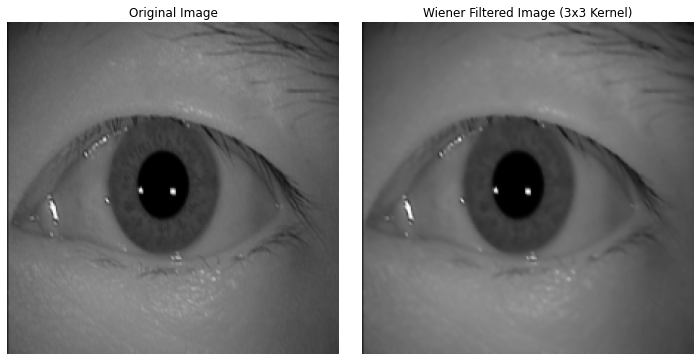

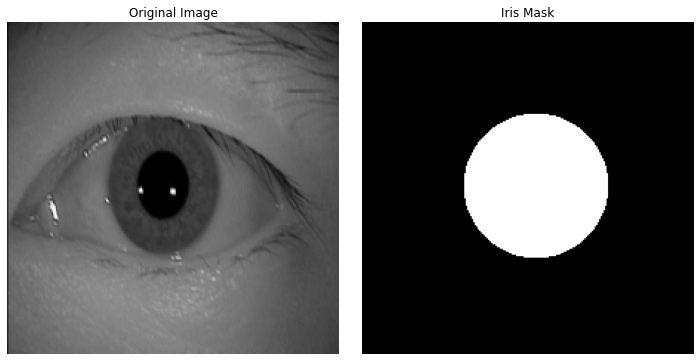

Processing and segmenting image 11/5010
(224, 224)
Processing grayscale image 11
Image format: float64
Detected circle(s): [[ 85 104  58]]
Processing and segmenting image 12/5010
(224, 224)
Processing grayscale image 12
Image format: float64
Detected circle(s): [[100 117  37]]
Processing and segmenting image 13/5010
(224, 224)
Processing grayscale image 13
Image format: float64
Detected circle(s): [[115 107  54]]
Processing and segmenting image 14/5010
(224, 224)
Processing grayscale image 14
Image format: float64
Detected circle(s): [[100 116  38]]
Processing and segmenting image 15/5010
(224, 224)
Processing grayscale image 15
Image format: float64
Detected circle(s): [[103 118  54]]
Processing and segmenting image 16/5010
(224, 224)
Processing grayscale image 16
Image format: float64
Detected circle(s): [[ 93 107  49]]
Processing and segmenting image 17/5010
(224, 224)
Processing grayscale image 17
Image format: float64
Detected circle(s): [[ 93 107  49]]
Processing and segmenting i

Image format: float64
Detected circle(s): [[104 105  30]]
Processing and segmenting image 70/5010
(224, 224)
Processing grayscale image 70
Image format: float64
Detected circle(s): [[104 105  30]]
Processing and segmenting image 71/5010
(224, 224)
Processing grayscale image 71
Image format: float64
Detected circle(s): [[147 122  70]
 [154  51  49]
 [ 70 171  69]
 [202  15  20]]
Processing and segmenting image 72/5010
(224, 224)
Processing grayscale image 72
Image format: float64
Detected circle(s): [[113 149  66]
 [147  63  56]
 [199  81  42]
 [191  22  19]]
Processing and segmenting image 73/5010
(224, 224)
Processing grayscale image 73
Image format: float64
Detected circle(s): [[116 160  77]
 [161  94  77]
 [188  41  27]
 [165 147  39]]
Processing and segmenting image 74/5010
(224, 224)
Processing grayscale image 74
Image format: float64
Detected circle(s): [[140 128  61]
 [163  64  57]
 [193  20  17]
 [ 71 171  39]]
Processing and segmenting image 75/5010
(224, 224)
Processing grays

Detected circle(s): [[122  94  36]]
Processing and segmenting image 124/5010
(224, 224)
Processing grayscale image 124
Image format: float64
Detected circle(s): [[112 125  61]]
Processing and segmenting image 125/5010
(224, 224)
Processing grayscale image 125
Image format: float64
Detected circle(s): [[104  98  28]
 [155  97  18]]
Processing and segmenting image 126/5010
(224, 224)
Processing grayscale image 126
Image format: float64
Detected circle(s): [[124 101  47]
 [ 73 103  21]]
Processing and segmenting image 127/5010
(224, 224)
Processing grayscale image 127
Image format: float64
Detected circle(s): [[136 110  49]
 [ 83 100  23]]
Processing and segmenting image 128/5010
(224, 224)
Processing grayscale image 128
Image format: float64
Detected circle(s): [[134 109  48]]
Processing and segmenting image 129/5010
(224, 224)
Processing grayscale image 129
Image format: float64
Detected circle(s): [[131 139  66]
 [107  92  35]]
Processing and segmenting image 130/5010
(224, 224)
Proces

Detected circle(s): [[118 124  28]
 [ 79  59  57]]
Processing and segmenting image 184/5010
(224, 224)
Processing grayscale image 184
Image format: float64
Detected circle(s): [[109 121  39]
 [ 77  55  53]]
Processing and segmenting image 185/5010
(224, 224)
Processing grayscale image 185
Image format: float64
Detected circle(s): [[122 160  69]]
Processing and segmenting image 186/5010
(224, 224)
Processing grayscale image 186
Image format: float64
Detected circle(s): [[122 159  67]
 [ 81  65  62]]
Processing and segmenting image 187/5010
(224, 224)
Processing grayscale image 187
Image format: float64
Detected circle(s): [[ 79  58  55]
 [113 123  34]]
Processing and segmenting image 188/5010
(224, 224)
Processing grayscale image 188
Image format: float64
Detected circle(s): [[118 124  28]
 [ 75  59  58]]
Processing and segmenting image 189/5010
(224, 224)
Processing grayscale image 189
Image format: float64
Detected circle(s): [[122 161  70]
 [ 77  53  51]
 [134  46  51]]
Processing an

Detected circle(s): [[125 119  31]]
Processing and segmenting image 239/5010
(224, 224)
Processing grayscale image 239
Image format: float64
Detected circle(s): [[124 160  70]
 [143 113  39]
 [ 93 110  24]]
Processing and segmenting image 240/5010
(224, 224)
Processing grayscale image 240
Image format: float64
Detected circle(s): [[124 160  70]
 [111 111  42]
 [164 123  24]]
Processing and segmenting image 241/5010
(224, 224)
Processing grayscale image 241
Image format: float64
Detected circle(s): [[118 117  30]]
Processing and segmenting image 242/5010
(224, 224)
Processing grayscale image 242
Image format: float64
Detected circle(s): [[113 115  34]]
Processing and segmenting image 243/5010
(224, 224)
Processing grayscale image 243
Image format: float64
Detected circle(s): [[113 113  34]]
Processing and segmenting image 244/5010
(224, 224)
Processing grayscale image 244
Image format: float64
Detected circle(s): [[117 111  31]]
Processing and segmenting image 245/5010
(224, 224)
Proces

Detected circle(s): [[104 163  72]]
Processing and segmenting image 285/5010
(224, 224)
Processing grayscale image 285
Image format: float64
Detected circle(s): [[105 160  70]
 [ 70  99  63]]
Processing and segmenting image 286/5010
(224, 224)
Processing grayscale image 286
Image format: float64
Detected circle(s): [[104 157  67]]
Processing and segmenting image 287/5010
(224, 224)
Processing grayscale image 287
Image format: float64
Detected circle(s): [[105 165  74]
 [ 61 136  35]
 [135 123  22]]
Processing and segmenting image 288/5010
(224, 224)
Processing grayscale image 288
Image format: float64
Detected circle(s): [[105 165  74]
 [ 88  59  51]
 [ 57 135  32]]
Processing and segmenting image 289/5010
(224, 224)
Processing grayscale image 289
Image format: float64
Detected circle(s): [[104 161  71]
 [ 61 136  35]]
Processing and segmenting image 290/5010
(224, 224)
Processing grayscale image 290
Image format: float64
Detected circle(s): [[104 158  68]]
Processing and segmenting im

Detected circle(s): [[ 77  91  74]
 [115 137  47]]
Processing and segmenting image 342/5010
(224, 224)
Processing grayscale image 342
Image format: float64
Detected circle(s): [[117 124  56]
 [ 79  92  79]]
Processing and segmenting image 343/5010
(224, 224)
Processing grayscale image 343
Image format: float64
Detected circle(s): [[ 86  95  65]
 [ 61 139  34]
 [112 143  33]]
Processing and segmenting image 344/5010
(224, 224)
Processing grayscale image 344
Image format: float64
Detected circle(s): [[ 85  98  65]
 [134 107  36]
 [ 91 148  36]]
Processing and segmenting image 345/5010
(224, 224)
Processing grayscale image 345
Image format: float64
Detected circle(s): [[124 110  41]
 [ 75  82  66]
 [ 91 149  34]]
Processing and segmenting image 346/5010
(224, 224)
Processing grayscale image 346
Image format: float64
Detected circle(s): [[ 86  97  65]
 [104 143  66]]
Processing and segmenting image 347/5010
(224, 224)
Processing grayscale image 347
Image format: float64
Detected circle(s):

Detected circle(s): [[ 83 146  74]
 [119 107  21]
 [ 62 100  20]]
Processing and segmenting image 404/5010
(224, 224)
Processing grayscale image 404
Image format: float64
Detected circle(s): [[ 83 148  77]]
Processing and segmenting image 405/5010
(224, 224)
Processing grayscale image 405
Image format: float64
Detected circle(s): [[ 88 142  68]]
Processing and segmenting image 406/5010
(224, 224)
Processing grayscale image 406
Image format: float64
Detected circle(s): [[ 87 143  70]]
Processing and segmenting image 407/5010
(224, 224)
Processing grayscale image 407
Image format: float64
Detected circle(s): [[ 88 136  64]]
Processing and segmenting image 408/5010
(224, 224)
Processing grayscale image 408
Image format: float64
Detected circle(s): [[ 81 149  78]]
Processing and segmenting image 409/5010
(224, 224)
Processing grayscale image 409
Image format: float64
Detected circle(s): [[ 89 141  67]]
Processing and segmenting image 410/5010
(224, 224)
Processing grayscale image 410
Image

Detected circle(s): [[149  74  34]
 [ 95  92  28]]
Processing and segmenting image 460/5010
(224, 224)
Processing grayscale image 460
Image format: float64
Detected circle(s): [[148  73  36]]
Processing and segmenting image 461/5010
(224, 224)
Processing grayscale image 461
Image format: float64
Detected circle(s): [[112 105  43]]
Processing and segmenting image 462/5010
(224, 224)
Processing grayscale image 462
Image format: float64
Detected circle(s): [[111 105  45]
 [169 125  35]]
Processing and segmenting image 463/5010
(224, 224)
Processing grayscale image 463
Image format: float64
Detected circle(s): [[111 105  45]
 [175 129  42]]
Processing and segmenting image 464/5010
(224, 224)
Processing grayscale image 464
Image format: float64
Detected circle(s): [[125 127  57]]
Processing and segmenting image 465/5010
(224, 224)
Processing grayscale image 465
Image format: float64
Detected circle(s): [[116 106  40]]
Processing and segmenting image 466/5010
(224, 224)
Processing grayscale 

Detected circle(s): [[142 109  69]]
Processing and segmenting image 516/5010
(224, 224)
Processing grayscale image 516
Image format: float64
Detected circle(s): [[133  75  37]]
Processing and segmenting image 517/5010
(224, 224)
Processing grayscale image 517
Image format: float64
Detected circle(s): [[142 101  63]]
Processing and segmenting image 518/5010
(224, 224)
Processing grayscale image 518
Image format: float64
Detected circle(s): [[145 118  77]
 [113  76  38]]
Processing and segmenting image 519/5010
(224, 224)
Processing grayscale image 519
Image format: float64
Detected circle(s): [[135  75  37]]
Processing and segmenting image 520/5010
(224, 224)
Processing grayscale image 520
Image format: float64
Detected circle(s): [[135  81  33]]
Processing and segmenting image 521/5010
(224, 224)
Processing grayscale image 521
Image format: float64
Detected circle(s): [[123 125  50]
 [ 37  82  41]
 [ 71 123  22]
 [103  79  27]]
Processing and segmenting image 522/5010
(224, 224)
Proces

Image format: float64
Detected circle(s): [[139 106  54]
 [ 91  73  63]]
Processing and segmenting image 575/5010
(224, 224)
Processing grayscale image 575
Image format: float64
Detected circle(s): [[141 105  52]
 [ 91 149  57]
 [ 55  74  37]]
Processing and segmenting image 576/5010
(224, 224)
Processing grayscale image 576
Image format: float64
Detected circle(s): [[129  93  52]
 [175 118  31]
 [ 56  77  32]]
Processing and segmenting image 577/5010
(224, 224)
Processing grayscale image 577
Image format: float64
Detected circle(s): [[136 116  63]
 [ 56  52  48]]
Processing and segmenting image 578/5010
(224, 224)
Processing grayscale image 578
Image format: float64
Detected circle(s): [[139 116  62]
 [ 56  67  42]
 [ 88 119  22]]
Processing and segmenting image 579/5010
(224, 224)
Processing grayscale image 579
Image format: float64
Detected circle(s): [[141 115  52]
 [ 55  76  53]]
Processing and segmenting image 580/5010
(224, 224)
Processing grayscale image 580
Image format: float

Detected circle(s): [[117 133  79]
 [146  88  34]
 [ 93  86  27]]
Processing and segmenting image 633/5010
(224, 224)
Processing grayscale image 633
Image format: float64
Detected circle(s): [[110 123  67]
 [143  85  38]]
Processing and segmenting image 634/5010
(224, 224)
Processing grayscale image 634
Image format: float64
Detected circle(s): [[110 123  67]
 [149  89  30]]
Processing and segmenting image 635/5010
(224, 224)
Processing grayscale image 635
Image format: float64
Detected circle(s): [[117 130  71]
 [157  99  30]
 [ 98  83  22]]
Processing and segmenting image 636/5010
(224, 224)
Processing grayscale image 636
Image format: float64
Detected circle(s): [[117 130  71]
 [143  87  27]]
Processing and segmenting image 637/5010
(224, 224)
Processing grayscale image 637
Image format: float64
Detected circle(s): [[110 123  67]
 [143  83  39]]
Processing and segmenting image 638/5010
(224, 224)
Processing grayscale image 638
Image format: float64
Detected circle(s): [[112 124  63]

Image format: float64
Detected circle(s): [[117 124  77]]
Processing and segmenting image 690/5010
(224, 224)
Processing grayscale image 690
Image format: float64
Detected circle(s): [[141 101  43]]
Processing and segmenting image 691/5010
(224, 224)
Processing grayscale image 691
Image format: float64
Detected circle(s): [[122 107  35]]
Processing and segmenting image 692/5010
(224, 224)
Processing grayscale image 692
Image format: float64
Detected circle(s): [[123 107  36]]
Processing and segmenting image 693/5010
(224, 224)
Processing grayscale image 693
Image format: float64
Detected circle(s): [[121 106  35]]
Processing and segmenting image 694/5010
(224, 224)
Processing grayscale image 694
Image format: float64
Detected circle(s): [[110 106  46]]
Processing and segmenting image 695/5010
(224, 224)
Processing grayscale image 695
Image format: float64
Detected circle(s): [[131 105  45]]
Processing and segmenting image 696/5010
(224, 224)
Processing grayscale image 696
Image format:

Detected circle(s): [[112 112  62]
 [115 163  69]
 [151  80  40]
 [173  28  22]]
Processing and segmenting image 743/5010
(224, 224)
Processing grayscale image 743
Image format: float64
Detected circle(s): [[106 112  58]
 [170  94  44]
 [ 68 155  37]
 [175  40  21]]
Processing and segmenting image 744/5010
(224, 224)
Processing grayscale image 744
Image format: float64
Detected circle(s): [[105 113  58]
 [ 79 160  48]
 [ 53  65  41]
 [178  40  23]]
Processing and segmenting image 745/5010
(224, 224)
Processing grayscale image 745
Image format: float64
Detected circle(s): [[123 117  51]
 [ 64  81  66]
 [173  85  30]
 [ 71 159  41]
 [184  19  20]]
Processing and segmenting image 746/5010
(224, 224)
Processing grayscale image 746
Image format: float64
Detected circle(s): [[105 113  58]
 [167  83  27]
 [ 64 145  19]]
Processing and segmenting image 747/5010
(224, 224)
Processing grayscale image 747
Image format: float64
Detected circle(s): [[ 98 107  67]
 [113 159  66]
 [148 117  25]]
Proc

Detected circle(s): [[125 175  79]
 [122 123  28]
 [171  71  41]]
Processing and segmenting image 799/5010
(224, 224)
Processing grayscale image 799
Image format: float64
Detected circle(s): [[123 172  77]
 [110 119  22]
 [173  80  42]]
Processing and segmenting image 800/5010
(224, 224)
Processing grayscale image 800
Image format: float64
Detected circle(s): [[117 167  70]
 [133  97  62]]
Processing and segmenting image 801/5010
(224, 224)
Processing grayscale image 801
Image format: float64
Detected circle(s): [[109 128  65]]
Processing and segmenting image 802/5010
(224, 224)
Processing grayscale image 802
Image format: float64
Detected circle(s): [[110 139  74]
 [ 22  71  46]
 [ 68  46  25]
 [111  88  17]]
Processing and segmenting image 803/5010
(224, 224)
Processing grayscale image 803
Image format: float64
Detected circle(s): [[105 135  73]
 [ 35  53  47]
 [142  99  23]]
Processing and segmenting image 804/5010
(224, 224)
Processing grayscale image 804
Image format: float64
Dete

Detected circle(s): [[140  86  75]
 [135 154  60]
 [ 91  55  47]
 [ 26   5  58]]
Processing and segmenting image 858/5010
(224, 224)
Processing grayscale image 858
Image format: float64
Detected circle(s): [[147  83  79]
 [133 164  71]
 [ 97  89  46]
 [ 32   9  51]
 [135  33  36]]
Processing and segmenting image 859/5010
(224, 224)
Processing grayscale image 859
Image format: float64
Detected circle(s): [[125  68  60]
 [134 171  78]
 [149 122  28]
 [ 25   4  59]]
Processing and segmenting image 860/5010
(224, 224)
Processing grayscale image 860
Image format: float64
Detected circle(s): [[139  91  70]
 [ 13  29  50]
 [147 146  48]
 [142  39  45]
 [ 86  53  22]]
Processing and segmenting image 861/5010
(224, 224)
Processing grayscale image 861
Image format: float64
Detected circle(s): [[125 122  34]
 [128  52  57]
 [ 13  13  47]]
Processing and segmenting image 862/5010
(224, 224)
Processing grayscale image 862
Image format: float64
Detected circle(s): [[128 154  65]
 [124  55  54]
 [ 91

Detected circle(s): [[110  86  47]]
Processing and segmenting image 909/5010
(224, 224)
Processing grayscale image 909
Image format: float64
Detected circle(s): [[121  75  40]
 [140 123  43]
 [ 70  83  26]]
Processing and segmenting image 910/5010
(224, 224)
Processing grayscale image 910
Image format: float64
Detected circle(s): [[109 106  72]]
Processing and segmenting image 911/5010
(224, 224)
Processing grayscale image 911
Image format: float64
Detected circle(s): [[107 151  75]
 [106  99  25]]
Processing and segmenting image 912/5010
(224, 224)
Processing grayscale image 912
Image format: float64
Detected circle(s): [[105 148  71]
 [142  99  33]
 [ 71 111  21]]
Processing and segmenting image 913/5010
(224, 224)
Processing grayscale image 913
Image format: float64
Detected circle(s): [[106 149  73]
 [131 106  25]
 [ 75 110  24]]
Processing and segmenting image 914/5010
(224, 224)
Processing grayscale image 914
Image format: float64
Detected circle(s): [[129 148  71]
 [ 93 105  30]

Detected circle(s): [[100 104  34]]
Processing and segmenting image 970/5010
(224, 224)
Processing grayscale image 970
Image format: float64
Detected circle(s): [[103 106  36]]
Processing and segmenting image 971/5010
(224, 224)
Processing grayscale image 971
Image format: float64
Detected circle(s): [[127 106  41]]
Processing and segmenting image 972/5010
(224, 224)
Processing grayscale image 972
Image format: float64
Detected circle(s): [[127 106  41]]
Processing and segmenting image 973/5010
(224, 224)
Processing grayscale image 973
Image format: float64
Detected circle(s): [[107 105  43]]
Processing and segmenting image 974/5010
(224, 224)
Processing grayscale image 974
Image format: float64
Detected circle(s): [[109 107  40]
 [ 40  57  47]]
Processing and segmenting image 975/5010
(224, 224)
Processing grayscale image 975
Image format: float64
Detected circle(s): [[110 109  39]]
Processing and segmenting image 976/5010
(224, 224)
Processing grayscale image 976
Image format: float6

Detected circle(s): [[119  91  65]
 [ 99 139  26]]
Processing and segmenting image 1029/5010
(224, 224)
Processing grayscale image 1029
Image format: float64
Detected circle(s): [[122 124  67]]
Processing and segmenting image 1030/5010
(224, 224)
Processing grayscale image 1030
Image format: float64
Detected circle(s): [[117  92  65]]
Processing and segmenting image 1031/5010
(224, 224)
Processing grayscale image 1031
Image format: float64
Detected circle(s): [[167 113  36]]
Processing and segmenting image 1032/5010
(224, 224)
Processing grayscale image 1032
Image format: float64
Detected circle(s): [[171 113  40]]
Processing and segmenting image 1033/5010
(224, 224)
Processing grayscale image 1033
Image format: float64
Detected circle(s): [[149 154  74]
 [183 113  35]]
Processing and segmenting image 1034/5010
(224, 224)
Processing grayscale image 1034
Image format: float64
Detected circle(s): [[165 116  33]]
Processing and segmenting image 1035/5010
(224, 224)
Processing grayscale im

Processing and segmenting image 1082/5010
(224, 224)
Processing grayscale image 1082
Image format: float64
Detected circle(s): [[ 91 116  48]
 [128 149  67]
 [163 111  19]]
Processing and segmenting image 1083/5010
(224, 224)
Processing grayscale image 1083
Image format: float64
Detected circle(s): [[112 117  49]]
Processing and segmenting image 1084/5010
(224, 224)
Processing grayscale image 1084
Image format: float64
Detected circle(s): [[111 122  49]]
Processing and segmenting image 1085/5010
(224, 224)
Processing grayscale image 1085
Image format: float64
Detected circle(s): [[112 115  49]
 [163 111  18]]
Processing and segmenting image 1086/5010
(224, 224)
Processing grayscale image 1086
Image format: float64
Detected circle(s): [[136 121  45]
 [ 86 133  33]]
Processing and segmenting image 1087/5010
(224, 224)
Processing grayscale image 1087
Image format: float64
Detected circle(s): [[107 113  54]
 [163 112  19]]
Processing and segmenting image 1088/5010
(224, 224)
Processing gra

Detected circle(s): [[146 109  34]
 [ 71  71  65]]
Processing and segmenting image 1141/5010
(224, 224)
Processing grayscale image 1141
Image format: float64
Detected circle(s): [[130  94  32]]
Processing and segmenting image 1142/5010
(224, 224)
Processing grayscale image 1142
Image format: float64
Detected circle(s): [[103 125  75]
 [145  88  32]]
Processing and segmenting image 1143/5010
(224, 224)
Processing grayscale image 1143
Image format: float64
Detected circle(s): [[101 125  74]
 [142  91  44]]
Processing and segmenting image 1144/5010
(224, 224)
Processing grayscale image 1144
Image format: float64
Detected circle(s): [[130  94  31]]
Processing and segmenting image 1145/5010
(224, 224)
Processing grayscale image 1145
Image format: float64
Detected circle(s): [[ 94 111  60]
 [141  89  28]]
Processing and segmenting image 1146/5010
(224, 224)
Processing grayscale image 1146
Image format: float64
Detected circle(s): [[ 98 118  66]
 [139  88  25]]
Processing and segmenting image

Processing and segmenting image 1195/5010
(224, 224)
Processing grayscale image 1195
Image format: float64
Detected circle(s): [[ 81 116  79]
 [137 119  38]
 [ 76  65  55]
 [127  65  26]
 [ 27 101  41]
 [123   7  33]]
Processing and segmenting image 1196/5010
(224, 224)
Processing grayscale image 1196
Image format: float64
Detected circle(s): [[137 119  38]
 [ 77 112  74]
 [ 93  37  26]
 [178  68  44]
 [ 44  74  26]]
Processing and segmenting image 1197/5010
(224, 224)
Processing grayscale image 1197
Image format: float64
Detected circle(s): [[137 119  38]
 [ 74 111  71]
 [182  71  70]
 [101  28  25]
 [ 17  43  26]]
Processing and segmenting image 1198/5010
(224, 224)
Processing grayscale image 1198
Image format: float64
Detected circle(s): [[137 119  38]
 [ 79 115  77]
 [ 28 105  39]
 [105  31  29]
 [161  65  37]
 [ 45  37  39]]
Processing and segmenting image 1199/5010
(224, 224)
Processing grayscale image 1199
Image format: float64
Detected circle(s): [[ 75 106  73]
 [136 118  38]
 

Processing and segmenting image 1250/5010
(224, 224)
Processing grayscale image 1250
Image format: float64
Detected circle(s): [[176  71  43]
 [109 105  29]
 [191  21  20]
 [137  28  28]]
Processing and segmenting image 1251/5010
(224, 224)
Processing grayscale image 1251
Image format: float64
Detected circle(s): [[ 97 136  56]
 [135 103  30]]
Processing and segmenting image 1252/5010
(224, 224)
Processing grayscale image 1252
Image format: float64
Detected circle(s): [[124 107  40]]
Processing and segmenting image 1253/5010
(224, 224)
Processing grayscale image 1253
Image format: float64
Detected circle(s): [[101 105  43]]
Processing and segmenting image 1254/5010
(224, 224)
Processing grayscale image 1254
Image format: float64
Detected circle(s): [[111 110  34]]
Processing and segmenting image 1255/5010
(224, 224)
Processing grayscale image 1255
Image format: float64
Detected circle(s): [[ 98 104  47]]
Processing and segmenting image 1256/5010
(224, 224)
Processing grayscale image 12

Processing and segmenting image 1311/5010
(224, 224)
Processing grayscale image 1311
Image format: float64
Detected circle(s): [[124 105  30]]
Processing and segmenting image 1312/5010
(224, 224)
Processing grayscale image 1312
Image format: float64
Detected circle(s): [[125 105  31]]
Processing and segmenting image 1313/5010
(224, 224)
Processing grayscale image 1313
Image format: float64
Detected circle(s): [[129  99  54]]
Processing and segmenting image 1314/5010
(224, 224)
Processing grayscale image 1314
Image format: float64
Detected circle(s): [[134 118  43]
 [ 80 106  17]]
Processing and segmenting image 1315/5010
(224, 224)
Processing grayscale image 1315
Image format: float64
Detected circle(s): [[100 105  31]
 [151 104  24]]
Processing and segmenting image 1316/5010
(224, 224)
Processing grayscale image 1316
Image format: float64
Detected circle(s): [[ 95 104  37]
 [153 106  20]]
Processing and segmenting image 1317/5010
(224, 224)
Processing grayscale image 1317
Image format

Detected circle(s): [[100 119  33]]
Processing and segmenting image 1371/5010
(224, 224)
Processing grayscale image 1371
Image format: float64
Detected circle(s): [[127 100  32]]
Processing and segmenting image 1372/5010
(224, 224)
Processing grayscale image 1372
Image format: float64
Detected circle(s): [[141 145  79]
 [122  93  24]]
Processing and segmenting image 1373/5010
(224, 224)
Processing grayscale image 1373
Image format: float64
Detected circle(s): [[137  93  24]]
Processing and segmenting image 1374/5010
(224, 224)
Processing grayscale image 1374
Image format: float64
Detected circle(s): [[131 141  73]
 [149  94  34]]
Processing and segmenting image 1375/5010
(224, 224)
Processing grayscale image 1375
Image format: float64
Detected circle(s): [[143 106  42]]
Processing and segmenting image 1376/5010
(224, 224)
Processing grayscale image 1376
Image format: float64
Detected circle(s): [[127 103  30]]
Processing and segmenting image 1377/5010
(224, 224)
Processing grayscale im

Detected circle(s): [[116 166  77]
 [ 97  63  52]
 [164 128  32]]
Processing and segmenting image 1425/5010
(224, 224)
Processing grayscale image 1425
Image format: float64
Detected circle(s): [[109 158  66]
 [106  55  61]
 [151 124  34]]
Processing and segmenting image 1426/5010
(224, 224)
Processing grayscale image 1426
Image format: float64
Detected circle(s): [[111 161  70]
 [109  61  66]
 [145 122  41]]
Processing and segmenting image 1427/5010
(224, 224)
Processing grayscale image 1427
Image format: float64
Detected circle(s): [[ 80  76  78]
 [104 149  56]
 [164 128  32]]
Processing and segmenting image 1428/5010
(224, 224)
Processing grayscale image 1428
Image format: float64
Detected circle(s): [[121 127  32]
 [110  55  58]]
Processing and segmenting image 1429/5010
(224, 224)
Processing grayscale image 1429
Image format: float64
Detected circle(s): [[121 127  32]
 [106  50  58]]
Processing and segmenting image 1430/5010
(224, 224)
Processing grayscale image 1430
Image format: 

Image format: float64
Detected circle(s): [[ 89 119  39]
 [185  77  46]
 [ 98  53  37]
 [151 118  24]]
Processing and segmenting image 1479/5010
(224, 224)
Processing grayscale image 1479
Image format: float64
Detected circle(s): [[104 124  43]
 [147  73  53]
 [ 83  73  37]]
Processing and segmenting image 1480/5010
(224, 224)
Processing grayscale image 1480
Image format: float64
Detected circle(s): [[104 124  43]
 [178  65  51]]
Processing and segmenting image 1481/5010
(224, 224)
Processing grayscale image 1481
Image format: float64
Detected circle(s): [[115 105  39]]
Processing and segmenting image 1482/5010
(224, 224)
Processing grayscale image 1482
Image format: float64
Detected circle(s): [[100 103  28]]
Processing and segmenting image 1483/5010
(224, 224)
Processing grayscale image 1483
Image format: float64
Detected circle(s): [[118 103  26]
 [ 70 136  39]]
Processing and segmenting image 1484/5010
(224, 224)
Processing grayscale image 1484
Image format: float64
Detected circle

Detected circle(s): [[147 111  51]
 [ 97 124  29]
 [ 41  79  42]
 [ 89  59  29]]
Processing and segmenting image 1534/5010
(224, 224)
Processing grayscale image 1534
Image format: float64
Detected circle(s): [[123 118  55]
 [ 74  53  52]
 [ 35 103  41]
 [176 124  25]]
Processing and segmenting image 1535/5010
(224, 224)
Processing grayscale image 1535
Image format: float64
Detected circle(s): [[146 110  50]
 [ 73  75  53]
 [ 97 125  30]]
Processing and segmenting image 1536/5010
(224, 224)
Processing grayscale image 1536
Image format: float64
Detected circle(s): [[116 123  45]
 [ 65  95  63]]
Processing and segmenting image 1537/5010
(224, 224)
Processing grayscale image 1537
Image format: float64
Detected circle(s): [[125  85  78]
 [131 142  69]
 [ 65  94  69]
 [ 71  38  28]]
Processing and segmenting image 1538/5010
(224, 224)
Processing grayscale image 1538
Image format: float64
Detected circle(s): [[113 111  50]
 [ 62  67  53]
 [134  43  41]
 [163 123  21]]
Processing and segmentin

Detected circle(s): [[135 119  39]]
Processing and segmenting image 1591/5010
(224, 224)
Processing grayscale image 1591
Image format: float64
Detected circle(s): [[104  99  27]]
Processing and segmenting image 1592/5010
(224, 224)
Processing grayscale image 1592
Image format: float64
Detected circle(s): [[103 100  27]]
Processing and segmenting image 1593/5010
(224, 224)
Processing grayscale image 1593
Image format: float64
Detected circle(s): [[107 121  48]]
Processing and segmenting image 1594/5010
(224, 224)
Processing grayscale image 1594
Image format: float64
Detected circle(s): [[104 100  27]]
Processing and segmenting image 1595/5010
(224, 224)
Processing grayscale image 1595
Image format: float64
Detected circle(s): [[ 89 117  47]]
Processing and segmenting image 1596/5010
(224, 224)
Processing grayscale image 1596
Image format: float64
Detected circle(s): [[101 153  79]
 [121 100  25]]
Processing and segmenting image 1597/5010
(224, 224)
Processing grayscale image 1597
Image 

Processing and segmenting image 1645/5010
(224, 224)
Processing grayscale image 1645
Image format: float64
Detected circle(s): [[146 127  52]]
Processing and segmenting image 1646/5010
(224, 224)
Processing grayscale image 1646
Image format: float64
Detected circle(s): [[ 79  77  77]
 [135 112  37]]
Processing and segmenting image 1647/5010
(224, 224)
Processing grayscale image 1647
Image format: float64
Detected circle(s): [[147 107  50]
 [ 85 115  36]
 [ 47  76  71]]
Processing and segmenting image 1648/5010
(224, 224)
Processing grayscale image 1648
Image format: float64
Detected circle(s): [[134 111  38]
 [ 79  83  62]]
Processing and segmenting image 1649/5010
(224, 224)
Processing grayscale image 1649
Image format: float64
Detected circle(s): [[136 112  38]]
Processing and segmenting image 1650/5010
(224, 224)
Processing grayscale image 1650
Image format: float64
Detected circle(s): [[134 111  38]]
Processing and segmenting image 1651/5010
(224, 224)
Processing grayscale image 16

Processing and segmenting image 1696/5010
(224, 224)
Processing grayscale image 1696
Image format: float64
Detected circle(s): [[130 118  44]]
Processing and segmenting image 1697/5010
(224, 224)
Processing grayscale image 1697
Image format: float64
Detected circle(s): [[113 130  66]
 [ 93  83  28]]
Processing and segmenting image 1698/5010
(224, 224)
Processing grayscale image 1698
Image format: float64
Detected circle(s): [[112 129  65]
 [128  49  41]]
Processing and segmenting image 1699/5010
(224, 224)
Processing grayscale image 1699
Image format: float64
Detected circle(s): [[112 131  67]
 [ 59  98  50]
 [129  47  40]]
Processing and segmenting image 1700/5010
(224, 224)
Processing grayscale image 1700
Image format: float64
Detected circle(s): [[113 129  65]
 [136  44  42]]
Processing and segmenting image 1701/5010
(224, 224)
Processing grayscale image 1701
Image format: float64
Detected circle(s): [[142 112  41]
 [ 92 103  34]]
Processing and segmenting image 1702/5010
(224, 224)

Detected circle(s): [[170  50  51]
 [ 69 115  32]
 [122 107  33]]
Processing and segmenting image 1749/5010
(224, 224)
Processing grayscale image 1749
Image format: float64
Detected circle(s): [[100 148  70]
 [ 61 117  59]
 [145  57  40]
 [137 113  29]
 [187  89  28]]
Processing and segmenting image 1750/5010
(224, 224)
Processing grayscale image 1750
Image format: float64
Detected circle(s): [[100 145  67]
 [170  50  51]]
Processing and segmenting image 1751/5010
(224, 224)
Processing grayscale image 1751
Image format: float64
Detected circle(s): [[127  99  41]]
Processing and segmenting image 1752/5010
(224, 224)
Processing grayscale image 1752
Image format: float64
Detected circle(s): [[123 100  38]]
Processing and segmenting image 1753/5010
(224, 224)
Processing grayscale image 1753
Image format: float64
Detected circle(s): [[112 100  35]]
Processing and segmenting image 1754/5010
(224, 224)
Processing grayscale image 1754
Image format: float64
Detected circle(s): [[115 103  33]]
P

Detected circle(s): [[97 89 37]]
Processing and segmenting image 1809/5010
(224, 224)
Processing grayscale image 1809
Image format: float64
Detected circle(s): [[105 124  73]
 [ 92  74  20]]
Processing and segmenting image 1810/5010
(224, 224)
Processing grayscale image 1810
Image format: float64
Detected circle(s): [[95 93 39]]
Processing and segmenting image 1811/5010
(224, 224)
Processing grayscale image 1811
Image format: float64
Detected circle(s): [[ 93 117  33]]
Processing and segmenting image 1812/5010
(224, 224)
Processing grayscale image 1812
Image format: float64
Detected circle(s): [[ 93 117  33]
 [146 107  34]]
Processing and segmenting image 1813/5010
(224, 224)
Processing grayscale image 1813
Image format: float64
Detected circle(s): [[100 117  36]
 [187  91  58]]
Processing and segmenting image 1814/5010
(224, 224)
Processing grayscale image 1814
Image format: float64
Detected circle(s): [[110 155  75]
 [127  89  67]]
Processing and segmenting image 1815/5010
(224, 224)

Detected circle(s): [[123 127  27]]
Processing and segmenting image 1865/5010
(224, 224)
Processing grayscale image 1865
Image format: float64
Detected circle(s): [[124 127  25]]
Processing and segmenting image 1866/5010
(224, 224)
Processing grayscale image 1866
Image format: float64
Detected circle(s): [[129 127  31]]
Processing and segmenting image 1867/5010
(224, 224)
Processing grayscale image 1867
Image format: float64
Detected circle(s): [[117 122  27]]
Processing and segmenting image 1868/5010
(224, 224)
Processing grayscale image 1868
Image format: float64
Detected circle(s): [[119 128  23]]
Processing and segmenting image 1869/5010
(224, 224)
Processing grayscale image 1869
Image format: float64
Detected circle(s): [[121 127  23]]
Processing and segmenting image 1870/5010
(224, 224)
Processing grayscale image 1870
Image format: float64
Detected circle(s): [[127 128  26]]
Processing and segmenting image 1871/5010
(224, 224)
Processing grayscale image 1871
Image format: float64

Processing and segmenting image 1927/5010
(224, 224)
Processing grayscale image 1927
Image format: float64
Detected circle(s): [[131 137  70]
 [159  15  25]]
Processing and segmenting image 1928/5010
(224, 224)
Processing grayscale image 1928
Image format: float64
Detected circle(s): [[134 143  77]
 [109  98  26]
 [137  19  48]]
Processing and segmenting image 1929/5010
(224, 224)
Processing grayscale image 1929
Image format: float64
Detected circle(s): [[134 145  78]
 [109  98  26]
 [140  13  57]]
Processing and segmenting image 1930/5010
(224, 224)
Processing grayscale image 1930
Image format: float64
Detected circle(s): [[133 145  78]
 [109  98  25]
 [149  16  35]]
Processing and segmenting image 1931/5010
(224, 224)
Processing grayscale image 1931
Image format: float64
Detected circle(s): [[118 124  74]]
Processing and segmenting image 1932/5010
(224, 224)
Processing grayscale image 1932
Image format: float64
Detected circle(s): [[122 123  71]
 [103  76  30]]
Processing and segment

Processing and segmenting image 1980/5010
(224, 224)
Processing grayscale image 1980
Image format: float64
Detected circle(s): [[123 158  79]
 [ 53  58  53]
 [143 109  24]]
Processing and segmenting image 1981/5010
(224, 224)
Processing grayscale image 1981
Image format: float64
Detected circle(s): [[111 107  41]]
Processing and segmenting image 1982/5010
(224, 224)
Processing grayscale image 1982
Image format: float64
Detected circle(s): [[112 107  42]
 [ 17  61  46]]
Processing and segmenting image 1983/5010
(224, 224)
Processing grayscale image 1983
Image format: float64
Detected circle(s): [[ 99 106  30]]
Processing and segmenting image 1984/5010
(224, 224)
Processing grayscale image 1984
Image format: float64
Detected circle(s): [[111 107  41]]
Processing and segmenting image 1985/5010
(224, 224)
Processing grayscale image 1985
Image format: float64
Detected circle(s): [[125 105  36]
 [ 75 109  38]]
Processing and segmenting image 1986/5010
(224, 224)
Processing grayscale image 19

Detected circle(s): [[ 94 110  38]]
Processing and segmenting image 2039/5010
(224, 224)
Processing grayscale image 2039
Image format: float64
Detected circle(s): [[ 91 117  30]]
Processing and segmenting image 2040/5010
(224, 224)
Processing grayscale image 2040
Image format: float64
Detected circle(s): [[ 91 117  30]]
Processing and segmenting image 2041/5010
(224, 224)
Processing grayscale image 2041
Image format: float64
Detected circle(s): [[131 141  77]
 [124  89  17]]
Processing and segmenting image 2042/5010
(224, 224)
Processing grayscale image 2042
Image format: float64
Detected circle(s): [[128 137  72]]
Processing and segmenting image 2043/5010
(224, 224)
Processing grayscale image 2043
Image format: float64
Detected circle(s): [[129 137  73]]
Processing and segmenting image 2044/5010
(224, 224)
Processing grayscale image 2044
Image format: float64
Detected circle(s): [[130 110  46]]
Processing and segmenting image 2045/5010
(224, 224)
Processing grayscale image 2045
Image 

Processing and segmenting image 2096/5010
(224, 224)
Processing grayscale image 2096
Image format: float64
Detected circle(s): [[76 93 45]]
Processing and segmenting image 2097/5010
(224, 224)
Processing grayscale image 2097
Image format: float64
Detected circle(s): [[98 91 30]]
Processing and segmenting image 2098/5010
(224, 224)
Processing grayscale image 2098
Image format: float64
Detected circle(s): [[ 95 119  74]]
Processing and segmenting image 2099/5010
(224, 224)
Processing grayscale image 2099
Image format: float64
Detected circle(s): [[74 93 47]]
Processing and segmenting image 2100/5010
(224, 224)
Processing grayscale image 2100
Image format: float64
Detected circle(s): [[97 91 30]]
Processing and segmenting image 2101/5010
(224, 224)
Processing grayscale image 2101
Image format: float64
Detected circle(s): [[112 146  75]
 [146 103  25]
 [137  47  31]
 [189  77  36]]
Processing and segmenting image 2102/5010
(224, 224)
Processing grayscale image 2102
Image format: float64
De

Processing and segmenting image 2154/5010
(224, 224)
Processing grayscale image 2154
Image format: float64
Detected circle(s): [[111 113  39]]
Processing and segmenting image 2155/5010
(224, 224)
Processing grayscale image 2155
Image format: float64
Detected circle(s): [[109 143  59]]
Processing and segmenting image 2156/5010
(224, 224)
Processing grayscale image 2156
Image format: float64
Detected circle(s): [[110 117  41]]
Processing and segmenting image 2157/5010
(224, 224)
Processing grayscale image 2157
Image format: float64
Detected circle(s): [[107 106  25]]
Processing and segmenting image 2158/5010
(224, 224)
Processing grayscale image 2158
Image format: float64
Detected circle(s): [[121 139  57]]
Processing and segmenting image 2159/5010
(224, 224)
Processing grayscale image 2159
Image format: float64
Detected circle(s): [[110 151  66]]
Processing and segmenting image 2160/5010
(224, 224)
Processing grayscale image 2160
Image format: float64
Detected circle(s): [[110 115  39]]

Image format: float64
Detected circle(s): [[141 137  70]
 [ 80  57  43]]
Processing and segmenting image 2208/5010
(224, 224)
Processing grayscale image 2208
Image format: float64
Detected circle(s): [[142 136  68]]
Processing and segmenting image 2209/5010
(224, 224)
Processing grayscale image 2209
Image format: float64
Detected circle(s): [[142 137  70]
 [ 68  59  44]]
Processing and segmenting image 2210/5010
(224, 224)
Processing grayscale image 2210
Image format: float64
Detected circle(s): [[141 140  71]
 [149  51  50]
 [172 100  38]]
Processing and segmenting image 2211/5010
(224, 224)
Processing grayscale image 2211
Image format: float64
Detected circle(s): [[107 116  32]
 [189  57  55]]
Processing and segmenting image 2212/5010
(224, 224)
Processing grayscale image 2212
Image format: float64
Detected circle(s): [[111 111  31]
 [182  73  51]]
Processing and segmenting image 2213/5010
(224, 224)
Processing grayscale image 2213
Image format: float64
Detected circle(s): [[146  85 

Detected circle(s): [[101 115  42]]
Processing and segmenting image 2264/5010
(224, 224)
Processing grayscale image 2264
Image format: float64
Detected circle(s): [[ 85 111  30]]
Processing and segmenting image 2265/5010
(224, 224)
Processing grayscale image 2265
Image format: float64
Detected circle(s): [[ 97 111  38]]
Processing and segmenting image 2266/5010
(224, 224)
Processing grayscale image 2266
Image format: float64
Detected circle(s): [[ 95 109  36]]
Processing and segmenting image 2267/5010
(224, 224)
Processing grayscale image 2267
Image format: float64
Detected circle(s): [[ 85 111  30]
 [139 115  25]]
Processing and segmenting image 2268/5010
(224, 224)
Processing grayscale image 2268
Image format: float64
Detected circle(s): [[100 113  41]
 [136 165  74]]
Processing and segmenting image 2269/5010
(224, 224)
Processing grayscale image 2269
Image format: float64
Detected circle(s): [[ 99 119  47]]
Processing and segmenting image 2270/5010
(224, 224)
Processing grayscale im

Processing and segmenting image 2320/5010
(224, 224)
Processing grayscale image 2320
Image format: float64
Detected circle(s): [[106 133  67]]
Processing and segmenting image 2321/5010
(224, 224)
Processing grayscale image 2321
Image format: float64
Detected circle(s): [[133 106  28]]
Processing and segmenting image 2322/5010
(224, 224)
Processing grayscale image 2322
Image format: float64
Detected circle(s): [[125 110  38]]
Processing and segmenting image 2323/5010
(224, 224)
Processing grayscale image 2323
Image format: float64
Detected circle(s): [[107 107  37]]
Processing and segmenting image 2324/5010
(224, 224)
Processing grayscale image 2324
Image format: float64
Detected circle(s): [[107 106  36]]
Processing and segmenting image 2325/5010
(224, 224)
Processing grayscale image 2325
Image format: float64
Detected circle(s): [[115 105  27]]
Processing and segmenting image 2326/5010
(224, 224)
Processing grayscale image 2326
Image format: float64
Detected circle(s): [[118 107  40]]

Detected circle(s): [[ 93 124  45]
 [158 136  28]]
Processing and segmenting image 2376/5010
(224, 224)
Processing grayscale image 2376
Image format: float64
Detected circle(s): [[100 115  40]
 [148 130  32]
 [152  58  43]]
Processing and segmenting image 2377/5010
(224, 224)
Processing grayscale image 2377
Image format: float64
Detected circle(s): [[107 118  34]
 [161 145  41]]
Processing and segmenting image 2378/5010
(224, 224)
Processing grayscale image 2378
Image format: float64
Detected circle(s): [[ 95 119  46]
 [147 109  51]]
Processing and segmenting image 2379/5010
(224, 224)
Processing grayscale image 2379
Image format: float64
Detected circle(s): [[143 121  61]
 [ 93 119  48]
 [188  33  34]]
Processing and segmenting image 2380/5010
(224, 224)
Processing grayscale image 2380
Image format: float64
Detected circle(s): [[ 99 115  40]]
Processing and segmenting image 2381/5010
(224, 224)
Processing grayscale image 2381
Image format: float64
Detected circle(s): [[83 91 65]]
Proc

Processing and segmenting image 2434/5010
(224, 224)
Processing grayscale image 2434
Image format: float64
Detected circle(s): [[ 82 143  74]
 [107 100  24]]
Processing and segmenting image 2435/5010
(224, 224)
Processing grayscale image 2435
Image format: float64
Detected circle(s): [[ 85 113  44]]
Processing and segmenting image 2436/5010
(224, 224)
Processing grayscale image 2436
Image format: float64
Detected circle(s): [[ 87 112  43]]
Processing and segmenting image 2437/5010
(224, 224)
Processing grayscale image 2437
Image format: float64
Detected circle(s): [[ 86 130  56]]
Processing and segmenting image 2438/5010
(224, 224)
Processing grayscale image 2438
Image format: float64
Detected circle(s): [[ 85 133  58]]
Processing and segmenting image 2439/5010
(224, 224)
Processing grayscale image 2439
Image format: float64
Detected circle(s): [[ 87 131  56]]
Processing and segmenting image 2440/5010
(224, 224)
Processing grayscale image 2440
Image format: float64
Detected circle(s): 

Processing and segmenting image 2489/5010
(224, 224)
Processing grayscale image 2489
Image format: float64
Detected circle(s): [[157 123  50]
 [ 69  77  65]
 [101 124  24]]
Processing and segmenting image 2490/5010
(224, 224)
Processing grayscale image 2490
Image format: float64
Detected circle(s): [[157 142  61]
 [ 63  67  61]
 [ 98 119  30]]
Processing and segmenting image 2491/5010
(224, 224)
Processing grayscale image 2491
Image format: float64
Detected circle(s): [[ 94  82  70]
 [104 153  38]
 [ 47 101  46]
 [ 59  37  20]
 [ 19   7  37]]
Processing and segmenting image 2492/5010
(224, 224)
Processing grayscale image 2492
Image format: float64
Detected circle(s): [[ 64  83  62]
 [123  75  79]
 [110 199  70]
 [122 149  28]
 [ 22  10  43]]
Processing and segmenting image 2493/5010
(224, 224)
Processing grayscale image 2493
Image format: float64
Detected circle(s): [[ 94  89  79]
 [121 157  35]
 [ 38  11  42]
 [155  59  43]]
Processing and segmenting image 2494/5010
(224, 224)
Process

Detected circle(s): [[116  77  37]]
Processing and segmenting image 2545/5010
(224, 224)
Processing grayscale image 2545
Image format: float64
Detected circle(s): [[113  75  39]]
Processing and segmenting image 2546/5010
(224, 224)
Processing grayscale image 2546
Image format: float64
Detected circle(s): [[116  76  37]]
Processing and segmenting image 2547/5010
(224, 224)
Processing grayscale image 2547
Image format: float64
Detected circle(s): [[118  80  33]]
Processing and segmenting image 2548/5010
(224, 224)
Processing grayscale image 2548
Image format: float64
Detected circle(s): [[105  74  29]]
Processing and segmenting image 2549/5010
(224, 224)
Processing grayscale image 2549
Image format: float64
Detected circle(s): [[105  75  30]]
Processing and segmenting image 2550/5010
(224, 224)
Processing grayscale image 2550
Image format: float64
Detected circle(s): [[115  77  37]]
Processing and segmenting image 2551/5010
(224, 224)
Processing grayscale image 2551
Image format: float64

Detected circle(s): [[146  95  24]]
Processing and segmenting image 2604/5010
(224, 224)
Processing grayscale image 2604
Image format: float64
Detected circle(s): [[141 105  16]]
Processing and segmenting image 2605/5010
(224, 224)
Processing grayscale image 2605
Image format: float64
Detected circle(s): [[125  99  32]
 [151 143  73]]
Processing and segmenting image 2606/5010
(224, 224)
Processing grayscale image 2606
Image format: float64
Detected circle(s): [[147  98  22]]
Processing and segmenting image 2607/5010
(224, 224)
Processing grayscale image 2607
Image format: float64
Iris not detected.
Processing and segmenting image 2608/5010
(224, 224)
Processing grayscale image 2608
Image format: float64
Detected circle(s): [[157 135  63]]
Processing and segmenting image 2609/5010
(224, 224)
Processing grayscale image 2609
Image format: float64
Detected circle(s): [[134 100  24]]
Processing and segmenting image 2610/5010
(224, 224)
Processing grayscale image 2610
Image format: float64
D

Detected circle(s): [[122 105  34]
 [ 22  59  51]
 [ 70 117  24]]
Processing and segmenting image 2662/5010
(224, 224)
Processing grayscale image 2662
Image format: float64
Detected circle(s): [[116 109  46]
 [ 57 119  35]]
Processing and segmenting image 2663/5010
(224, 224)
Processing grayscale image 2663
Image format: float64
Detected circle(s): [[106 140  78]
 [ 65  85  63]]
Processing and segmenting image 2664/5010
(224, 224)
Processing grayscale image 2664
Image format: float64
Detected circle(s): [[116 109  46]
 [ 63 110  30]]
Processing and segmenting image 2665/5010
(224, 224)
Processing grayscale image 2665
Image format: float64
Detected circle(s): [[115 106  44]]
Processing and segmenting image 2666/5010
(224, 224)
Processing grayscale image 2666
Image format: float64
Detected circle(s): [[116 103  41]]
Processing and segmenting image 2667/5010
(224, 224)
Processing grayscale image 2667
Image format: float64
Detected circle(s): [[100 109  46]]
Processing and segmenting image

Detected circle(s): [[141 106  37]]
Processing and segmenting image 2718/5010
(224, 224)
Processing grayscale image 2718
Image format: float64
Detected circle(s): [[147 104  45]
 [ 75 119  54]]
Processing and segmenting image 2719/5010
(224, 224)
Processing grayscale image 2719
Image format: float64
Detected circle(s): [[142 104  39]]
Processing and segmenting image 2720/5010
(224, 224)
Processing grayscale image 2720
Image format: float64
Detected circle(s): [[153 100  28]
 [105  81  47]]
Processing and segmenting image 2721/5010
(224, 224)
Processing grayscale image 2721
Image format: float64
Detected circle(s): [[121 125  42]]
Processing and segmenting image 2722/5010
(224, 224)
Processing grayscale image 2722
Image format: float64
Detected circle(s): [[131 125  42]]
Processing and segmenting image 2723/5010
(224, 224)
Processing grayscale image 2723
Image format: float64
Detected circle(s): [[133 125  42]
 [ 80 143  42]]
Processing and segmenting image 2724/5010
(224, 224)
Processi

Detected circle(s): [[130  79  34]]
Processing and segmenting image 2777/5010
(224, 224)
Processing grayscale image 2777
Image format: float64
Detected circle(s): [[130  79  34]]
Processing and segmenting image 2778/5010
(224, 224)
Processing grayscale image 2778
Image format: float64
Detected circle(s): [[139  71  43]]
Processing and segmenting image 2779/5010
(224, 224)
Processing grayscale image 2779
Image format: float64
Detected circle(s): [[141  70  25]]
Processing and segmenting image 2780/5010
(224, 224)
Processing grayscale image 2780
Image format: float64
Detected circle(s): [[130  77  34]]
Processing and segmenting image 2781/5010
(224, 224)
Processing grayscale image 2781
Image format: float64
Detected circle(s): [[107  91  39]]
Processing and segmenting image 2782/5010
(224, 224)
Processing grayscale image 2782
Image format: float64
Detected circle(s): [[109  88  39]]
Processing and segmenting image 2783/5010
(224, 224)
Processing grayscale image 2783
Image format: float64

Image format: float64
Detected circle(s): [[141 100  40]
 [ 31  58  43]]
Processing and segmenting image 2839/5010
(224, 224)
Processing grayscale image 2839
Image format: float64
Detected circle(s): [[137 100  36]]
Processing and segmenting image 2840/5010
(224, 224)
Processing grayscale image 2840
Image format: float64
Detected circle(s): [[140 103  38]]
Processing and segmenting image 2841/5010
(224, 224)
Processing grayscale image 2841
Image format: float64
Detected circle(s): [[109 105  52]
 [159  95  47]]
Processing and segmenting image 2842/5010
(224, 224)
Processing grayscale image 2842
Image format: float64
Detected circle(s): [[107 105  53]
 [139  65  36]
 [158 117  31]]
Processing and segmenting image 2843/5010
(224, 224)
Processing grayscale image 2843
Image format: float64
Detected circle(s): [[105 105  55]
 [157  98  34]]
Processing and segmenting image 2844/5010
(224, 224)
Processing grayscale image 2844
Image format: float64
Detected circle(s): [[129 125  70]
 [ 82 106 

Detected circle(s): [[118 141  65]]
Processing and segmenting image 2896/5010
(224, 224)
Processing grayscale image 2896
Image format: float64
Detected circle(s): [[121 104  40]]
Processing and segmenting image 2897/5010
(224, 224)
Processing grayscale image 2897
Image format: float64
Detected circle(s): [[107 105  42]
 [159 121  35]]
Processing and segmenting image 2898/5010
(224, 224)
Processing grayscale image 2898
Image format: float64
Detected circle(s): [[133 101  53]]
Processing and segmenting image 2899/5010
(224, 224)
Processing grayscale image 2899
Image format: float64
Detected circle(s): [[127 140  73]]
Processing and segmenting image 2900/5010
(224, 224)
Processing grayscale image 2900
Image format: float64
Detected circle(s): [[134  99  55]]
Processing and segmenting image 2901/5010
(224, 224)
Processing grayscale image 2901
Image format: float64
Detected circle(s): [[149 105  51]]
Processing and segmenting image 2902/5010
(224, 224)
Processing grayscale image 2902
Image 

Processing and segmenting image 2954/5010
(224, 224)
Processing grayscale image 2954
Image format: float64
Detected circle(s): [[112  50  25]]
Processing and segmenting image 2955/5010
(224, 224)
Processing grayscale image 2955
Image format: float64
Detected circle(s): [[104  55  33]]
Processing and segmenting image 2956/5010
(224, 224)
Processing grayscale image 2956
Image format: float64
Detected circle(s): [[103  55  33]]
Processing and segmenting image 2957/5010
(224, 224)
Processing grayscale image 2957
Image format: float64
Detected circle(s): [[104  53  34]]
Processing and segmenting image 2958/5010
(224, 224)
Processing grayscale image 2958
Image format: float64
Detected circle(s): [[112  50  25]]
Processing and segmenting image 2959/5010
(224, 224)
Processing grayscale image 2959
Image format: float64
Detected circle(s): [[103  55  34]]
Processing and segmenting image 2960/5010
(224, 224)
Processing grayscale image 2960
Image format: float64
Detected circle(s): [[106  56  31]]

Detected circle(s): [[101 105  29]
 [153 131  46]]
Processing and segmenting image 3012/5010
(224, 224)
Processing grayscale image 3012
Image format: float64
Detected circle(s): [[100 106  30]
 [164 118  30]]
Processing and segmenting image 3013/5010
(224, 224)
Processing grayscale image 3013
Image format: float64
Detected circle(s): [[122 106  31]]
Processing and segmenting image 3014/5010
(224, 224)
Processing grayscale image 3014
Image format: float64
Detected circle(s): [[118 105  26]]
Processing and segmenting image 3015/5010
(224, 224)
Processing grayscale image 3015
Image format: float64
Detected circle(s): [[103 105  26]]
Processing and segmenting image 3016/5010
(224, 224)
Processing grayscale image 3016
Image format: float64
Detected circle(s): [[103 106  30]
 [151 135  50]]
Processing and segmenting image 3017/5010
(224, 224)
Processing grayscale image 3017
Image format: float64
Detected circle(s): [[105 106  29]]
Processing and segmenting image 3018/5010
(224, 224)
Processi

Detected circle(s): [[118 104  45]]
Processing and segmenting image 3068/5010
(224, 224)
Processing grayscale image 3068
Image format: float64
Detected circle(s): [[129 122  65]]
Processing and segmenting image 3069/5010
(224, 224)
Processing grayscale image 3069
Image format: float64
Detected circle(s): [[131 101  44]]
Processing and segmenting image 3070/5010
(224, 224)
Processing grayscale image 3070
Image format: float64
Detected circle(s): [[133 101  44]]
Processing and segmenting image 3071/5010
(224, 224)
Processing grayscale image 3071
Image format: float64
Detected circle(s): [[152 123  35]]
Processing and segmenting image 3072/5010
(224, 224)
Processing grayscale image 3072
Image format: float64
Detected circle(s): [[139 116  33]
 [ 47  51  46]]
Processing and segmenting image 3073/5010
(224, 224)
Processing grayscale image 3073
Image format: float64
Detected circle(s): [[149 127  33]
 [ 56  57  54]]
Processing and segmenting image 3074/5010
(224, 224)
Processing grayscale im

Detected circle(s): [[112 161  78]
 [130 113  38]
 [176  62  48]]
Processing and segmenting image 3127/5010
(224, 224)
Processing grayscale image 3127
Image format: float64
Detected circle(s): [[125 158  79]
 [ 98 116  31]
 [182  70  41]]
Processing and segmenting image 3128/5010
(224, 224)
Processing grayscale image 3128
Image format: float64
Detected circle(s): [[ 97 117  48]
 [179  53  51]
 [146 128  30]]
Processing and segmenting image 3129/5010
(224, 224)
Processing grayscale image 3129
Image format: float64
Detected circle(s): [[105 131  47]]
Processing and segmenting image 3130/5010
(224, 224)
Processing grayscale image 3130
Image format: float64
Detected circle(s): [[ 98 116  29]]
Processing and segmenting image 3131/5010
(224, 224)
Processing grayscale image 3131
Image format: float64
Detected circle(s): [[129  80  78]
 [157 131  34]]
Processing and segmenting image 3132/5010
(224, 224)
Processing grayscale image 3132
Image format: float64
Detected circle(s): [[141  89  73]
 [

Detected circle(s): [[167 107  31]]
Processing and segmenting image 3182/5010
(224, 224)
Processing grayscale image 3182
Image format: float64
Detected circle(s): [[170 107  26]]
Processing and segmenting image 3183/5010
(224, 224)
Processing grayscale image 3183
Image format: float64
Detected circle(s): [[170 107  25]]
Processing and segmenting image 3184/5010
(224, 224)
Processing grayscale image 3184
Image format: float64
Detected circle(s): [[169 107  25]]
Processing and segmenting image 3185/5010
(224, 224)
Processing grayscale image 3185
Image format: float64
Detected circle(s): [[170 109  27]]
Processing and segmenting image 3186/5010
(224, 224)
Processing grayscale image 3186
Image format: float64
Detected circle(s): [[165 107  32]]
Processing and segmenting image 3187/5010
(224, 224)
Processing grayscale image 3187
Image format: float64
Detected circle(s): [[175 110  35]]
Processing and segmenting image 3188/5010
(224, 224)
Processing grayscale image 3188
Image format: float64

Processing and segmenting image 3236/5010
(224, 224)
Processing grayscale image 3236
Image format: float64
Detected circle(s): [[145 111  43]]
Processing and segmenting image 3237/5010
(224, 224)
Processing grayscale image 3237
Image format: float64
Detected circle(s): [[129 110  28]]
Processing and segmenting image 3238/5010
(224, 224)
Processing grayscale image 3238
Image format: float64
Detected circle(s): [[128 113  46]]
Processing and segmenting image 3239/5010
(224, 224)
Processing grayscale image 3239
Image format: float64
Detected circle(s): [[148 110  26]]
Processing and segmenting image 3240/5010
(224, 224)
Processing grayscale image 3240
Image format: float64
Detected circle(s): [[151 110  30]
 [100 127  30]]
Processing and segmenting image 3241/5010
(224, 224)
Processing grayscale image 3241
Image format: float64
Detected circle(s): [[116 122  58]]
Processing and segmenting image 3242/5010
(224, 224)
Processing grayscale image 3242
Image format: float64
Detected circle(s): 

Processing and segmenting image 3296/5010
(224, 224)
Processing grayscale image 3296
Image format: float64
Detected circle(s): [[109 131  74]
 [154 110  50]]
Processing and segmenting image 3297/5010
(224, 224)
Processing grayscale image 3297
Image format: float64
Detected circle(s): [[92 92 38]]
Processing and segmenting image 3298/5010
(224, 224)
Processing grayscale image 3298
Image format: float64
Detected circle(s): [[95 91 31]]
Processing and segmenting image 3299/5010
(224, 224)
Processing grayscale image 3299
Image format: float64
Detected circle(s): [[ 94  92  34]
 [158 130  48]]
Processing and segmenting image 3300/5010
(224, 224)
Processing grayscale image 3300
Image format: float64
Detected circle(s): [[105 106  54]
 [161 104  35]
 [ 71 143  53]]
Processing and segmenting image 3301/5010
(224, 224)
Processing grayscale image 3301
Image format: float64
Detected circle(s): [[122  83  44]]
Processing and segmenting image 3302/5010
(224, 224)
Processing grayscale image 3302
Ima

Detected circle(s): [[ 85 118  45]
 [136 148  65]]
Processing and segmenting image 3351/5010
(224, 224)
Processing grayscale image 3351
Image format: float64
Detected circle(s): [[107  88  35]
 [158  97  29]]
Processing and segmenting image 3352/5010
(224, 224)
Processing grayscale image 3352
Image format: float64
Detected circle(s): [[109  88  35]
 [165  98  27]]
Processing and segmenting image 3353/5010
(224, 224)
Processing grayscale image 3353
Image format: float64
Detected circle(s): [[134  88  33]
 [ 80 115  29]]
Processing and segmenting image 3354/5010
(224, 224)
Processing grayscale image 3354
Image format: float64
Detected circle(s): [[107  87  33]
 [158  97  29]]
Processing and segmenting image 3355/5010
(224, 224)
Processing grayscale image 3355
Image format: float64
Detected circle(s): [[107  89  35]
 [158  93  27]]
Processing and segmenting image 3356/5010
(224, 224)
Processing grayscale image 3356
Image format: float64
Detected circle(s): [[131  89  31]
 [ 79 105  32]]
P

Detected circle(s): [[117 117  77]
 [170 128  47]
 [ 45  69  66]
 [149  77  50]
 [ 98  61  48]
 [ 53  13  24]]
Processing and segmenting image 3409/5010
(224, 224)
Processing grayscale image 3409
Image format: float64
Detected circle(s): [[151 131  50]
 [ 87  73  69]
 [151  65  38]
 [ 43 113  36]
 [ 38  55  26]]
Processing and segmenting image 3410/5010
(224, 224)
Processing grayscale image 3410
Image format: float64
Detected circle(s): [[128 100  79]
 [161 141  62]
 [ 64  71  51]
 [100 163  39]
 [164  59  30]
 [105  19  19]]
Processing and segmenting image 3411/5010
(224, 224)
Processing grayscale image 3411
Image format: float64
Detected circle(s): [[113 109  52]]
Processing and segmenting image 3412/5010
(224, 224)
Processing grayscale image 3412
Image format: float64
Detected circle(s): [[111 109  50]]
Processing and segmenting image 3413/5010
(224, 224)
Processing grayscale image 3413
Image format: float64
Detected circle(s): [[113 110  52]]
Processing and segmenting image 3414/50

Detected circle(s): [[111 135  78]]
Processing and segmenting image 3463/5010
(224, 224)
Processing grayscale image 3463
Image format: float64
Detected circle(s): [[119 123  63]]
Processing and segmenting image 3464/5010
(224, 224)
Processing grayscale image 3464
Image format: float64
Detected circle(s): [[121 113  55]]
Processing and segmenting image 3465/5010
(224, 224)
Processing grayscale image 3465
Image format: float64
Detected circle(s): [[122 122  55]
 [ 68 116  32]]
Processing and segmenting image 3466/5010
(224, 224)
Processing grayscale image 3466
Image format: float64
Detected circle(s): [[131 104  42]
 [ 65 136  34]]
Processing and segmenting image 3467/5010
(224, 224)
Processing grayscale image 3467
Image format: float64
Detected circle(s): [[133 106  42]
 [ 68 118  33]]
Processing and segmenting image 3468/5010
(224, 224)
Processing grayscale image 3468
Image format: float64
Detected circle(s): [[119 119  60]]
Processing and segmenting image 3469/5010
(224, 224)
Processi

Detected circle(s): [[119  93  39]]
Processing and segmenting image 3519/5010
(224, 224)
Processing grayscale image 3519
Image format: float64
Detected circle(s): [[129 125  78]]
Processing and segmenting image 3520/5010
(224, 224)
Processing grayscale image 3520
Image format: float64
Detected circle(s): [[128 128  79]
 [163  85  35]
 [100  83  28]]
Processing and segmenting image 3521/5010
(224, 224)
Processing grayscale image 3521
Image format: float64
Detected circle(s): [[139  71  27]
 [ 87 105  32]
 [ 43  49  40]]
Processing and segmenting image 3522/5010
(224, 224)
Processing grayscale image 3522
Image format: float64
Detected circle(s): [[142 113  79]
 [107  75  35]
 [ 33  65  51]
 [170  70  30]]
Processing and segmenting image 3523/5010
(224, 224)
Processing grayscale image 3523
Image format: float64
Detected circle(s): [[134  89  62]
 [100  49  66]
 [ 32  59  55]]
Processing and segmenting image 3524/5010
(224, 224)
Processing grayscale image 3524
Image format: float64
Detecte

Image format: float64
Detected circle(s): [[115  99  39]]
Processing and segmenting image 3573/5010
(224, 224)
Processing grayscale image 3573
Image format: float64
Detected circle(s): [[121 106  31]
 [ 81  61  54]
 [ 75 136  44]]
Processing and segmenting image 3574/5010
(224, 224)
Processing grayscale image 3574
Image format: float64
Detected circle(s): [[121 101  34]]
Processing and segmenting image 3575/5010
(224, 224)
Processing grayscale image 3575
Image format: float64
Detected circle(s): [[121 105  31]]
Processing and segmenting image 3576/5010
(224, 224)
Processing grayscale image 3576
Image format: float64
Detected circle(s): [[121 100  34]
 [ 81  61  54]]
Processing and segmenting image 3577/5010
(224, 224)
Processing grayscale image 3577
Image format: float64
Detected circle(s): [[121 100  34]
 [ 85  56  55]]
Processing and segmenting image 3578/5010
(224, 224)
Processing grayscale image 3578
Image format: float64
Detected circle(s): [[113  94  24]]
Processing and segmentin

Processing and segmenting image 3626/5010
(224, 224)
Processing grayscale image 3626
Image format: float64
Detected circle(s): [[ 81 103  79]
 [131 124  77]
 [ 63  49  37]
 [164  45  45]
 [183 110  46]
 [113  45  27]
 [ 19   2  60]
 [ 87 154  30]
 [ 23 112  22]]
Processing and segmenting image 3627/5010
(224, 224)
Processing grayscale image 3627
Image format: float64
Detected circle(s): [[ 58 129  67]
 [124 127  70]
 [153  73  60]
 [ 73  49  29]
 [121  32  25]
 [ 27  77  26]
 [ 26  19  26]]
Processing and segmenting image 3628/5010
(224, 224)
Processing grayscale image 3628
Image format: float64
Detected circle(s): [[110  87  66]
 [ 37  50  34]
 [ 68 142  53]
 [122  34  26]
 [175 104  53]
 [ 76   5  40]
 [125 194  57]]
Processing and segmenting image 3629/5010
(224, 224)
Processing grayscale image 3629
Image format: float64
Detected circle(s): [[ 71 109  75]
 [123  95  75]
 [ 62  50  37]
 [116  38  32]
 [169  34  33]
 [ 83 164  45]
 [193 107  51]
 [ 19   4  40]]
Processing and segmenti

Processing and segmenting image 3678/5010
(224, 224)
Processing grayscale image 3678
Image format: float64
Detected circle(s): [[104 142  69]
 [ 68  61  66]
 [124  94  25]]
Processing and segmenting image 3679/5010
(224, 224)
Processing grayscale image 3679
Image format: float64
Detected circle(s): [[ 98 136  61]]
Processing and segmenting image 3680/5010
(224, 224)
Processing grayscale image 3680
Image format: float64
Detected circle(s): [[105 125  48]
 [178  45  54]]
Processing and segmenting image 3681/5010
(224, 224)
Processing grayscale image 3681
Image format: float64
Detected circle(s): [[ 46  73  51]
 [136 134  73]
 [176 103  36]]
Processing and segmenting image 3682/5010
(224, 224)
Processing grayscale image 3682
Image format: float64
Detected circle(s): [[ 62  82  61]
 [142  99  39]]
Processing and segmenting image 3683/5010
(224, 224)
Processing grayscale image 3683
Image format: float64
Detected circle(s): [[157  97  27]]
Processing and segmenting image 3684/5010
(224, 224)

Detected circle(s): [[137 118  54]
 [ 81  62  43]]
Processing and segmenting image 3730/5010
(224, 224)
Processing grayscale image 3730
Image format: float64
Detected circle(s): [[173  99  32]
 [ 81  73  59]
 [127 125  51]]
Processing and segmenting image 3731/5010
(224, 224)
Processing grayscale image 3731
Image format: float64
Detected circle(s): [[141 100  29]
 [ 79 101  32]]
Processing and segmenting image 3732/5010
(224, 224)
Processing grayscale image 3732
Image format: float64
Detected circle(s): [[123 100  29]]
Processing and segmenting image 3733/5010
(224, 224)
Processing grayscale image 3733
Image format: float64
Detected circle(s): [[140 103  46]
 [ 92 121  35]]
Processing and segmenting image 3734/5010
(224, 224)
Processing grayscale image 3734
Image format: float64
Detected circle(s): [[130 104  38]]
Processing and segmenting image 3735/5010
(224, 224)
Processing grayscale image 3735
Image format: float64
Detected circle(s): [[131 103  38]]
Processing and segmenting image

Detected circle(s): [[133 137  69]
 [ 49  59  47]
 [165  99  42]
 [100  94  23]]
Processing and segmenting image 3781/5010
(224, 224)
Processing grayscale image 3781
Image format: float64
Detected circle(s): [[123  93  32]
 [152  43  30]]
Processing and segmenting image 3782/5010
(224, 224)
Processing grayscale image 3782
Image format: float64
Detected circle(s): [[117  92  38]]
Processing and segmenting image 3783/5010
(224, 224)
Processing grayscale image 3783
Image format: float64
Detected circle(s): [[137  91  36]]
Processing and segmenting image 3784/5010
(224, 224)
Processing grayscale image 3784
Image format: float64
Detected circle(s): [[123  93  32]
 [172 105  33]
 [152  38  33]]
Processing and segmenting image 3785/5010
(224, 224)
Processing grayscale image 3785
Image format: float64
Detected circle(s): [[117 112  59]
 [ 93  45  59]]
Processing and segmenting image 3786/5010
(224, 224)
Processing grayscale image 3786
Image format: float64
Detected circle(s): [[122  92  33]
 [

Image format: float64
Iris not detected.
Processing and segmenting image 3836/5010
(224, 224)
Processing grayscale image 3836
Image format: float64
Detected circle(s): [[118  99  23]
 [134 149  72]]
Processing and segmenting image 3837/5010
(224, 224)
Processing grayscale image 3837
Image format: float64
Detected circle(s): [[117  99  23]]
Processing and segmenting image 3838/5010
(224, 224)
Processing grayscale image 3838
Image format: float64
Detected circle(s): [[117  99  22]]
Processing and segmenting image 3839/5010
(224, 224)
Processing grayscale image 3839
Image format: float64
Detected circle(s): [[117  98  22]]
Processing and segmenting image 3840/5010
(224, 224)
Processing grayscale image 3840
Image format: float64
Detected circle(s): [[121 103  24]]
Processing and segmenting image 3841/5010
(224, 224)
Processing grayscale image 3841
Image format: float64
Detected circle(s): [[147  98  31]
 [ 65  49  49]
 [125  45  33]]
Processing and segmenting image 3842/5010
(224, 224)
Pro

Image format: float64
Detected circle(s): [[118 107  41]]
Processing and segmenting image 3889/5010
(224, 224)
Processing grayscale image 3889
Image format: float64
Detected circle(s): [[115 105  24]]
Processing and segmenting image 3890/5010
(224, 224)
Processing grayscale image 3890
Image format: float64
Detected circle(s): [[107 109  31]
 [ 29  65  36]]
Processing and segmenting image 3891/5010
(224, 224)
Processing grayscale image 3891
Image format: float64
Iris not detected.
Processing and segmenting image 3892/5010
(224, 224)
Processing grayscale image 3892
Image format: float64
Detected circle(s): [[111 142  73]
 [103  86  22]]
Processing and segmenting image 3893/5010
(224, 224)
Processing grayscale image 3893
Image format: float64
Detected circle(s): [[112 143  73]]
Processing and segmenting image 3894/5010
(224, 224)
Processing grayscale image 3894
Image format: float64
Detected circle(s): [[118  86  20]]
Processing and segmenting image 3895/5010
(224, 224)
Processing graysca

Detected circle(s): [[100 118  38]]
Processing and segmenting image 3946/5010
(224, 224)
Processing grayscale image 3946
Image format: float64
Detected circle(s): [[ 80 136  57]
 [121  69  45]
 [ 71  59  48]]
Processing and segmenting image 3947/5010
(224, 224)
Processing grayscale image 3947
Image format: float64
Detected circle(s): [[ 82 136  58]
 [111  77  39]]
Processing and segmenting image 3948/5010
(224, 224)
Processing grayscale image 3948
Image format: float64
Detected circle(s): [[ 82 118  38]
 [142  65  42]
 [ 71  59  36]]
Processing and segmenting image 3949/5010
(224, 224)
Processing grayscale image 3949
Image format: float64
Detected circle(s): [[ 86 145  67]
 [ 59  57  41]]
Processing and segmenting image 3950/5010
(224, 224)
Processing grayscale image 3950
Image format: float64
Detected circle(s): [[100 118  38]]
Processing and segmenting image 3951/5010
(224, 224)
Processing grayscale image 3951
Image format: float64
Detected circle(s): [[128 109  66]
 [ 49  39  47]
 [

Processing and segmenting image 3998/5010
(224, 224)
Processing grayscale image 3998
Image format: float64
Detected circle(s): [[107  71  69]
 [155  86  34]]
Processing and segmenting image 3999/5010
(224, 224)
Processing grayscale image 3999
Image format: float64
Detected circle(s): [[115  67  65]
 [179  71  61]
 [ 57  68  42]
 [ 32   9  41]]
Processing and segmenting image 4000/5010
(224, 224)
Processing grayscale image 4000
Image format: float64
Detected circle(s): [[110  71  66]
 [177  88  37]]
Processing and segmenting image 4001/5010
(224, 224)
Processing grayscale image 4001
Image format: float64
Detected circle(s): [[122 111  26]
 [ 51  74  48]
 [ 71 140  41]]
Processing and segmenting image 4002/5010
(224, 224)
Processing grayscale image 4002
Image format: float64
Detected circle(s): [[145 110  49]
 [ 76 139  43]]
Processing and segmenting image 4003/5010
(224, 224)
Processing grayscale image 4003
Image format: float64
Detected circle(s): [[ 75  69  65]
 [125 112  41]]
Process

Detected circle(s): [[101  88  41]]
Processing and segmenting image 4055/5010
(224, 224)
Processing grayscale image 4055
Image format: float64
Detected circle(s): [[111  89  41]]
Processing and segmenting image 4056/5010
(224, 224)
Processing grayscale image 4056
Image format: float64
Detected circle(s): [[111  91  40]]
Processing and segmenting image 4057/5010
(224, 224)
Processing grayscale image 4057
Image format: float64
Detected circle(s): [[107  89  38]]
Processing and segmenting image 4058/5010
(224, 224)
Processing grayscale image 4058
Image format: float64
Detected circle(s): [[116  88  46]]
Processing and segmenting image 4059/5010
(224, 224)
Processing grayscale image 4059
Image format: float64
Detected circle(s): [[117  88  47]]
Processing and segmenting image 4060/5010
(224, 224)
Processing grayscale image 4060
Image format: float64
Detected circle(s): [[100  87  25]]
Processing and segmenting image 4061/5010
(224, 224)
Processing grayscale image 4061
Image format: float64

Image format: float64
Detected circle(s): [[123  97  51]
 [134  38  40]
 [184  34  33]
 [ 69  94  48]]
Processing and segmenting image 4112/5010
(224, 224)
Processing grayscale image 4112
Image format: float64
Detected circle(s): [[139  75  63]
 [104 121  49]
 [181  35  33]
 [129  23  22]]
Processing and segmenting image 4113/5010
(224, 224)
Processing grayscale image 4113
Image format: float64
Detected circle(s): [[104 121  49]
 [123  40  38]
 [179  26  24]
 [ 65  83  29]]
Processing and segmenting image 4114/5010
(224, 224)
Processing grayscale image 4114
Image format: float64
Detected circle(s): [[110 104  37]
 [149  33  29]
 [175  85  38]
 [ 61 145  39]]
Processing and segmenting image 4115/5010
(224, 224)
Processing grayscale image 4115
Image format: float64
Detected circle(s): [[111 127  61]
 [ 74  89  62]
 [177  32  26]
 [127  45  42]
 [ 70 157  65]]
Processing and segmenting image 4116/5010
(224, 224)
Processing grayscale image 4116
Image format: float64
Detected circle(s): [[1

Processing and segmenting image 4160/5010
(224, 224)
Processing grayscale image 4160
Image format: float64
Detected circle(s): [[130 122  57]
 [ 81 146  42]
 [ 47  76  42]
 [ 74  27  38]
 [173  38  34]]
Processing and segmenting image 4161/5010
(224, 224)
Processing grayscale image 4161
Image format: float64
Detected circle(s): [[134 133  39]]
Processing and segmenting image 4162/5010
(224, 224)
Processing grayscale image 4162
Image format: float64
Detected circle(s): [[117 135  37]]
Processing and segmenting image 4163/5010
(224, 224)
Processing grayscale image 4163
Image format: float64
Detected circle(s): [[117 135  37]]
Processing and segmenting image 4164/5010
(224, 224)
Processing grayscale image 4164
Image format: float64
Detected circle(s): [[135 133  41]]
Processing and segmenting image 4165/5010
(224, 224)
Processing grayscale image 4165
Image format: float64
Detected circle(s): [[129 133  36]]
Processing and segmenting image 4166/5010
(224, 224)
Processing grayscale image 41

Image format: float64
Detected circle(s): [[ 80  82  78]
 [ 94 139  56]
 [140  56  66]
 [ 37 133  35]]
Processing and segmenting image 4215/5010
(224, 224)
Processing grayscale image 4215
Image format: float64
Detected circle(s): [[ 99 134  34]
 [ 57  83  55]
 [ 52 153  50]]
Processing and segmenting image 4216/5010
(224, 224)
Processing grayscale image 4216
Image format: float64
Detected circle(s): [[ 94 153  69]
 [ 34 130  32]
 [ 44  67  36]]
Processing and segmenting image 4217/5010
(224, 224)
Processing grayscale image 4217
Image format: float64
Detected circle(s): [[ 92 152  70]
 [ 57  82  55]
 [ 43 140  27]]
Processing and segmenting image 4218/5010
(224, 224)
Processing grayscale image 4218
Image format: float64
Detected circle(s): [[ 95 139  57]
 [ 55  64  54]
 [141  53  43]]
Processing and segmenting image 4219/5010
(224, 224)
Processing grayscale image 4219
Image format: float64
Detected circle(s): [[ 88 159  77]
 [ 56  65  56]
 [140  53  58]]
Processing and segmenting image 

Processing and segmenting image 4265/5010
(224, 224)
Processing grayscale image 4265
Image format: float64
Detected circle(s): [[130 105  23]]
Processing and segmenting image 4266/5010
(224, 224)
Processing grayscale image 4266
Image format: float64
Detected circle(s): [[106 147  68]]
Processing and segmenting image 4267/5010
(224, 224)
Processing grayscale image 4267
Image format: float64
Detected circle(s): [[106 145  66]]
Processing and segmenting image 4268/5010
(224, 224)
Processing grayscale image 4268
Image format: float64
Detected circle(s): [[106 153  74]]
Processing and segmenting image 4269/5010
(224, 224)
Processing grayscale image 4269
Image format: float64
Detected circle(s): [[106 154  75]
 [131 106  24]]
Processing and segmenting image 4270/5010
(224, 224)
Processing grayscale image 4270
Image format: float64
Detected circle(s): [[111 151  66]]
Processing and segmenting image 4271/5010
(224, 224)
Processing grayscale image 4271
Image format: float64
Detected circle(s): 

Detected circle(s): [[113  74  35]]
Processing and segmenting image 4324/5010
(224, 224)
Processing grayscale image 4324
Image format: float64
Detected circle(s): [[122  67  27]]
Processing and segmenting image 4325/5010
(224, 224)
Processing grayscale image 4325
Image format: float64
Detected circle(s): [[106 109  77]]
Processing and segmenting image 4326/5010
(224, 224)
Processing grayscale image 4326
Image format: float64
Detected circle(s): [[107 110  78]
 [129  64  34]]
Processing and segmenting image 4327/5010
(224, 224)
Processing grayscale image 4327
Image format: float64
Detected circle(s): [[106 109  77]
 [119  59  19]]
Processing and segmenting image 4328/5010
(224, 224)
Processing grayscale image 4328
Image format: float64
Detected circle(s): [[118  74  40]]
Processing and segmenting image 4329/5010
(224, 224)
Processing grayscale image 4329
Image format: float64
Detected circle(s): [[107 112  79]
 [130  67  33]]
Processing and segmenting image 4330/5010
(224, 224)
Processi

Processing and segmenting image 4382/5010
(224, 224)
Processing grayscale image 4382
Image format: float64
Detected circle(s): [[115 117  73]
 [ 47  75  46]
 [165  98  26]]
Processing and segmenting image 4383/5010
(224, 224)
Processing grayscale image 4383
Image format: float64
Detected circle(s): [[105 107  52]
 [ 61  53  46]
 [ 35 104  34]]
Processing and segmenting image 4384/5010
(224, 224)
Processing grayscale image 4384
Image format: float64
Detected circle(s): [[110 110  46]
 [ 37 105  74]
 [ 63  58  51]
 [167 149  29]]
Processing and segmenting image 4385/5010
(224, 224)
Processing grayscale image 4385
Image format: float64
Detected circle(s): [[134 113  42]
 [ 61  53  46]
 [ 37 105  74]]
Processing and segmenting image 4386/5010
(224, 224)
Processing grayscale image 4386
Image format: float64
Detected circle(s): [[115 117  73]
 [ 44  58  45]]
Processing and segmenting image 4387/5010
(224, 224)
Processing grayscale image 4387
Image format: float64
Detected circle(s): [[112 10

Detected circle(s): [[143 103  30]
 [ 97 121  49]]
Processing and segmenting image 4438/5010
(224, 224)
Processing grayscale image 4438
Image format: float64
Detected circle(s): [[140 103  27]
 [ 86 107  32]]
Processing and segmenting image 4439/5010
(224, 224)
Processing grayscale image 4439
Image format: float64
Detected circle(s): [[130 104  37]]
Processing and segmenting image 4440/5010
(224, 224)
Processing grayscale image 4440
Image format: float64
Detected circle(s): [[117 101  33]]
Processing and segmenting image 4441/5010
(224, 224)
Processing grayscale image 4441
Image format: float64
Detected circle(s): [[163 106  25]]
Processing and segmenting image 4442/5010
(224, 224)
Processing grayscale image 4442
Image format: float64
Detected circle(s): [[161 104  27]]
Processing and segmenting image 4443/5010
(224, 224)
Processing grayscale image 4443
Image format: float64
Detected circle(s): [[160 104  25]
 [ 56  29  19]]
Processing and segmenting image 4444/5010
(224, 224)
Processi

Detected circle(s): [[ 86 111  25]]
Processing and segmenting image 4497/5010
(224, 224)
Processing grayscale image 4497
Image format: float64
Detected circle(s): [[ 94 118  32]]
Processing and segmenting image 4498/5010
(224, 224)
Processing grayscale image 4498
Image format: float64
Detected circle(s): [[ 97 135  52]]
Processing and segmenting image 4499/5010
(224, 224)
Processing grayscale image 4499
Image format: float64
Detected circle(s): [[ 98 134  51]]
Processing and segmenting image 4500/5010
(224, 224)
Processing grayscale image 4500
Image format: float64
Detected circle(s): [[ 91 116  36]]
Processing and segmenting image 4501/5010
(224, 224)
Processing grayscale image 4501
Image format: float64
Detected circle(s): [[109 147  72]
 [ 44  59  40]
 [130 101  28]]
Processing and segmenting image 4502/5010
(224, 224)
Processing grayscale image 4502
Image format: float64
Detected circle(s): [[109 153  75]
 [125 103  26]
 [ 26  82  43]]
Processing and segmenting image 4503/5010
(224

Processing and segmenting image 4550/5010
(224, 224)
Processing grayscale image 4550
Image format: float64
Detected circle(s): [[ 98 117  37]]
Processing and segmenting image 4551/5010
(224, 224)
Processing grayscale image 4551
Image format: float64
Detected circle(s): [[164  97  32]]
Processing and segmenting image 4552/5010
(224, 224)
Processing grayscale image 4552
Image format: float64
Detected circle(s): [[153  95  38]]
Processing and segmenting image 4553/5010
(224, 224)
Processing grayscale image 4553
Image format: float64
Detected circle(s): [[151  98  35]]
Processing and segmenting image 4554/5010
(224, 224)
Processing grayscale image 4554
Image format: float64
Detected circle(s): [[155  98  38]]
Processing and segmenting image 4555/5010
(224, 224)
Processing grayscale image 4555
Image format: float64
Detected circle(s): [[158  93  25]]
Processing and segmenting image 4556/5010
(224, 224)
Processing grayscale image 4556
Image format: float64
Detected circle(s): [[151  99  33]]

Processing and segmenting image 4604/5010
(224, 224)
Processing grayscale image 4604
Image format: float64
Detected circle(s): [[140 118  61]
 [ 92 100  30]]
Processing and segmenting image 4605/5010
(224, 224)
Processing grayscale image 4605
Image format: float64
Detected circle(s): [[140 118  61]]
Processing and segmenting image 4606/5010
(224, 224)
Processing grayscale image 4606
Image format: float64
Detected circle(s): [[141 113  57]
 [ 59  51  49]]
Processing and segmenting image 4607/5010
(224, 224)
Processing grayscale image 4607
Image format: float64
Detected circle(s): [[136  95  38]]
Processing and segmenting image 4608/5010
(224, 224)
Processing grayscale image 4608
Image format: float64
Detected circle(s): [[135  95  39]]
Processing and segmenting image 4609/5010
(224, 224)
Processing grayscale image 4609
Image format: float64
Detected circle(s): [[141 113  57]
 [ 44  46  43]
 [ 89 100  18]]
Processing and segmenting image 4610/5010
(224, 224)
Processing grayscale image 46

Processing and segmenting image 4657/5010
(224, 224)
Processing grayscale image 4657
Image format: float64
Detected circle(s): [[113  76  74]
 [ 88 133  56]
 [143 122  24]]
Processing and segmenting image 4658/5010
(224, 224)
Processing grayscale image 4658
Image format: float64
Detected circle(s): [[116  80  73]
 [109 149  65]
 [ 73 115  26]
 [ 85  40  39]
 [172  79  29]]
Processing and segmenting image 4659/5010
(224, 224)
Processing grayscale image 4659
Image format: float64
Detected circle(s): [[107  79  70]
 [106 149  66]
 [170  95  34]]
Processing and segmenting image 4660/5010
(224, 224)
Processing grayscale image 4660
Image format: float64
Detected circle(s): [[107  77  73]
 [ 80 128  47]
 [172  89  27]]
Processing and segmenting image 4661/5010
(224, 224)
Processing grayscale image 4661
Image format: float64
Detected circle(s): [[104  67  69]
 [149  88  36]]
Processing and segmenting image 4662/5010
(224, 224)
Processing grayscale image 4662
Image format: float64
Detected circ

Detected circle(s): [[ 97 100  60]
 [123 145  74]
 [ 52  33  23]
 [109  46  33]]
Processing and segmenting image 4716/5010
(224, 224)
Processing grayscale image 4716
Image format: float64
Detected circle(s): [[127 147  69]
 [101 103  54]
 [ 46  28  31]
 [ 59 140  43]
 [104  43  38]
 [159  99  27]]
Processing and segmenting image 4717/5010
(224, 224)
Processing grayscale image 4717
Image format: float64
Detected circle(s): [[123 145  74]
 [ 76  45  45]
 [ 33  91  37]
 [ 75 128  33]
 [160 100  28]]
Processing and segmenting image 4718/5010
(224, 224)
Processing grayscale image 4718
Image format: float64
Detected circle(s): [[117 109  38]
 [ 75  63  39]
 [ 58 140  42]]
Processing and segmenting image 4719/5010
(224, 224)
Processing grayscale image 4719
Image format: float64
Detected circle(s): [[104 106  52]
 [ 71 154  61]
 [118  52  37]
 [154 100  21]
 [ 67  37  18]]
Processing and segmenting image 4720/5010
(224, 224)
Processing grayscale image 4720
Image format: float64
Detected circle

Processing and segmenting image 4772/5010
(224, 224)
Processing grayscale image 4772
Image format: float64
Detected circle(s): [[ 91 112  27]]
Processing and segmenting image 4773/5010
(224, 224)
Processing grayscale image 4773
Image format: float64
Detected circle(s): [[ 97 112  24]]
Processing and segmenting image 4774/5010
(224, 224)
Processing grayscale image 4774
Image format: float64
Detected circle(s): [[103 115  32]]
Processing and segmenting image 4775/5010
(224, 224)
Processing grayscale image 4775
Image format: float64
Detected circle(s): [[113 112  30]]
Processing and segmenting image 4776/5010
(224, 224)
Processing grayscale image 4776
Image format: float64
Detected circle(s): [[ 95 112  23]
 [147 125  30]]
Processing and segmenting image 4777/5010
(224, 224)
Processing grayscale image 4777
Image format: float64
Detected circle(s): [[111 157  77]
 [101 107  17]]
Processing and segmenting image 4778/5010
(224, 224)
Processing grayscale image 4778
Image format: float64
Detec

Detected circle(s): [[130 103  52]
 [ 69 128  34]]
Processing and segmenting image 4828/5010
(224, 224)
Processing grayscale image 4828
Image format: float64
Detected circle(s): [[100 103  54]
 [154 104  29]]
Processing and segmenting image 4829/5010
(224, 224)
Processing grayscale image 4829
Image format: float64
Detected circle(s): [[127  98  49]
 [ 73 107  45]]
Processing and segmenting image 4830/5010
(224, 224)
Processing grayscale image 4830
Image format: float64
Detected circle(s): [[127 104  49]
 [ 73 113  37]]
Processing and segmenting image 4831/5010
(224, 224)
Processing grayscale image 4831
Image format: float64
Detected circle(s): [[159 109  33]]
Processing and segmenting image 4832/5010
(224, 224)
Processing grayscale image 4832
Image format: float64
Detected circle(s): [[145 152  78]
 [142 100  16]]
Processing and segmenting image 4833/5010
(224, 224)
Processing grayscale image 4833
Image format: float64
Detected circle(s): [[157 107  47]]
Processing and segmenting image

Detected circle(s): [[103  98  46]
 [160 118  34]]
Processing and segmenting image 4885/5010
(224, 224)
Processing grayscale image 4885
Image format: float64
Detected circle(s): [[112 100  40]]
Processing and segmenting image 4886/5010
(224, 224)
Processing grayscale image 4886
Image format: float64
Detected circle(s): [[112  99  40]]
Processing and segmenting image 4887/5010
(224, 224)
Processing grayscale image 4887
Image format: float64
Detected circle(s): [[109 101  40]]
Processing and segmenting image 4888/5010
(224, 224)
Processing grayscale image 4888
Image format: float64
Detected circle(s): [[119  99  42]]
Processing and segmenting image 4889/5010
(224, 224)
Processing grayscale image 4889
Image format: float64
Detected circle(s): [[105  99  44]
 [155 121  45]]
Processing and segmenting image 4890/5010
(224, 224)
Processing grayscale image 4890
Image format: float64
Detected circle(s): [[112 100  40]]
Processing and segmenting image 4891/5010
(224, 224)
Processing grayscale im

Processing and segmenting image 4945/5010
(224, 224)
Processing grayscale image 4945
Image format: float64
Detected circle(s): [[111 146  70]]
Processing and segmenting image 4946/5010
(224, 224)
Processing grayscale image 4946
Image format: float64
Detected circle(s): [[110 141  65]]
Processing and segmenting image 4947/5010
(224, 224)
Processing grayscale image 4947
Image format: float64
Detected circle(s): [[111 129  63]]
Processing and segmenting image 4948/5010
(224, 224)
Processing grayscale image 4948
Image format: float64
Detected circle(s): [[110 133  59]]
Processing and segmenting image 4949/5010
(224, 224)
Processing grayscale image 4949
Image format: float64
Detected circle(s): [[111 143  68]]
Processing and segmenting image 4950/5010
(224, 224)
Processing grayscale image 4950
Image format: float64
Detected circle(s): [[112 127  62]]
Processing and segmenting image 4951/5010
(224, 224)
Processing grayscale image 4951
Image format: float64
Detected circle(s): [[135  98  25]]

Image format: float64
Detected circle(s): [[139 105  31]]
Processing and segmenting image 5001/5010
(224, 224)
Processing grayscale image 5001
Image format: float64
Detected circle(s): [[116 145  69]
 [124  94  65]]
Processing and segmenting image 5002/5010
(224, 224)
Processing grayscale image 5002
Image format: float64
Detected circle(s): [[111 115  30]]
Processing and segmenting image 5003/5010
(224, 224)
Processing grayscale image 5003
Image format: float64
Detected circle(s): [[116 147  70]
 [ 79 111  22]]
Processing and segmenting image 5004/5010
(224, 224)
Processing grayscale image 5004
Image format: float64
Detected circle(s): [[116 147  70]
 [ 81 111  24]]
Processing and segmenting image 5005/5010
(224, 224)
Processing grayscale image 5005
Image format: float64
Detected circle(s): [[113 145  70]]
Processing and segmenting image 5006/5010
(224, 224)
Processing grayscale image 5006
Image format: float64
Detected circle(s): [[113 149  73]]
Processing and segmenting image 5007/50

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
import os

def preprocess_and_segment_images(images):
    processed_images = []
    segmented_images = []
    iris_masks = []
    
    for idx, image in enumerate(images):
        print(f"Processing and segmenting image {idx+1}/{len(images)}")
        print(image.shape)
        
        # Perform iris segmentation on the processed image
        iris_mask, segmented_iris = iris_segmentation(image)
        
        if iris_mask is not None and segmented_iris is not None:
            # Store the segmented image and mask
            segmented_images.append(segmented_iris)
            iris_masks.append(iris_mask)

            # Visualize the segmented image
            if idx == 9:
                visualize_images(image, image, is_rgb=(len(image.shape) == 4 and image.shape[3] == 3))
                visualize_segmentation(image, iris_mask, segmented_iris)  

        
        processed_images.append(image)

    print(f"Processing and segmentation completed for {len(processed_images)} images.")
    return np.array(processed_images), np.array(segmented_images), np.array(iris_masks)

def iris_segmentation(image):
    print("Image format:", image.dtype)
    
    # Normalize image to 8-bit (uint8) range
    image_uint8 = np.uint8(255 * (image - np.min(image)) / (np.max(image) - np.min(image)))

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_eq = clahe.apply(image_uint8)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image_eq, (5, 5), 2)

    # Parameters for Hough Circle Transform adjusted for 224x224 image
    min_radius = 15   # Adjusted based on expected iris size
    max_radius = 80   # Adjusted based on expected iris size
    min_dist = 50     # Minimum distance between circle centers

    # Detect iris using Hough Circle Transform
    circles = cv2.HoughCircles(
        blurred_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=min_dist,
        param1=100, param2=30, minRadius=min_radius, maxRadius=max_radius
    )
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        print("Detected circle(s):", circles)
        
        # Take the first detected circle
        x, y, r = circles[0]
        
        # Create a mask for the detected iris
        mask = np.zeros_like(image_uint8)
        cv2.circle(mask, (x, y), r, 255, -1)

        # Erode mask to refine boundaries
        kernel = np.ones((3, 3), np.uint8)
        mask_eroded = cv2.erode(mask, kernel, iterations=1)

        # Segment the iris using the refined mask
        segmented_iris = cv2.bitwise_and(image_uint8, image_uint8, mask=mask_eroded)

        # Normalize segmented iris for visualization
        segmented_iris_normalized = cv2.normalize(segmented_iris, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

        return mask_eroded, segmented_iris_normalized
    else:
        print("Iris not detected.")
        return None, None


# Function to visualize one original and filtered image
def visualize_images(original_image, filtered_image, is_rgb=False):
    plt.figure(figsize=(10, 5))
    
    # Show original image
    plt.subplot(1, 2, 1)
    if is_rgb:
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    else:
        plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.title('Image (3x3 Kernel)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    
# Function to visualize the segmented iris and mask
def visualize_segmentation(original_image, iris_mask, segmented_iris):
    plt.figure(figsize=(10, 5))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Show segmented iris mask
    plt.subplot(1, 2, 2)
    plt.imshow(iris_mask, cmap='gray')
    plt.title('Iris Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage (assuming `images` is defined):
processed_image, segmented_image, iris_mask = preprocess_and_segment_images(images)

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
import os

# Function to apply Wiener filtering to grayscale images
def wiener_filter_grayscale(image):
    # Apply Wiener filter to the grayscale image with a kernel size of 7x7
    filtered_image = wiener(image, (3, 3))
    return filtered_image

# Function to apply Wiener filtering to RGB images (converted to grayscale first)
def wiener_filter_rgb_to_grayscale(image):
    # Convert RGB image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Wiener filter to the grayscale image with a kernel size of 7x7
    filtered_image = wiener(grayscale_image, (3, 3))
    return grayscale_image, filtered_image

  
# Iris segmentation function using adaptive thresholding, Hough Circle Transform, and Morphology
def iris_segmentation(image):
    # Convert the Wiener filtered image to 8-bit (uint8) for thresholding
    image_uint8 = np.uint8(255 * (image - np.min(image)) / (np.max(image) - np.min(image)))
    
    # Histogram Equalization to improve contrast
    image_eq = cv2.equalizeHist(image_uint8)
    
    # Use adaptive thresholding to handle varying lighting
    iris_mask = cv2.adaptiveThreshold(image_eq, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Resize the mask to match the image dimensions if needed
    if iris_mask.shape != image.shape:
        iris_mask = cv2.resize(iris_mask, (image.shape[1], image.shape[0]))
    
    iris_mask = np.uint8(iris_mask)
    
    # Apply the mask to extract the iris region
    segmented_iris = cv2.bitwise_and(image_uint8, image_uint8, mask=iris_mask)
    
    # Using Hough Circle Transform to detect the iris
    circles = cv2.HoughCircles(image_uint8, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=30, param2=30, minRadius=13, maxRadius=46)
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)  # Draw the circle around the iris
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Mark the center
            cv2.circle(segmented_iris, (x, y), r, (255, 255, 255), -1)  # Mask the iris region

    # Post-processing: Morphological operations to clean the segmented mask
    kernel = np.ones((5,5), np.uint8)
    segmented_iris = cv2.morphologyEx(segmented_iris, cv2.MORPH_CLOSE, kernel)
    segmented_iris = cv2.morphologyEx(segmented_iris, cv2.MORPH_OPEN, kernel)
    
    return iris_mask, segmented_iris

# Preprocessing function for applying Wiener filtering and iris segmentation on a list of images
def preprocess_images(images):
    processed_images = []
    
    # Iterate over each image in the images list
    for idx, image in enumerate(images):
        print(f"Preprocessing image {idx+1}/{len(images)}")

        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image {idx+1}. Skipping.")
            continue

        # Process as grayscale or RGB
        if len(image.shape) == 2:  # Grayscale image
            print(f"Processing grayscale image {idx+1}")
            wiener_filtered_image = wiener_filter_grayscale(image)

        elif len(image.shape) == 3 and image.shape[2] == 3:  # RGB image
            print(f"Processing RGB image {idx+1}")
            _, wiener_filtered_image = wiener_filter_rgb_to_grayscale(image)

        else:
            print(f"Unsupported image format for image {idx+1}. Skipping.")
            continue
        
        # Perform iris segmentation on the filtered image
        iris_mask, segmented_iris = iris_segmentation(wiener_filtered_image)
            
        # Display the original, filtered, and segmented images for the first image
        if idx == 1:
            print("Original iris image:", np.array(image))
            print("Original iris image shape:", image.shape)
            print("Filtered iris image:", np.array(wiener_filtered_image))
            print("Filtered iris image shape:", wiener_filtered_image.shape)
            print("Segmented iris image:", np.array(segmented_iris))
            print("Segmented iris image shape:", segmented_iris.shape)
            

        # Append the processed (filtered) image to the list
        processed_images.append(segmented_iris)

    print(f"Preprocessing completed. Processed {len(processed_images)} images.")
    return np.array(processed_images)

processed_images = preprocess_images(images)

Preprocessing image 1/5010
Processing grayscale image 1
Preprocessing image 2/5010
Processing grayscale image 2
Original iris image: [[0.06666667 0.1254902  0.15686275 ... 0.04705882 0.07450981 0.09019608]
 [0.07058824 0.13333334 0.16078432 ... 0.06666667 0.08627451 0.09411765]
 [0.07450981 0.14509805 0.16078432 ... 0.08627451 0.09803922 0.09803922]
 ...
 [0.20392157 0.3254902  0.33333334 ... 0.23137255 0.22745098 0.23529412]
 [0.20784314 0.32156864 0.33333334 ... 0.23529412 0.23921569 0.23529412]
 [0.21176471 0.3137255  0.33333334 ... 0.23921569 0.24313726 0.23137255]]
Original iris image shape: (224, 224)
Filtered iris image: [[0.05583658 0.09958709 0.1270521  ... 0.04786932 0.04117742 0.0297719 ]
 [0.06467123 0.1126879  0.13714406 ... 0.06524141 0.06059336 0.05009734]
 [0.07233789 0.12637371 0.14226101 ... 0.08297917 0.07593877 0.06545252]
 ...
 [0.19909545 0.31400768 0.32369274 ... 0.2203729  0.21424237 0.21676302]
 [0.20000692 0.3078318  0.32163833 ... 0.2209493  0.22112488 0.2129

Preprocessing image 126/5010
Processing grayscale image 126
Preprocessing image 127/5010
Processing grayscale image 127
Preprocessing image 128/5010
Processing grayscale image 128
Preprocessing image 129/5010
Processing grayscale image 129
Preprocessing image 130/5010
Processing grayscale image 130
Preprocessing image 131/5010
Processing grayscale image 131
Preprocessing image 132/5010
Processing grayscale image 132
Preprocessing image 133/5010
Processing grayscale image 133
Preprocessing image 134/5010
Processing grayscale image 134
Preprocessing image 135/5010
Processing grayscale image 135
Preprocessing image 136/5010
Processing grayscale image 136
Preprocessing image 137/5010
Processing grayscale image 137
Preprocessing image 138/5010
Processing grayscale image 138
Preprocessing image 139/5010
Processing grayscale image 139
Preprocessing image 140/5010
Processing grayscale image 140
Preprocessing image 141/5010
Processing grayscale image 141
Preprocessing image 142/5010
Processing 

Preprocessing image 272/5010
Processing grayscale image 272
Preprocessing image 273/5010
Processing grayscale image 273
Preprocessing image 274/5010
Processing grayscale image 274
Preprocessing image 275/5010
Processing grayscale image 275
Preprocessing image 276/5010
Processing grayscale image 276
Preprocessing image 277/5010
Processing grayscale image 277
Preprocessing image 278/5010
Processing grayscale image 278
Preprocessing image 279/5010
Processing grayscale image 279
Preprocessing image 280/5010
Processing grayscale image 280
Preprocessing image 281/5010
Processing grayscale image 281
Preprocessing image 282/5010
Processing grayscale image 282
Preprocessing image 283/5010
Processing grayscale image 283
Preprocessing image 284/5010
Processing grayscale image 284
Preprocessing image 285/5010
Processing grayscale image 285
Preprocessing image 286/5010
Processing grayscale image 286
Preprocessing image 287/5010
Processing grayscale image 287
Preprocessing image 288/5010
Processing 

Preprocessing image 414/5010
Processing grayscale image 414
Preprocessing image 415/5010
Processing grayscale image 415
Preprocessing image 416/5010
Processing grayscale image 416
Preprocessing image 417/5010
Processing grayscale image 417
Preprocessing image 418/5010
Processing grayscale image 418
Preprocessing image 419/5010
Processing grayscale image 419
Preprocessing image 420/5010
Processing grayscale image 420
Preprocessing image 421/5010
Processing grayscale image 421
Preprocessing image 422/5010
Processing grayscale image 422
Preprocessing image 423/5010
Processing grayscale image 423
Preprocessing image 424/5010
Processing grayscale image 424
Preprocessing image 425/5010
Processing grayscale image 425
Preprocessing image 426/5010
Processing grayscale image 426
Preprocessing image 427/5010
Processing grayscale image 427
Preprocessing image 428/5010
Processing grayscale image 428
Preprocessing image 429/5010
Processing grayscale image 429
Preprocessing image 430/5010
Processing 

Preprocessing image 553/5010
Processing grayscale image 553
Preprocessing image 554/5010
Processing grayscale image 554
Preprocessing image 555/5010
Processing grayscale image 555
Preprocessing image 556/5010
Processing grayscale image 556
Preprocessing image 557/5010
Processing grayscale image 557
Preprocessing image 558/5010
Processing grayscale image 558
Preprocessing image 559/5010
Processing grayscale image 559
Preprocessing image 560/5010
Processing grayscale image 560
Preprocessing image 561/5010
Processing grayscale image 561
Preprocessing image 562/5010
Processing grayscale image 562
Preprocessing image 563/5010
Processing grayscale image 563
Preprocessing image 564/5010
Processing grayscale image 564
Preprocessing image 565/5010
Processing grayscale image 565
Preprocessing image 566/5010
Processing grayscale image 566
Preprocessing image 567/5010
Processing grayscale image 567
Preprocessing image 568/5010
Processing grayscale image 568
Preprocessing image 569/5010
Processing 

Preprocessing image 691/5010
Processing grayscale image 691
Preprocessing image 692/5010
Processing grayscale image 692
Preprocessing image 693/5010
Processing grayscale image 693
Preprocessing image 694/5010
Processing grayscale image 694
Preprocessing image 695/5010
Processing grayscale image 695
Preprocessing image 696/5010
Processing grayscale image 696
Preprocessing image 697/5010
Processing grayscale image 697
Preprocessing image 698/5010
Processing grayscale image 698
Preprocessing image 699/5010
Processing grayscale image 699
Preprocessing image 700/5010
Processing grayscale image 700
Preprocessing image 701/5010
Processing grayscale image 701
Preprocessing image 702/5010
Processing grayscale image 702
Preprocessing image 703/5010
Processing grayscale image 703
Preprocessing image 704/5010
Processing grayscale image 704
Preprocessing image 705/5010
Processing grayscale image 705
Preprocessing image 706/5010
Processing grayscale image 706
Preprocessing image 707/5010
Processing 

Preprocessing image 835/5010
Processing grayscale image 835
Preprocessing image 836/5010
Processing grayscale image 836
Preprocessing image 837/5010
Processing grayscale image 837
Preprocessing image 838/5010
Processing grayscale image 838
Preprocessing image 839/5010
Processing grayscale image 839
Preprocessing image 840/5010
Processing grayscale image 840
Preprocessing image 841/5010
Processing grayscale image 841
Preprocessing image 842/5010
Processing grayscale image 842
Preprocessing image 843/5010
Processing grayscale image 843
Preprocessing image 844/5010
Processing grayscale image 844
Preprocessing image 845/5010
Processing grayscale image 845
Preprocessing image 846/5010
Processing grayscale image 846
Preprocessing image 847/5010
Processing grayscale image 847
Preprocessing image 848/5010
Processing grayscale image 848
Preprocessing image 849/5010
Processing grayscale image 849
Preprocessing image 850/5010
Processing grayscale image 850
Preprocessing image 851/5010
Processing 

Preprocessing image 982/5010
Processing grayscale image 982
Preprocessing image 983/5010
Processing grayscale image 983
Preprocessing image 984/5010
Processing grayscale image 984
Preprocessing image 985/5010
Processing grayscale image 985
Preprocessing image 986/5010
Processing grayscale image 986
Preprocessing image 987/5010
Processing grayscale image 987
Preprocessing image 988/5010
Processing grayscale image 988
Preprocessing image 989/5010
Processing grayscale image 989
Preprocessing image 990/5010
Processing grayscale image 990
Preprocessing image 991/5010
Processing grayscale image 991
Preprocessing image 992/5010
Processing grayscale image 992
Preprocessing image 993/5010
Processing grayscale image 993
Preprocessing image 994/5010
Processing grayscale image 994
Preprocessing image 995/5010
Processing grayscale image 995
Preprocessing image 996/5010
Processing grayscale image 996
Preprocessing image 997/5010
Processing grayscale image 997
Preprocessing image 998/5010
Processing 

Preprocessing image 1117/5010
Processing grayscale image 1117
Preprocessing image 1118/5010
Processing grayscale image 1118
Preprocessing image 1119/5010
Processing grayscale image 1119
Preprocessing image 1120/5010
Processing grayscale image 1120
Preprocessing image 1121/5010
Processing grayscale image 1121
Preprocessing image 1122/5010
Processing grayscale image 1122
Preprocessing image 1123/5010
Processing grayscale image 1123
Preprocessing image 1124/5010
Processing grayscale image 1124
Preprocessing image 1125/5010
Processing grayscale image 1125
Preprocessing image 1126/5010
Processing grayscale image 1126
Preprocessing image 1127/5010
Processing grayscale image 1127
Preprocessing image 1128/5010
Processing grayscale image 1128
Preprocessing image 1129/5010
Processing grayscale image 1129
Preprocessing image 1130/5010
Processing grayscale image 1130
Preprocessing image 1131/5010
Processing grayscale image 1131
Preprocessing image 1132/5010
Processing grayscale image 1132
Preproce

Preprocessing image 1258/5010
Processing grayscale image 1258
Preprocessing image 1259/5010
Processing grayscale image 1259
Preprocessing image 1260/5010
Processing grayscale image 1260
Preprocessing image 1261/5010
Processing grayscale image 1261
Preprocessing image 1262/5010
Processing grayscale image 1262
Preprocessing image 1263/5010
Processing grayscale image 1263
Preprocessing image 1264/5010
Processing grayscale image 1264
Preprocessing image 1265/5010
Processing grayscale image 1265
Preprocessing image 1266/5010
Processing grayscale image 1266
Preprocessing image 1267/5010
Processing grayscale image 1267
Preprocessing image 1268/5010
Processing grayscale image 1268
Preprocessing image 1269/5010
Processing grayscale image 1269
Preprocessing image 1270/5010
Processing grayscale image 1270
Preprocessing image 1271/5010
Processing grayscale image 1271
Preprocessing image 1272/5010
Processing grayscale image 1272
Preprocessing image 1273/5010
Processing grayscale image 1273
Preproce

Preprocessing image 1398/5010
Processing grayscale image 1398
Preprocessing image 1399/5010
Processing grayscale image 1399
Preprocessing image 1400/5010
Processing grayscale image 1400
Preprocessing image 1401/5010
Processing grayscale image 1401
Preprocessing image 1402/5010
Processing grayscale image 1402
Preprocessing image 1403/5010
Processing grayscale image 1403
Preprocessing image 1404/5010
Processing grayscale image 1404
Preprocessing image 1405/5010
Processing grayscale image 1405
Preprocessing image 1406/5010
Processing grayscale image 1406
Preprocessing image 1407/5010
Processing grayscale image 1407
Preprocessing image 1408/5010
Processing grayscale image 1408
Preprocessing image 1409/5010
Processing grayscale image 1409
Preprocessing image 1410/5010
Processing grayscale image 1410
Preprocessing image 1411/5010
Processing grayscale image 1411
Preprocessing image 1412/5010
Processing grayscale image 1412
Preprocessing image 1413/5010
Processing grayscale image 1413
Preproce

Preprocessing image 1541/5010
Processing grayscale image 1541
Preprocessing image 1542/5010
Processing grayscale image 1542
Preprocessing image 1543/5010
Processing grayscale image 1543
Preprocessing image 1544/5010
Processing grayscale image 1544
Preprocessing image 1545/5010
Processing grayscale image 1545
Preprocessing image 1546/5010
Processing grayscale image 1546
Preprocessing image 1547/5010
Processing grayscale image 1547
Preprocessing image 1548/5010
Processing grayscale image 1548
Preprocessing image 1549/5010
Processing grayscale image 1549
Preprocessing image 1550/5010
Processing grayscale image 1550
Preprocessing image 1551/5010
Processing grayscale image 1551
Preprocessing image 1552/5010
Processing grayscale image 1552
Preprocessing image 1553/5010
Processing grayscale image 1553
Preprocessing image 1554/5010
Processing grayscale image 1554
Preprocessing image 1555/5010
Processing grayscale image 1555
Preprocessing image 1556/5010
Processing grayscale image 1556
Preproce

Preprocessing image 1683/5010
Processing grayscale image 1683
Preprocessing image 1684/5010
Processing grayscale image 1684
Preprocessing image 1685/5010
Processing grayscale image 1685
Preprocessing image 1686/5010
Processing grayscale image 1686
Preprocessing image 1687/5010
Processing grayscale image 1687
Preprocessing image 1688/5010
Processing grayscale image 1688
Preprocessing image 1689/5010
Processing grayscale image 1689
Preprocessing image 1690/5010
Processing grayscale image 1690
Preprocessing image 1691/5010
Processing grayscale image 1691
Preprocessing image 1692/5010
Processing grayscale image 1692
Preprocessing image 1693/5010
Processing grayscale image 1693
Preprocessing image 1694/5010
Processing grayscale image 1694
Preprocessing image 1695/5010
Processing grayscale image 1695
Preprocessing image 1696/5010
Processing grayscale image 1696
Preprocessing image 1697/5010
Processing grayscale image 1697
Preprocessing image 1698/5010
Processing grayscale image 1698
Preproce

Preprocessing image 1821/5010
Processing grayscale image 1821
Preprocessing image 1822/5010
Processing grayscale image 1822
Preprocessing image 1823/5010
Processing grayscale image 1823
Preprocessing image 1824/5010
Processing grayscale image 1824
Preprocessing image 1825/5010
Processing grayscale image 1825
Preprocessing image 1826/5010
Processing grayscale image 1826
Preprocessing image 1827/5010
Processing grayscale image 1827
Preprocessing image 1828/5010
Processing grayscale image 1828
Preprocessing image 1829/5010
Processing grayscale image 1829
Preprocessing image 1830/5010
Processing grayscale image 1830
Preprocessing image 1831/5010
Processing grayscale image 1831
Preprocessing image 1832/5010
Processing grayscale image 1832
Preprocessing image 1833/5010
Processing grayscale image 1833
Preprocessing image 1834/5010
Processing grayscale image 1834
Preprocessing image 1835/5010
Processing grayscale image 1835
Preprocessing image 1836/5010
Processing grayscale image 1836
Preproce

Preprocessing image 1963/5010
Processing grayscale image 1963
Preprocessing image 1964/5010
Processing grayscale image 1964
Preprocessing image 1965/5010
Processing grayscale image 1965
Preprocessing image 1966/5010
Processing grayscale image 1966
Preprocessing image 1967/5010
Processing grayscale image 1967
Preprocessing image 1968/5010
Processing grayscale image 1968
Preprocessing image 1969/5010
Processing grayscale image 1969
Preprocessing image 1970/5010
Processing grayscale image 1970
Preprocessing image 1971/5010
Processing grayscale image 1971
Preprocessing image 1972/5010
Processing grayscale image 1972
Preprocessing image 1973/5010
Processing grayscale image 1973
Preprocessing image 1974/5010
Processing grayscale image 1974
Preprocessing image 1975/5010
Processing grayscale image 1975
Preprocessing image 1976/5010
Processing grayscale image 1976
Preprocessing image 1977/5010
Processing grayscale image 1977
Preprocessing image 1978/5010
Processing grayscale image 1978
Preproce

Preprocessing image 2096/5010
Processing grayscale image 2096
Preprocessing image 2097/5010
Processing grayscale image 2097
Preprocessing image 2098/5010
Processing grayscale image 2098
Preprocessing image 2099/5010
Processing grayscale image 2099
Preprocessing image 2100/5010
Processing grayscale image 2100
Preprocessing image 2101/5010
Processing grayscale image 2101
Preprocessing image 2102/5010
Processing grayscale image 2102
Preprocessing image 2103/5010
Processing grayscale image 2103
Preprocessing image 2104/5010
Processing grayscale image 2104
Preprocessing image 2105/5010
Processing grayscale image 2105
Preprocessing image 2106/5010
Processing grayscale image 2106
Preprocessing image 2107/5010
Processing grayscale image 2107
Preprocessing image 2108/5010
Processing grayscale image 2108
Preprocessing image 2109/5010
Processing grayscale image 2109
Preprocessing image 2110/5010
Processing grayscale image 2110
Preprocessing image 2111/5010
Processing grayscale image 2111
Preproce

Preprocessing image 2235/5010
Processing grayscale image 2235
Preprocessing image 2236/5010
Processing grayscale image 2236
Preprocessing image 2237/5010
Processing grayscale image 2237
Preprocessing image 2238/5010
Processing grayscale image 2238
Preprocessing image 2239/5010
Processing grayscale image 2239
Preprocessing image 2240/5010
Processing grayscale image 2240
Preprocessing image 2241/5010
Processing grayscale image 2241
Preprocessing image 2242/5010
Processing grayscale image 2242
Preprocessing image 2243/5010
Processing grayscale image 2243
Preprocessing image 2244/5010
Processing grayscale image 2244
Preprocessing image 2245/5010
Processing grayscale image 2245
Preprocessing image 2246/5010
Processing grayscale image 2246
Preprocessing image 2247/5010
Processing grayscale image 2247
Preprocessing image 2248/5010
Processing grayscale image 2248
Preprocessing image 2249/5010
Processing grayscale image 2249
Preprocessing image 2250/5010
Processing grayscale image 2250
Preproce

Preprocessing image 2377/5010
Processing grayscale image 2377
Preprocessing image 2378/5010
Processing grayscale image 2378
Preprocessing image 2379/5010
Processing grayscale image 2379
Preprocessing image 2380/5010
Processing grayscale image 2380
Preprocessing image 2381/5010
Processing grayscale image 2381
Preprocessing image 2382/5010
Processing grayscale image 2382
Preprocessing image 2383/5010
Processing grayscale image 2383
Preprocessing image 2384/5010
Processing grayscale image 2384
Preprocessing image 2385/5010
Processing grayscale image 2385
Preprocessing image 2386/5010
Processing grayscale image 2386
Preprocessing image 2387/5010
Processing grayscale image 2387
Preprocessing image 2388/5010
Processing grayscale image 2388
Preprocessing image 2389/5010
Processing grayscale image 2389
Preprocessing image 2390/5010
Processing grayscale image 2390
Preprocessing image 2391/5010
Processing grayscale image 2391
Preprocessing image 2392/5010
Processing grayscale image 2392
Preproce

Preprocessing image 2518/5010
Processing grayscale image 2518
Preprocessing image 2519/5010
Processing grayscale image 2519
Preprocessing image 2520/5010
Processing grayscale image 2520
Preprocessing image 2521/5010
Processing grayscale image 2521
Preprocessing image 2522/5010
Processing grayscale image 2522
Preprocessing image 2523/5010
Processing grayscale image 2523
Preprocessing image 2524/5010
Processing grayscale image 2524
Preprocessing image 2525/5010
Processing grayscale image 2525
Preprocessing image 2526/5010
Processing grayscale image 2526
Preprocessing image 2527/5010
Processing grayscale image 2527
Preprocessing image 2528/5010
Processing grayscale image 2528
Preprocessing image 2529/5010
Processing grayscale image 2529
Preprocessing image 2530/5010
Processing grayscale image 2530
Preprocessing image 2531/5010
Processing grayscale image 2531
Preprocessing image 2532/5010
Processing grayscale image 2532
Preprocessing image 2533/5010
Processing grayscale image 2533
Preproce

Preprocessing image 2651/5010
Processing grayscale image 2651
Preprocessing image 2652/5010
Processing grayscale image 2652
Preprocessing image 2653/5010
Processing grayscale image 2653
Preprocessing image 2654/5010
Processing grayscale image 2654
Preprocessing image 2655/5010
Processing grayscale image 2655
Preprocessing image 2656/5010
Processing grayscale image 2656
Preprocessing image 2657/5010
Processing grayscale image 2657
Preprocessing image 2658/5010
Processing grayscale image 2658
Preprocessing image 2659/5010
Processing grayscale image 2659
Preprocessing image 2660/5010
Processing grayscale image 2660
Preprocessing image 2661/5010
Processing grayscale image 2661
Preprocessing image 2662/5010
Processing grayscale image 2662
Preprocessing image 2663/5010
Processing grayscale image 2663
Preprocessing image 2664/5010
Processing grayscale image 2664
Preprocessing image 2665/5010
Processing grayscale image 2665
Preprocessing image 2666/5010
Processing grayscale image 2666
Preproce

Preprocessing image 2789/5010
Processing grayscale image 2789
Preprocessing image 2790/5010
Processing grayscale image 2790
Preprocessing image 2791/5010
Processing grayscale image 2791
Preprocessing image 2792/5010
Processing grayscale image 2792
Preprocessing image 2793/5010
Processing grayscale image 2793
Preprocessing image 2794/5010
Processing grayscale image 2794
Preprocessing image 2795/5010
Processing grayscale image 2795
Preprocessing image 2796/5010
Processing grayscale image 2796
Preprocessing image 2797/5010
Processing grayscale image 2797
Preprocessing image 2798/5010
Processing grayscale image 2798
Preprocessing image 2799/5010
Processing grayscale image 2799
Preprocessing image 2800/5010
Processing grayscale image 2800
Preprocessing image 2801/5010
Processing grayscale image 2801
Preprocessing image 2802/5010
Processing grayscale image 2802
Preprocessing image 2803/5010
Processing grayscale image 2803
Preprocessing image 2804/5010
Processing grayscale image 2804
Preproce

Preprocessing image 2923/5010
Processing grayscale image 2923
Preprocessing image 2924/5010
Processing grayscale image 2924
Preprocessing image 2925/5010
Processing grayscale image 2925
Preprocessing image 2926/5010
Processing grayscale image 2926
Preprocessing image 2927/5010
Processing grayscale image 2927
Preprocessing image 2928/5010
Processing grayscale image 2928
Preprocessing image 2929/5010
Processing grayscale image 2929
Preprocessing image 2930/5010
Processing grayscale image 2930
Preprocessing image 2931/5010
Processing grayscale image 2931
Preprocessing image 2932/5010
Processing grayscale image 2932
Preprocessing image 2933/5010
Processing grayscale image 2933
Preprocessing image 2934/5010
Processing grayscale image 2934
Preprocessing image 2935/5010
Processing grayscale image 2935
Preprocessing image 2936/5010
Processing grayscale image 2936
Preprocessing image 2937/5010
Processing grayscale image 2937
Preprocessing image 2938/5010
Processing grayscale image 2938
Preproce

Preprocessing image 3067/5010
Processing grayscale image 3067
Preprocessing image 3068/5010
Processing grayscale image 3068
Preprocessing image 3069/5010
Processing grayscale image 3069
Preprocessing image 3070/5010
Processing grayscale image 3070
Preprocessing image 3071/5010
Processing grayscale image 3071
Preprocessing image 3072/5010
Processing grayscale image 3072
Preprocessing image 3073/5010
Processing grayscale image 3073
Preprocessing image 3074/5010
Processing grayscale image 3074
Preprocessing image 3075/5010
Processing grayscale image 3075
Preprocessing image 3076/5010
Processing grayscale image 3076
Preprocessing image 3077/5010
Processing grayscale image 3077
Preprocessing image 3078/5010
Processing grayscale image 3078
Preprocessing image 3079/5010
Processing grayscale image 3079
Preprocessing image 3080/5010
Processing grayscale image 3080
Preprocessing image 3081/5010
Processing grayscale image 3081
Preprocessing image 3082/5010
Processing grayscale image 3082
Preproce

Preprocessing image 3206/5010
Processing grayscale image 3206
Preprocessing image 3207/5010
Processing grayscale image 3207
Preprocessing image 3208/5010
Processing grayscale image 3208
Preprocessing image 3209/5010
Processing grayscale image 3209
Preprocessing image 3210/5010
Processing grayscale image 3210
Preprocessing image 3211/5010
Processing grayscale image 3211
Preprocessing image 3212/5010
Processing grayscale image 3212
Preprocessing image 3213/5010
Processing grayscale image 3213
Preprocessing image 3214/5010
Processing grayscale image 3214
Preprocessing image 3215/5010
Processing grayscale image 3215
Preprocessing image 3216/5010
Processing grayscale image 3216
Preprocessing image 3217/5010
Processing grayscale image 3217
Preprocessing image 3218/5010
Processing grayscale image 3218
Preprocessing image 3219/5010
Processing grayscale image 3219
Preprocessing image 3220/5010
Processing grayscale image 3220
Preprocessing image 3221/5010
Processing grayscale image 3221
Preproce

Preprocessing image 3348/5010
Processing grayscale image 3348
Preprocessing image 3349/5010
Processing grayscale image 3349
Preprocessing image 3350/5010
Processing grayscale image 3350
Preprocessing image 3351/5010
Processing grayscale image 3351
Preprocessing image 3352/5010
Processing grayscale image 3352
Preprocessing image 3353/5010
Processing grayscale image 3353
Preprocessing image 3354/5010
Processing grayscale image 3354
Preprocessing image 3355/5010
Processing grayscale image 3355
Preprocessing image 3356/5010
Processing grayscale image 3356
Preprocessing image 3357/5010
Processing grayscale image 3357
Preprocessing image 3358/5010
Processing grayscale image 3358
Preprocessing image 3359/5010
Processing grayscale image 3359
Preprocessing image 3360/5010
Processing grayscale image 3360
Preprocessing image 3361/5010
Processing grayscale image 3361
Preprocessing image 3362/5010
Processing grayscale image 3362
Preprocessing image 3363/5010
Processing grayscale image 3363
Preproce

Preprocessing image 3488/5010
Processing grayscale image 3488
Preprocessing image 3489/5010
Processing grayscale image 3489
Preprocessing image 3490/5010
Processing grayscale image 3490
Preprocessing image 3491/5010
Processing grayscale image 3491
Preprocessing image 3492/5010
Processing grayscale image 3492
Preprocessing image 3493/5010
Processing grayscale image 3493
Preprocessing image 3494/5010
Processing grayscale image 3494
Preprocessing image 3495/5010
Processing grayscale image 3495
Preprocessing image 3496/5010
Processing grayscale image 3496
Preprocessing image 3497/5010
Processing grayscale image 3497
Preprocessing image 3498/5010
Processing grayscale image 3498
Preprocessing image 3499/5010
Processing grayscale image 3499
Preprocessing image 3500/5010
Processing grayscale image 3500
Preprocessing image 3501/5010
Processing grayscale image 3501
Preprocessing image 3502/5010
Processing grayscale image 3502
Preprocessing image 3503/5010
Processing grayscale image 3503
Preproce

Preprocessing image 3626/5010
Processing grayscale image 3626
Preprocessing image 3627/5010
Processing grayscale image 3627
Preprocessing image 3628/5010
Processing grayscale image 3628
Preprocessing image 3629/5010
Processing grayscale image 3629
Preprocessing image 3630/5010
Processing grayscale image 3630
Preprocessing image 3631/5010
Processing grayscale image 3631
Preprocessing image 3632/5010
Processing grayscale image 3632
Preprocessing image 3633/5010
Processing grayscale image 3633
Preprocessing image 3634/5010
Processing grayscale image 3634
Preprocessing image 3635/5010
Processing grayscale image 3635
Preprocessing image 3636/5010
Processing grayscale image 3636
Preprocessing image 3637/5010
Processing grayscale image 3637
Preprocessing image 3638/5010
Processing grayscale image 3638
Preprocessing image 3639/5010
Processing grayscale image 3639
Preprocessing image 3640/5010
Processing grayscale image 3640
Preprocessing image 3641/5010
Processing grayscale image 3641
Preproce

Preprocessing image 3767/5010
Processing grayscale image 3767
Preprocessing image 3768/5010
Processing grayscale image 3768
Preprocessing image 3769/5010
Processing grayscale image 3769
Preprocessing image 3770/5010
Processing grayscale image 3770
Preprocessing image 3771/5010
Processing grayscale image 3771
Preprocessing image 3772/5010
Processing grayscale image 3772
Preprocessing image 3773/5010
Processing grayscale image 3773
Preprocessing image 3774/5010
Processing grayscale image 3774
Preprocessing image 3775/5010
Processing grayscale image 3775
Preprocessing image 3776/5010
Processing grayscale image 3776
Preprocessing image 3777/5010
Processing grayscale image 3777
Preprocessing image 3778/5010
Processing grayscale image 3778
Preprocessing image 3779/5010
Processing grayscale image 3779
Preprocessing image 3780/5010
Processing grayscale image 3780
Preprocessing image 3781/5010
Processing grayscale image 3781
Preprocessing image 3782/5010
Processing grayscale image 3782
Preproce

Preprocessing image 3903/5010
Processing grayscale image 3903
Preprocessing image 3904/5010
Processing grayscale image 3904
Preprocessing image 3905/5010
Processing grayscale image 3905
Preprocessing image 3906/5010
Processing grayscale image 3906
Preprocessing image 3907/5010
Processing grayscale image 3907
Preprocessing image 3908/5010
Processing grayscale image 3908
Preprocessing image 3909/5010
Processing grayscale image 3909
Preprocessing image 3910/5010
Processing grayscale image 3910
Preprocessing image 3911/5010
Processing grayscale image 3911
Preprocessing image 3912/5010
Processing grayscale image 3912
Preprocessing image 3913/5010
Processing grayscale image 3913
Preprocessing image 3914/5010
Processing grayscale image 3914
Preprocessing image 3915/5010
Processing grayscale image 3915
Preprocessing image 3916/5010
Processing grayscale image 3916
Preprocessing image 3917/5010
Processing grayscale image 3917
Preprocessing image 3918/5010
Processing grayscale image 3918
Preproce

Preprocessing image 4036/5010
Processing grayscale image 4036
Preprocessing image 4037/5010
Processing grayscale image 4037
Preprocessing image 4038/5010
Processing grayscale image 4038
Preprocessing image 4039/5010
Processing grayscale image 4039
Preprocessing image 4040/5010
Processing grayscale image 4040
Preprocessing image 4041/5010
Processing grayscale image 4041
Preprocessing image 4042/5010
Processing grayscale image 4042
Preprocessing image 4043/5010
Processing grayscale image 4043
Preprocessing image 4044/5010
Processing grayscale image 4044
Preprocessing image 4045/5010
Processing grayscale image 4045
Preprocessing image 4046/5010
Processing grayscale image 4046
Preprocessing image 4047/5010
Processing grayscale image 4047
Preprocessing image 4048/5010
Processing grayscale image 4048
Preprocessing image 4049/5010
Processing grayscale image 4049
Preprocessing image 4050/5010
Processing grayscale image 4050
Preprocessing image 4051/5010
Processing grayscale image 4051
Preproce

Preprocessing image 4171/5010
Processing grayscale image 4171
Preprocessing image 4172/5010
Processing grayscale image 4172
Preprocessing image 4173/5010
Processing grayscale image 4173
Preprocessing image 4174/5010
Processing grayscale image 4174
Preprocessing image 4175/5010
Processing grayscale image 4175
Preprocessing image 4176/5010
Processing grayscale image 4176
Preprocessing image 4177/5010
Processing grayscale image 4177
Preprocessing image 4178/5010
Processing grayscale image 4178
Preprocessing image 4179/5010
Processing grayscale image 4179
Preprocessing image 4180/5010
Processing grayscale image 4180
Preprocessing image 4181/5010
Processing grayscale image 4181
Preprocessing image 4182/5010
Processing grayscale image 4182
Preprocessing image 4183/5010
Processing grayscale image 4183
Preprocessing image 4184/5010
Processing grayscale image 4184
Preprocessing image 4185/5010
Processing grayscale image 4185
Preprocessing image 4186/5010
Processing grayscale image 4186
Preproce

Preprocessing image 4307/5010
Processing grayscale image 4307
Preprocessing image 4308/5010
Processing grayscale image 4308
Preprocessing image 4309/5010
Processing grayscale image 4309
Preprocessing image 4310/5010
Processing grayscale image 4310
Preprocessing image 4311/5010
Processing grayscale image 4311
Preprocessing image 4312/5010
Processing grayscale image 4312
Preprocessing image 4313/5010
Processing grayscale image 4313
Preprocessing image 4314/5010
Processing grayscale image 4314
Preprocessing image 4315/5010
Processing grayscale image 4315
Preprocessing image 4316/5010
Processing grayscale image 4316
Preprocessing image 4317/5010
Processing grayscale image 4317
Preprocessing image 4318/5010
Processing grayscale image 4318
Preprocessing image 4319/5010
Processing grayscale image 4319
Preprocessing image 4320/5010
Processing grayscale image 4320
Preprocessing image 4321/5010
Processing grayscale image 4321
Preprocessing image 4322/5010
Processing grayscale image 4322
Preproce

Preprocessing image 4444/5010
Processing grayscale image 4444
Preprocessing image 4445/5010
Processing grayscale image 4445
Preprocessing image 4446/5010
Processing grayscale image 4446
Preprocessing image 4447/5010
Processing grayscale image 4447
Preprocessing image 4448/5010
Processing grayscale image 4448
Preprocessing image 4449/5010
Processing grayscale image 4449
Preprocessing image 4450/5010
Processing grayscale image 4450
Preprocessing image 4451/5010
Processing grayscale image 4451
Preprocessing image 4452/5010
Processing grayscale image 4452
Preprocessing image 4453/5010
Processing grayscale image 4453
Preprocessing image 4454/5010
Processing grayscale image 4454
Preprocessing image 4455/5010
Processing grayscale image 4455
Preprocessing image 4456/5010
Processing grayscale image 4456
Preprocessing image 4457/5010
Processing grayscale image 4457
Preprocessing image 4458/5010
Processing grayscale image 4458
Preprocessing image 4459/5010
Processing grayscale image 4459
Preproce

Preprocessing image 4580/5010
Processing grayscale image 4580
Preprocessing image 4581/5010
Processing grayscale image 4581
Preprocessing image 4582/5010
Processing grayscale image 4582
Preprocessing image 4583/5010
Processing grayscale image 4583
Preprocessing image 4584/5010
Processing grayscale image 4584
Preprocessing image 4585/5010
Processing grayscale image 4585
Preprocessing image 4586/5010
Processing grayscale image 4586
Preprocessing image 4587/5010
Processing grayscale image 4587
Preprocessing image 4588/5010
Processing grayscale image 4588
Preprocessing image 4589/5010
Processing grayscale image 4589
Preprocessing image 4590/5010
Processing grayscale image 4590
Preprocessing image 4591/5010
Processing grayscale image 4591
Preprocessing image 4592/5010
Processing grayscale image 4592
Preprocessing image 4593/5010
Processing grayscale image 4593
Preprocessing image 4594/5010
Processing grayscale image 4594
Preprocessing image 4595/5010
Processing grayscale image 4595
Preproce

Preprocessing image 4718/5010
Processing grayscale image 4718
Preprocessing image 4719/5010
Processing grayscale image 4719
Preprocessing image 4720/5010
Processing grayscale image 4720
Preprocessing image 4721/5010
Processing grayscale image 4721
Preprocessing image 4722/5010
Processing grayscale image 4722
Preprocessing image 4723/5010
Processing grayscale image 4723
Preprocessing image 4724/5010
Processing grayscale image 4724
Preprocessing image 4725/5010
Processing grayscale image 4725
Preprocessing image 4726/5010
Processing grayscale image 4726
Preprocessing image 4727/5010
Processing grayscale image 4727
Preprocessing image 4728/5010
Processing grayscale image 4728
Preprocessing image 4729/5010
Processing grayscale image 4729
Preprocessing image 4730/5010
Processing grayscale image 4730
Preprocessing image 4731/5010
Processing grayscale image 4731
Preprocessing image 4732/5010
Processing grayscale image 4732
Preprocessing image 4733/5010
Processing grayscale image 4733
Preproce

Preprocessing image 4851/5010
Processing grayscale image 4851
Preprocessing image 4852/5010
Processing grayscale image 4852
Preprocessing image 4853/5010
Processing grayscale image 4853
Preprocessing image 4854/5010
Processing grayscale image 4854
Preprocessing image 4855/5010
Processing grayscale image 4855
Preprocessing image 4856/5010
Processing grayscale image 4856
Preprocessing image 4857/5010
Processing grayscale image 4857
Preprocessing image 4858/5010
Processing grayscale image 4858
Preprocessing image 4859/5010
Processing grayscale image 4859
Preprocessing image 4860/5010
Processing grayscale image 4860
Preprocessing image 4861/5010
Processing grayscale image 4861
Preprocessing image 4862/5010
Processing grayscale image 4862
Preprocessing image 4863/5010
Processing grayscale image 4863
Preprocessing image 4864/5010
Processing grayscale image 4864
Preprocessing image 4865/5010
Processing grayscale image 4865
Preprocessing image 4866/5010
Processing grayscale image 4866
Preproce

Preprocessing image 4990/5010
Processing grayscale image 4990
Preprocessing image 4991/5010
Processing grayscale image 4991
Preprocessing image 4992/5010
Processing grayscale image 4992
Preprocessing image 4993/5010
Processing grayscale image 4993
Preprocessing image 4994/5010
Processing grayscale image 4994
Preprocessing image 4995/5010
Processing grayscale image 4995
Preprocessing image 4996/5010
Processing grayscale image 4996
Preprocessing image 4997/5010
Processing grayscale image 4997
Preprocessing image 4998/5010
Processing grayscale image 4998
Preprocessing image 4999/5010
Processing grayscale image 4999
Preprocessing image 5000/5010
Processing grayscale image 5000
Preprocessing image 5001/5010
Processing grayscale image 5001
Preprocessing image 5002/5010
Processing grayscale image 5002
Preprocessing image 5003/5010
Processing grayscale image 5003
Preprocessing image 5004/5010
Processing grayscale image 5004
Preprocessing image 5005/5010
Processing grayscale image 5005
Preproce

# save as files

In [ ]:
import numpy as np

# Save the processed images to a .npy file for later use
output_file = 'processed_images.npy'
np.save(output_file, processed_images)
print(f"Processed images saved to {output_file}")

# To load the images later, use np.load
# loaded_images = np.load(output_file)
# print(f"Loaded {len(loaded_images)} processed images for further use")


# load the files

In [173]:
processed_images = np.load('processed_images.npy')
print(f"Loaded {len(processed_images)} processed images for further use.")


Loaded 5010 processed images for further use.


In [174]:
print(processed_images.shape)

(5010, 224, 224)


In [175]:
print(processed_images)

[[[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ... 55 55 55]
  [ 0  0  0 ... 55 55 55]
  [ 0  0  0 ... 55 55 55]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ... 57 57 57]
  [ 0  0  0 ... 57 57 57]
  [ 0  0  0 ... 57 57 57]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ... 56 56 56]
  [ 0  0  0 ... 56 56 56]
  [ 0  0  0 ... 56 56 56]]

 ...

 [[ 0  0  0 ... 71 71 71]
  [ 0  0  0 ... 71 71 71]
  [ 0  0  0 ... 71 71 71]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ... 71 71 71]
  [ 0  0  0 ... 71 71 71]
  [ 0  0  0 ... 71 71 71]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ... 72 72 72]
  [ 0  0  0 ... 72 72 72]
  [ 0  0  0 ... 72 72 72]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]


#  Feature Extraction using EfficientNetB0 model

In [176]:
print(labels)

[  0   0   0 ... 500 500 500]


In [177]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

resized_images = []
for img in processed_images:
    resized_img = cv2.resize(img, (224, 224))         
    resized_img_3ch = np.repeat(img[..., np.newaxis], 3, axis=-1) 
    resized_images.append(resized_img_3ch)

# Convert list to numpy array
X = np.array(resized_images).astype(np.float32)  
print("Resized and 3-channel segmented images shape:", X.shape)

print("Adjusted labels shape:", labels.shape)  

# Number of classes
num_classes = len(np.unique(labels))
print(num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Resized and 3-channel segmented images shape: (5010, 224, 224, 3)
Adjusted labels shape: (5010,)
501
Training data shape: (4008, 224, 224, 3)
Test data shape: (1002, 224, 224, 3)


In [178]:
print(y_train.shape)
print(y_test.shape)

(4008,)
(1002,)


In [179]:
print(X_train.shape)
print(X_test.shape)

(4008, 224, 224, 3)
(1002, 224, 224, 3)


In [180]:
print(y_train)
print(y_test)

[201 167 366 ... 309 377  86]
[105 299 178 ... 294 328 489]


In [181]:
print(num_classes)

501


In [12]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np

# Define IMG_SIZE
IMG_SIZE = 224  

# Define EfficientNetB1 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='swish')(x)
x = Dense(512, activation='swish')(x)  
predictions = Dense(num_classes, activation='softmax')(x)  

# Create the final model$
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to prevent retraining
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),verbose=1)


Epoch 1/20
126/126 [==============================] - 203s 2s/step - loss: 6.1341 - accuracy: 0.0047 - val_loss: 5.9355 - val_accuracy: 0.0110
Epoch 2/20
126/126 [==============================] - 230s 2s/step - loss: 5.2302 - accuracy: 0.0434 - val_loss: 4.6898 - val_accuracy: 0.0818
Epoch 3/20
126/126 [==============================] - 250s 2s/step - loss: 3.7156 - accuracy: 0.1874 - val_loss: 3.5973 - val_accuracy: 0.2086
Epoch 4/20
126/126 [==============================] - 171s 1s/step - loss: 2.5981 - accuracy: 0.3735 - val_loss: 2.6251 - val_accuracy: 0.3743
Epoch 5/20
126/126 [==============================] - 175s 1s/step - loss: 1.8237 - accuracy: 0.5167 - val_loss: 2.1963 - val_accuracy: 0.4681
Epoch 6/20
126/126 [==============================] - 184s 1s/step - loss: 1.3446 - accuracy: 0.6290 - val_loss: 1.8243 - val_accuracy: 0.5459
Epoch 7/20
126/126 [==============================] - 189s 2s/step - loss: 0.9982 - accuracy: 0.7325 - val_loss: 1.6016 - val_accuracy: 0.6058

In [14]:
# Save the model for later use
model.save("efficientnet_model.h5")
print("Model saved as 'efficientnet_model.h5'")

Model saved as 'efficientnet_model.h5'


In [182]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model("efficientnet_model.h5")

In [183]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [86]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [98]:
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

Test accuracy: 94.0
Test loss: 0.16432134310404461


In [68]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import numpy as np


In [69]:
# Predicted classes
y_pred_classes = model.predict(X_test).argmax(axis=1)

# Predicted probabilities
y_pred_probabilities = model.predict(X_test)


In [48]:
 # Generate classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Calculate AUC (One-vs-Rest for multi-class)
auc_score = roc_auc_score(
    tf.keras.utils.to_categorical(y_test, num_classes=num_classes),  # True labels in one-hot encoded format
    y_pred_probabilities,  # Predicted probabilities
    multi_class='ovr'  # One-vs-Rest strategy
)

# Extract precision, recall, and F1-score
precision = report["weighted avg"]["precision"]
recall = report["weighted avg"]["recall"]
f1_score = report["weighted avg"]["f1-score"]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)

In [50]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"AUC Score: {auc_score:.4f}")

Accuracy: 0.9685
Precision: 0.9459
Recall: 0.9785
F1-Score: 0.9733
AUC Score: 0.9678


In [16]:
import pickle

with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)


In [184]:
import pickle

with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)


In [185]:
# Extract final values
final_training_accuracy = history['accuracy'][-1]
final_validation_accuracy = history['val_accuracy'][-1]
final_training_loss = history['loss'][-1]
final_validation_loss = history['val_loss'][-1]

# Print final values
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")
print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")


Final Training Accuracy: 0.9489
Final Validation Accuracy: 0.7585
Final Training Loss: 0.1811
Final Validation Loss: 1.0247


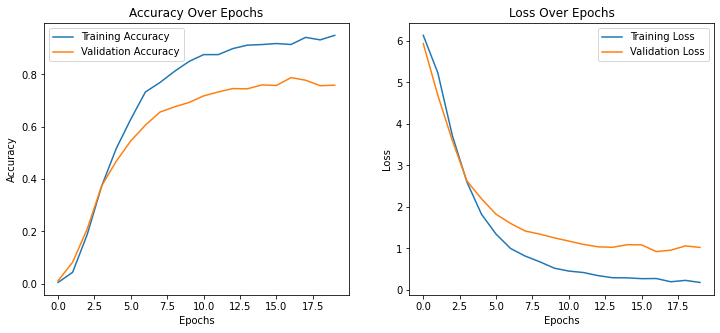

In [186]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [187]:
from tensorflow.keras.models import Model
# Create an intermediate model based on the 'global_average_pooling2d_1' layer name
feature_extraction_model = Model(inputs=model.input, outputs=model.get_layer('global_average_pooling2d').output)

# Generate features for the test set (or any other set of images)
features_X_test = feature_extraction_model.predict(X_test)
features_X_train = feature_extraction_model.predict(X_train)


# Print the shape of the extracted features
print("Extracted Features x test Shape:", features_X_test.shape)
print("Extracted feature x train shape:", features_X_train.shape)


Extracted Features x test Shape: (1002, 1280)
Extracted feature x train shape: (4008, 1280)


In [188]:
print(X_train.shape)  # Should be (batch_size, height, width, channels)
print(X_test.shape)   # Should be similar to X_train

(4008, 224, 224, 3)
(1002, 224, 224, 3)


In [189]:
print(y_train.shape)
print(y_test.shape)

(4008,)
(1002,)


In [190]:
print(f"Labels train unique values: {np.unique(y_train)}")
print(f"Labels test unique values: {np.unique(y_test)}")

Labels train unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 23

In [191]:
print(features_X_test)
print(features_X_train)
print(y_train)
print(y_test)

[[ 0.4974833  -0.05035677 -0.03107186 ...  0.02978917 -0.15386875
   0.34372258]
 [-0.09883439 -0.04806227 -0.06404226 ...  0.4017429  -0.18724963
   0.36121327]
 [-0.09041487 -0.04081359 -0.15728268 ...  0.19175811  0.01978719
   0.20733978]
 ...
 [-0.1028101  -0.0664048  -0.11408468 ...  0.35854024 -0.15311712
   0.77123797]
 [-0.00151993 -0.07956771 -0.07595503 ... -0.08402353 -0.10859824
   0.25639057]
 [ 0.0838273  -0.07599795 -0.01156365 ... -0.12664053 -0.15839638
   0.30813733]]
[[ 0.23593071 -0.08055919 -0.14130732 ...  0.8786502  -0.19368152
   0.3002331 ]
 [ 0.19990386 -0.07071532 -0.08645496 ...  0.04812768 -0.14360149
   0.18330601]
 [ 0.0058303  -0.06295961  0.04033241 ...  0.24189961 -0.1332666
   0.15880474]
 ...
 [-0.10618188 -0.04986207 -0.09479409 ...  0.35476378 -0.16566648
   0.12610936]
 [ 0.26614982 -0.03107239 -0.11568128 ...  0.6968281  -0.12636651
   0.1772276 ]
 [ 0.04161135 -0.0473359  -0.0570575  ...  0.13933456 -0.12680602
   0.16170238]]
[201 167 366 ... 

In [192]:
print(f"y_train: {y_train}")
print(f"y_test: {y_test}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train: [201 167 366 ... 309 377  86]
y_test: [105 299 178 ... 294 328 489]
y_train shape: (4008,)
y_test shape: (1002,)


# hyperparameter tuning using orca predator algorithm for efficientNet model

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras import backend as K

# Orca Predator Algorithm (OPA) for Feature Optimization
class OrcaPredatorAlgorithm:
    def __init__(self, n_predators, n_features, max_iter, features, labels):
        self.n_predators = n_predators
        self.n_features = n_features
        self.max_iter = max_iter
        self.features = features
        self.labels = labels
        # Initialize positions to include binary features and continuous hyperparameters
        self.position = np.random.uniform(0, 1, size=(n_predators, n_features + 2))  # Last two dimensions for learning rate and batch size
        self.velocity = np.random.uniform(-1, 1, size=(n_predators, n_features + 2))  # Velocity
        self.best_position = np.copy(self.position)  # Best position
        self.best_fitness = np.full(n_predators, -np.inf)  # Best fitness for each predator
        self.global_best_position = np.zeros(n_features + 2)  # Global best position
        self.global_best_fitness = -np.inf  # Global best fitness

        print("Initial positions:\n", self.position)  # Debug: Initial positions of predators
        print("Initial velocities:\n", self.velocity)  # Debug: Initial velocities of predators

    # Function to evaluate fitness based on feature selection and hyperparameters
    def evaluate_fitness(self, predator_position):
        selected_features = np.where(predator_position[:-2] >= 0.5)[0]  # Get selected feature indices
        print(f"\nSelected features (Count: {len(selected_features)}): {selected_features}")  # Debug: Check selected features
        learning_rate = predator_position[-2]  # Learning rate
        batch_size = int(predator_position[-1] * 128) + 1  # Scale batch size between 1 and 128
        
        print(f"Learning Rate: {learning_rate}, Batch Size: {batch_size}")  # Debug: Check hyperparameters
        
        # If no features are selected, return a low fitness value
        if len(selected_features) == 0:
            print("No features selected, returning low fitness")  # Debug: No features selected
            return -np.inf

        # Use only the selected features
        X_selected = self.features[:, selected_features]
        
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_selected, self.labels, test_size=0.3, random_state=42)

        # Define the EfficientNet model for classification
        model = self.build_classifier(X_train.shape[1], n_classes=len(np.unique(self.labels)), learning_rate=learning_rate)  # Modify for multi-class
        
        # Train the model
        print(f"Training model with {X_train.shape[0]} samples and {X_test.shape[0]} test samples.")  # Debug: Training info
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose=0)
        
        # Evaluate on the test set
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)  # Multi-class prediction using argmax
        accuracy = accuracy_score(y_test, y_pred_classes)
        
        print(f"Accuracy for current predator: {accuracy}")  # Debug: Accuracy
        
        return accuracy
    
    # Function to build a simple dense classifier model
    def build_classifier(self, input_shape, n_classes, learning_rate):
        inputs = Input(shape=(input_shape,))
        x = Dense(128, activation='relu')(inputs)  # Simple dense layers
        x = Dense(64, activation='relu')(x)
        output = Dense(n_classes, activation='softmax')(x)  # Multi-class classification using softmax
        
        model = Model(inputs=inputs, outputs=output)
        model.compile(optimizer=Adam(learning_rate=learning_rate), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])  # Sparse categorical cross-entropy for multi-class
        return model
    
    # Orca movement behavior
    def move_predators(self):
        for i in range(self.n_predators):
            # Update velocity based on best predator
            self.velocity[i] = (0.5 * self.velocity[i] + 
                                np.random.uniform(0, 1) * (self.best_position[i] - self.position[i]) + 
                                np.random.uniform(0, 1) * (self.global_best_position - self.position[i]))
            
            # Update position
            self.position[i] += self.velocity[i]
            
            # Ensure the binary features remain between 0 and 1
            self.position[i][:self.n_features] = np.clip(self.position[i][:self.n_features], 0, 1)
            # Ensure hyperparameters are in reasonable ranges
            self.position[i][-2] = np.clip(self.position[i][-2], 0.0001, 0.1)  # Learning rate
            self.position[i][-1] = np.clip(self.position[i][-1], 0, 1)  # Batch size factor

        print("Updated positions after movement:\n", self.position)  # Debug: Updated positions
        print("Updated velocities after movement:\n", self.velocity)  # Debug: Updated velocities

    # Update best position and fitness
    def update_best_position(self):
        for i in range(self.n_predators):
            fitness = self.evaluate_fitness(self.position[i])
            print(f"Predator {i} fitness: {fitness}")  # Debug: Fitness of each predator

            if fitness > self.best_fitness[i]:
                self.best_fitness[i] = fitness
                self.best_position[i] = self.position[i]
                print(f"Updated best position for Predator {i}")  # Debug: Updated best position
            
            # Update global best
            if fitness > self.global_best_fitness:
                self.global_best_fitness = fitness
                self.global_best_position = self.position[i]
                print(f"Updated global best position and fitness")  # Debug: Updated global best

    # Run the OPA algorithm
    def run(self):
        for iteration in range(self.max_iter):
            print(f"\nIteration: {iteration + 1}/{self.max_iter}")
            self.update_best_position()
            self.move_predators()

        return self.global_best_position, self.global_best_fitness


# Running the Orca Predator Algorithm
n_predators = 10  # Number of predators (agents)
max_iter = 10


# Initialize and run the OPA algorithm
opa = OrcaPredatorAlgorithm(n_predators=n_predators, n_features= features_X_train.shape[1], 
                            max_iter=max_iter, features=features_X_train, labels=y_train)


# Run the optimization
best_features, best_fitness = opa.run()


Initial positions:
 [[0.17058239 0.74799875 0.31516421 ... 0.34714571 0.67890546 0.10384547]
 [0.23647039 0.4264477  0.3787288  ... 0.67263975 0.25782871 0.51337681]
 [0.47083926 0.11580242 0.88970772 ... 0.41806025 0.31357837 0.19533413]
 ...
 [0.7377005  0.86432295 0.21348806 ... 0.72470263 0.91938041 0.42227379]
 [0.36807109 0.53736168 0.27015304 ... 0.84995285 0.8009638  0.41818883]
 [0.26549952 0.46880165 0.27410815 ... 0.8027995  0.38191668 0.30432977]]
Initial velocities:
 [[-0.39833088 -0.55536296  0.06831895 ...  0.11918768  0.12207825
   0.91774271]
 [ 0.21545738  0.78760588 -0.86983873 ... -0.20045207  0.43867075
   0.07775702]
 [ 0.08620362  0.84240804 -0.12164835 ... -0.70028796 -0.53853241
  -0.25361845]
 ...
 [-0.80540315 -0.09344885  0.04817255 ...  0.84328608 -0.62572513
   0.90208707]
 [ 0.41129484  0.79488891  0.71156209 ... -0.55218695  0.64849233
  -0.44783902]
 [ 0.47994079  0.81295308  0.2835874  ...  0.40665779 -0.52991812
  -0.99073128]]

Iteration: 1/10

Selec

Accuracy for current predator: 0.0008312551953449709
Predator 2 fitness: 0.0008312551953449709
Updated best position for Predator 2

Selected features (Count: 606): [   0    1    4    5    8    9   10   12   15   17   21   23   26   28
   29   32   33   34   36   37   39   44   54   57   58   59   60   64
   69   70   71   72   73   76   80   81   83   84   91   96   97   98
  100  101  102  105  109  114  116  117  122  129  133  138  140  142
  143  145  146  149  152  153  154  155  157  158  160  161  162  164
  165  166  167  169  173  175  176  177  180  184  187  188  189  191
  193  195  196  198  199  206  208  209  212  213  215  219  220  222
  223  226  230  236  239  241  244  247  248  249  252  253  255  257
  259  261  268  270  271  272  273  274  275  280  282  283  284  285
  287  289  291  292  293  296  301  302  307  309  317  318  321  322
  323  326  328  330  333  334  338  341  342  344  345  346  351  353
  355  356  359  360  361  362  365  367  368  371  37

Accuracy for current predator: 0.0
Predator 5 fitness: 0.0
Updated best position for Predator 5

Selected features (Count: 632): [   3    5    6    8   10   17   22   23   25   26   28   29   30   31
   33   35   36   37   40   41   42   43   44   45   46   47   48   49
   50   51   53   55   56   60   61   62   65   66   67   68   71   72
   73   74   75   76   79   81   84   88   89   91   96   99  102  105
  109  110  111  113  115  116  117  120  123  126  127  128  130  131
  135  139  140  141  144  145  148  149  150  151  152  156  162  163
  165  166  167  168  170  171  173  174  178  179  181  182  183  186
  187  188  189  196  197  198  199  200  206  207  208  209  211  215
  217  218  223  224  225  229  230  231  233  234  236  237  238  250
  251  252  253  257  261  265  266  267  269  270  271  272  283  285
  291  292  294  295  296  299  300  303  306  307  312  313  316  318
  321  324  328  329  332  333  335  342  344  345  346  347  354  360
  361  363  364  36

Accuracy for current predator: 0.0008312551953449709
Predator 8 fitness: 0.0008312551953449709
Updated best position for Predator 8

Selected features (Count: 622): [   4    6    7   12   14   15   16   20   21   23   24   25   28   29
   30   32   33   34   35   38   40   41   45   46   48   53   54   55
   57   58   59   63   65   67   70   71   72   73   77   78   79   80
   82   83   84   86   87   88   94   95   97  101  104  105  108  113
  115  116  120  122  128  129  130  131  134  137  138  147  149  153
  154  160  163  165  166  167  169  170  172  173  174  176  184  185
  186  187  189  190  191  192  194  195  200  201  204  205  206  207
  208  210  212  213  218  219  222  223  224  226  227  228  230  234
  236  239  241  243  244  246  249  253  254  256  257  260  261  262
  263  264  266  267  268  269  271  272  273  274  277  280  281  282
  287  289  291  295  296  299  300  303  307  311  312  313  316  317
  318  319  323  324  325  326  327  329  332  335  33

Accuracy for current predator: 0.0016625103906899418
Predator 1 fitness: 0.0016625103906899418
Updated best position for Predator 1

Selected features (Count: 649): [   1    2    8   10   11   13   14   16   17   19   20   21   25   27
   29   32   35   37   38   40   44   46   47   49   53   54   55   58
   60   61   64   65   66   68   70   72   75   76   78   79   80   83
   84   86   90   93   94   97   98   99  100  101  103  104  105  106
  108  114  115  116  117  118  119  120  121  122  123  126  128  130
  131  132  133  138  140  141  142  143  144  146  147  148  151  156
  157  158  159  161  163  164  165  166  169  171  172  174  176  179
  180  184  187  189  190  197  200  204  206  208  209  210  212  213
  215  219  220  221  223  226  230  233  236  238  239  240  243  244
  245  246  250  251  253  258  260  261  272  273  278  279  280  281
  284  285  286  287  289  290  291  292  294  295  296  298  299  300
  301  305  308  309  317  318  319  322  323  326  32

Accuracy for current predator: 0.0
Predator 4 fitness: 0.0

Selected features (Count: 645): [   4    5    6   10   12   13   14   19   20   21   26   28   30   31
   33   35   36   38   39   44   46   50   52   54   55   56   57   60
   62   64   65   68   69   73   75   76   77   82   83   84   85   86
   88   90   91   92   94   97   98   99  101  102  105  106  108  111
  114  115  116  117  118  119  120  122  123  125  129  131  132  136
  137  138  140  141  142  143  145  147  148  150  151  152  154  156
  157  158  159  160  164  167  168  169  171  172  173  174  175  176
  177  178  182  183  186  187  189  191  194  195  201  202  203  206
  208  212  213  214  218  219  221  222  224  225  228  230  231  233
  234  236  238  242  243  244  245  246  247  248  249  250  252  255
  256  257  258  261  262  263  264  266  267  268  269  271  272  275
  279  280  285  287  288  292  295  296  297  298  301  304  306  308
  310  314  317  320  321  322  323  324  326  327  331 

Accuracy for current predator: 0.004156275976724855
Predator 7 fitness: 0.004156275976724855
Updated best position for Predator 7
Updated global best position and fitness

Selected features (Count: 653): [   1    2    4    5    8   10   11   13   14   15   17   21   23   24
   25   26   28   29   30   32   37   38   39   40   42   43   47   49
   53   55   56   58   59   60   61   64   66   67   70   71   73   79
   82   84   86   87   88   90   91   93   96   97  101  102  106  108
  110  112  115  118  119  124  128  129  131  132  133  136  137  139
  141  142  145  146  147  149  150  151  155  160  161  162  163  168
  170  172  175  182  184  186  188  189  190  193  194  196  200  202
  206  207  208  209  211  213  215  219  220  222  224  225  228  231
  232  234  238  239  241  245  247  250  254  258  260  261  262  264
  268  269  270  272  275  276  277  279  281  286  289  291  292  293
  294  296  298  300  302  305  308  311  315  317  319  320  321  322
  323  324  326

Accuracy for current predator: 0.0
Predator 0 fitness: 0.0

Selected features (Count: 619): [   1    6    7    8   10   12   13   15   16   18   23   25   32   33
   34   35   36   39   41   44   45   47   52   53   54   55   56   58
   60   61   66   68   70   73   75   83   86   89   90   96   97  101
  102  105  106  107  108  110  111  113  114  115  116  117  122  123
  128  130  133  136  139  140  141  142  143  144  146  148  149  156
  161  163  164  167  168  169  171  172  173  174  176  178  180  184
  188  189  190  193  194  199  201  202  204  207  209  210  211  213
  216  217  220  222  223  225  226  230  231  233  234  236  237  238
  243  253  256  257  258  259  262  263  266  269  271  272  276  279
  280  281  283  285  286  287  288  290  293  295  296  297  298  299
  300  301  303  305  309  311  315  316  317  321  322  323  324  325
  326  337  338  341  342  343  344  347  348  349  350  351  353  354
  356  357  359  360  362  363  364  365  366  368  371 

Accuracy for current predator: 0.17206982543640897
Predator 3 fitness: 0.17206982543640897
Updated best position for Predator 3
Updated global best position and fitness

Selected features (Count: 625): [   4    7    8   10   11   12   15   18   19   23   25   29   31   32
   33   34   37   39   41   42   44   46   47   52   54   55   57   58
   60   65   66   67   70   71   73   76   78   81   82   87   88   90
   91   93   95   97   98  101  103  106  108  109  115  119  120  122
  123  126  131  132  136  140  142  143  144  145  146  147  148  153
  156  157  158  161  164  165  166  167  168  169  170  172  173  174
  176  179  180  184  186  187  189  190  192  194  197  198  199  202
  206  207  210  211  212  213  214  216  217  218  220  222  225  228
  230  233  234  236  237  238  239  242  246  249  252  254  256  257
  258  259  260  261  262  263  264  265  269  271  272  280  281  282
  286  287  289  290  291  293  294  295  296  297  298  300  301  303
  314  315  317  

Accuracy for current predator: 0.0008312551953449709
Predator 6 fitness: 0.0008312551953449709

Selected features (Count: 651): [   1    2    4    7    8   10   11   12   15   16   18   19   21   23
   24   25   26   27   29   31   32   34   35   36   39   41   44   46
   47   52   53   54   55   56   58   59   60   64   66   71   73   77
   78   82   83   85   86   87   88   90   94   95   97   98  100  106
  108  114  115  117  120  122  123  126  131  132  136  140  142  143
  144  145  146  147  153  156  160  161  165  168  170  172  173  174
  175  176  180  181  183  184  186  187  188  190  192  193  194  199
  201  202  207  208  210  211  212  213  214  218  219  220  222  223
  225  226  227  228  230  233  234  236  237  238  244  246  252  253
  254  257  258  260  261  262  263  264  266  269  271  272  273  274
  276  277  279  280  282  283  285  287  289  293  295  296  297  298
  300  301  303  305  309  313  314  315  317  318  319  321  322  323
  324  326  327  337

Accuracy for current predator: 0.19451371571072318
Predator 9 fitness: 0.19451371571072318
Updated best position for Predator 9
Updated global best position and fitness
Updated positions after movement:
 [[4.70285389e-01 1.00000000e+00 4.99347600e-01 ... 6.58612754e-01
  1.00000000e-01 0.00000000e+00]
 [3.33202767e-01 1.00000000e+00 2.89041339e-01 ... 6.17397770e-01
  5.69038499e-02 1.63618283e-01]
 [3.53552803e-01 1.00000000e+00 4.09644701e-01 ... 8.94283016e-01
  1.00000000e-04 0.00000000e+00]
 ...
 [1.29398679e-02 7.97785727e-01 6.04871171e-01 ... 8.15286524e-01
  1.00000000e-04 8.00183993e-02]
 [3.61998737e-01 1.00000000e+00 5.61001721e-01 ... 7.29030147e-01
  1.00000000e-01 0.00000000e+00]
 [4.14157981e-01 1.00000000e+00 5.99103016e-01 ... 7.53927547e-01
  1.00000000e-04 0.00000000e+00]]
Updated velocities after movement:
 [[ 0.35957169  0.50157235  0.13643214 ...  0.19067193  0.63747521
  -0.57715694]
 [ 0.09008095  0.04143426  0.28904134 ...  0.20405449 -0.04309615
  -0.25640795

Accuracy for current predator: 0.0008312551953449709
Predator 1 fitness: 0.0008312551953449709

Selected features (Count: 653): [   1    7    8   10   11   12   15   16   18   19   21   23   24   26
   27   29   30   31   32   34   37   38   39   41   42   44   46   47
   53   54   55   56   58   59   60   61   63   65   66   71   73   75
   77   78   82   85   86   89   90   91   94   95   97  100  102  105
  106  107  112  113  117  119  122  123  126  131  132  135  138  139
  142  143  144  145  146  147  151  153  156  161  165  168  169  170
  172  173  174  175  176  180  181  183  186  187  190  191  193  194
  198  199  201  202  205  206  207  210  211  212  214  216  218  219
  222  223  225  233  234  235  236  237  239  242  244  246  254  257
  258  259  260  261  264  266  269  272  274  277  278  280  282  283
  285  286  287  289  290  291  293  295  297  301  303  305  308  309
  310  313  314  315  319  322  326  328  335  337  342  345  347  348
  350  351  352  353

Accuracy for current predator: 0.0008312551953449709
Predator 4 fitness: 0.0008312551953449709

Selected features (Count: 662): [   1    4    5    6    7    8   10   11   12   13   14   15   16   18
   20   21   23   26   28   30   31   33   35   36   38   39   41   42
   44   46   47   50   52   53   54   55   56   57   58   59   60   61
   64   68   69   73   75   76   77   82   83   85   86   88   90   91
   94   95   97   98   99  100  101  102  105  106  108  111  114  115
  116  117  119  122  123  131  132  136  137  138  140  141  142  143
  145  147  148  150  151  152  153  154  156  158  160  164  167  168
  169  172  173  174  175  176  177  178  186  187  190  191  194  198
  199  201  202  206  207  211  212  213  216  218  219  221  222  223
  224  225  230  231  233  234  236  242  243  244  246  248  250  255
  256  257  258  261  262  263  264  266  269  271  272  275  279  280
  283  285  287  295  296  297  298  299  301  304  305  306  308  309
  310  313  314  317

Accuracy for current predator: 0.01662510390689942
Predator 7 fitness: 0.01662510390689942
Updated best position for Predator 7

Selected features (Count: 656): [   1    2    7    8   10   11   12   15   16   18   21   23   24   26
   27   29   30   31   32   34   37   38   39   41   44   46   47   53
   54   55   56   58   59   60   63   65   66   71   73   75   77   78
   82   83   85   86   89   90   91   94   95   97  100  102  105  106
  107  116  117  119  122  123  126  130  131  132  138  139  142  143
  144  145  147  153  156  165  166  168  169  170  172  173  174  175
  176  180  181  183  184  186  187  190  191  192  193  194  199  201
  202  205  206  207  210  211  212  214  216  218  219  222  223  225
  233  234  236  237  239  242  244  246  251  254  255  257  258  259
  260  261  263  264  266  269  272  273  274  278  280  282  283  285
  287  289  290  291  293  295  297  300  301  303  305  308  310  313
  314  317  319  322  323  324  325  326  335  337  342  3

Accuracy for current predator: 0.0024937655860349127
Predator 0 fitness: 0.0024937655860349127
Updated best position for Predator 0

Selected features (Count: 651): [   1    7    8   10   11   12   13   15   16   18   21   23   24   26
   27   31   32   34   37   38   39   41   42   44   46   47   53   54
   55   56   58   59   60   61   63   65   66   71   73   75   77   78
   82   85   86   89   90   91   94   95   97  100  102  105  106  107
  112  113  117  119  122  123  126  130  131  132  138  139  142  143
  144  145  146  147  151  153  156  161  165  168  169  170  172  173
  174  175  176  180  181  183  184  186  187  190  191  193  194  199
  202  205  206  207  210  211  212  214  216  218  219  222  223  225
  233  234  236  237  239  242  246  251  254  257  258  259  260  261
  263  264  266  269  272  274  276  278  280  282  283  285  286  287
  289  290  291  293  295  297  298  301  303  305  308  309  310  311
  313  314  315  322  324  326  328  335  337  342  34

Accuracy for current predator: 0.16874480465502908
Predator 3 fitness: 0.16874480465502908

Selected features (Count: 659): [   1    7    8   10   11   12   15   16   18   21   23   24   26   27
   29   30   31   32   34   37   38   39   41   42   44   46   47   53
   54   55   56   58   59   60   61   63   65   66   71   73   75   77
   78   82   85   86   89   90   91   94   95   97  100  102  105  106
  107  112  113  117  119  122  123  126  130  131  132  138  139  143
  144  145  147  151  153  156  161  165  166  168  169  170  172  173
  174  175  176  180  181  183  184  186  187  190  191  192  193  194
  198  199  202  205  206  207  210  211  212  214  216  218  219  222
  223  225  233  234  235  236  237  239  242  246  251  254  255  257
  258  259  260  261  263  264  266  269  272  274  278  280  282  283
  285  286  287  289  290  291  293  295  297  298  300  301  303  305
  308  309  310  311  313  314  315  317  322  324  325  326  328  335
  337  342  347  348  35

Accuracy for current predator: 0.0
Predator 6 fitness: 0.0

Selected features (Count: 648): [   1    2    7    8   10   11   12   15   16   18   21   23   24   25
   26   27   29   31   32   34   37   38   39   41   42   44   46   47
   53   54   55   56   58   59   60   63   65   66   71   73   77   78
   82   83   85   86   90   94   95   97  100  105  106  107  114  117
  119  122  123  126  131  132  138  139  142  143  144  145  147  151
  153  156  160  165  168  169  170  172  173  174  175  176  180  181
  183  184  186  187  190  191  193  194  198  199  202  205  206  207
  210  211  212  214  218  219  222  223  225  233  234  235  236  237
  239  242  244  246  251  254  255  257  258  260  261  263  264  266
  269  271  272  273  274  276  277  278  280  282  283  285  286  287
  289  291  293  295  296  297  300  301  303  305  309  310  311  313
  314  315  317  319  321  322  325  326  328  335  337  342  345  347
  348  350  351  352  353  355  357  360  363  364  366 

Accuracy for current predator: 0.16791354945968412
Predator 9 fitness: 0.16791354945968412
Updated positions after movement:
 [[2.42370088e-01 1.00000000e+00 5.87369454e-01 ... 6.78772380e-01
  1.00000000e-01 0.00000000e+00]
 [1.92241627e-01 9.27459856e-01 4.36870770e-01 ... 5.69131744e-01
  2.28397710e-02 1.97527639e-01]
 [3.12680919e-01 1.00000000e+00 5.16049149e-01 ... 8.98694975e-01
  1.00000000e-04 0.00000000e+00]
 ...
 [1.11640417e-01 1.00000000e+00 6.45529635e-01 ... 7.26410513e-01
  1.00000000e-04 0.00000000e+00]
 [3.12512797e-01 9.96552954e-01 6.09831320e-01 ... 5.62864782e-01
  4.25011238e-02 0.00000000e+00]
 [1.68255381e-01 1.00000000e+00 5.73806472e-01 ... 6.02460165e-01
  1.00000000e-04 0.00000000e+00]]
Updated velocities after movement:
 [[-0.11038813  0.08154162  0.03947242 ... -0.00388129  0.17499283
  -0.12621878]
 [-0.13770612 -0.06871692 -0.02927385 ... -0.14472465 -0.00248431
   0.14461258]
 [-0.07090721  0.05313482  0.07511503 ... -0.10130502 -0.02200031
  -0.03303

Accuracy for current predator: 0.0008312551953449709
Predator 1 fitness: 0.0008312551953449709

Selected features (Count: 658): [   1    2    7    8   10   11   12   15   16   18   21   23   24   26
   27   29   30   31   32   34   37   38   39   41   42   44   46   47
   53   54   55   56   58   59   60   61   63   65   66   71   73   75
   77   78   82   85   86   89   90   91   94   95   97  100  102  105
  106  107  112  113  117  119  122  123  126  131  132  135  138  139
  143  144  145  147  151  152  153  156  161  165  168  169  170  172
  173  174  175  176  180  181  183  186  187  190  191  192  193  194
  198  199  202  205  206  207  210  211  212  214  216  218  219  222
  223  225  233  234  235  236  237  239  242  246  254  255  257  258
  259  260  261  263  264  266  269  272  274  277  278  280  282  283
  285  286  287  289  290  291  293  295  297  301  303  304  305  308
  309  310  311  313  314  315  322  324  325  326  328  335  337  342
  347  348  350  351

Accuracy for current predator: 0.0
Predator 4 fitness: 0.0

Selected features (Count: 664): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   45
   46   47   53   54   55   56   58   59   60   61   63   65   66   71
   73   75   77   78   82   85   86   87   89   90   94   95   97  100
  105  106  107  112  113  117  119  121  122  123  124  126  130  131
  132  135  139  143  144  145  147  151  156  163  165  166  168  170
  172  173  174  175  176  180  181  183  187  190  191  192  193  194
  197  198  199  202  205  206  207  210  211  212  214  216  218  219
  222  223  225  233  234  235  236  237  239  240  242  246  251  254
  257  258  260  261  263  266  269  272  273  274  277  278  280  281
  282  283  285  286  287  289  290  291  293  294  295  297  300  301
  303  305  308  309  310  311  313  314  315  322  324  325  326  328
  335  337  342  347  348  350  351  352  355  357  362 

Accuracy for current predator: 0.17539484621778886
Predator 7 fitness: 0.17539484621778886
Updated best position for Predator 7

Selected features (Count: 668): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   46
   47   53   54   55   56   58   59   60   61   63   65   66   71   73
   75   77   78   82   83   85   86   87   90   91   94   95   97  100
  102  105  106  107  112  113  115  117  119  122  123  124  126  130
  131  132  139  142  143  144  145  146  147  151  156  163  165  166
  168  170  172  173  174  175  176  180  181  183  184  186  187  190
  191  192  193  194  196  199  202  205  206  207  210  211  212  214
  216  218  219  222  223  225  233  234  235  236  237  239  242  246
  251  254  257  258  260  261  263  264  266  269  272  274  277  278
  280  281  282  283  285  286  287  289  290  291  293  294  295  297
  298  300  301  303  305  308  309  310  311  313  314  3

Accuracy for current predator: 0.0008312551953449709
Predator 0 fitness: 0.0008312551953449709

Selected features (Count: 650): [   1    7    8   10   11   12   13   15   16   18   21   23   24   26
   27   30   31   32   34   38   39   41   42   44   45   46   47   53
   54   55   56   58   59   60   61   63   65   66   73   75   77   78
   82   83   85   86   89   90   94   95   97  100  105  106  107  112
  113  117  119  122  123  126  130  131  132  139  141  143  144  145
  147  151  156  163  165  166  168  169  170  172  173  174  175  176
  180  181  183  190  191  192  193  194  198  199  202  205  206  207
  210  211  212  214  216  218  219  222  223  225  230  233  234  235
  236  237  239  240  242  246  251  254  255  256  257  258  260  261
  263  266  269  272  274  278  280  281  282  283  285  286  287  289
  290  291  293  295  297  298  300  301  303  305  308  309  311  313
  314  315  322  324  325  326  328  335  337  342  347  348  350  351
  355  357  362  363

Accuracy for current predator: 0.17206982543640897
Predator 3 fitness: 0.17206982543640897

Selected features (Count: 632): [   1    7    8   10   11   12   15   18   19   21   23   25   27   29
   31   32   33   34   37   38   39   41   42   44   46   47   53   54
   55   56   58   60   65   66   67   71   73   76   77   78   82   85
   87   88   90   94   95   97  100  105  106  108  115  119  120  122
  123  124  126  130  131  132  136  139  143  144  145  146  147  148
  156  158  161  164  165  166  168  170  172  173  174  176  179  180
  181  183  184  186  187  189  190  191  192  194  197  198  199  202
  205  206  207  210  211  212  213  214  216  218  220  222  225  228
  230  233  234  236  237  238  239  242  246  249  251  254  256  257
  258  259  260  261  262  263  264  266  269  272  274  280  281  282
  286  287  289  290  291  293  294  295  296  297  298  300  301  303
  305  310  311  313  314  317  318  319  322  325  326  328  331  337
  340  341  342  347  34

Accuracy for current predator: 0.0
Predator 6 fitness: 0.0

Selected features (Count: 666): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   46
   47   53   54   55   56   58   59   60   61   63   65   66   71   73
   75   77   78   82   83   85   86   89   90   91   94   95   97  100
  102  105  106  107  112  113  117  119  122  123  126  130  131  132
  138  139  143  144  145  147  151  156  163  165  166  168  170  172
  173  174  175  176  180  181  183  187  190  191  192  193  194  197
  198  199  202  205  206  207  210  211  212  214  216  218  219  222
  223  225  233  234  235  236  237  239  240  242  246  251  254  255
  256  257  258  260  261  263  264  266  269  272  274  278  280  282
  283  285  286  287  289  290  291  293  294  295  297  300  301  303
  304  305  308  309  310  311  313  314  315  322  324  325  326  328
  335  337  342  347  348  350  351  352  355  357  362 

Accuracy for current predator: 0.16874480465502908
Predator 9 fitness: 0.16874480465502908
Updated positions after movement:
 [[3.45507590e-01 1.00000000e+00 6.16963631e-01 ... 6.73858874e-01
  9.11927640e-02 0.00000000e+00]
 [2.74052485e-01 9.73538868e-01 5.71435443e-01 ... 5.85441667e-01
  1.46873176e-02 1.03965512e-01]
 [2.37428159e-01 1.00000000e+00 6.78014433e-01 ... 5.87109519e-01
  1.00000000e-04 0.00000000e+00]
 ...
 [3.01184465e-01 1.00000000e+00 6.37830282e-01 ... 6.37907891e-01
  1.00000000e-04 0.00000000e+00]
 [4.07609241e-01 9.93434299e-01 6.85293880e-01 ... 6.61683992e-01
  5.30377366e-02 0.00000000e+00]
 [4.39721011e-01 1.00000000e+00 6.57781974e-01 ... 7.42399914e-01
  1.00000000e-04 0.00000000e+00]]
Updated velocities after movement:
 [[ 0.07314636  0.02038541  0.04101118 ...  0.0012293  -0.00880724
  -0.0315547 ]
 [ 0.10721394  0.04141883  0.15210486 ...  0.07234706 -0.01066373
  -0.10905954]
 [ 0.00547423  0.01328371  0.08351201 ... -0.10971748 -0.00550008
  -0.00825

Accuracy for current predator: 0.0008312551953449709
Predator 1 fitness: 0.0008312551953449709

Selected features (Count: 676): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   45
   46   47   53   54   55   56   58   59   60   61   63   65   66   71
   73   75   77   78   82   83   85   86   87   89   90   94   95   97
  100  105  106  107  112  113  117  119  121  122  123  124  126  130
  131  132  139  143  144  145  147  151  156  163  165  166  168  170
  172  173  174  175  176  180  181  183  187  190  191  192  193  194
  197  198  199  202  205  206  207  210  211  212  214  216  218  219
  222  223  225  230  233  234  235  236  237  239  240  242  246  251
  254  255  256  257  258  260  261  263  266  269  272  273  274  278
  280  281  282  285  286  287  289  290  291  293  294  295  297  300
  301  303  305  308  309  310  311  313  314  315  322  324  325  326
  328  335  337  342

Accuracy for current predator: 0.0016625103906899418
Predator 4 fitness: 0.0016625103906899418

Selected features (Count: 663): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   45
   46   47   53   54   55   56   58   59   60   61   63   65   66   71
   75   77   78   82   85   86   87   89   90   94   95   97  100  105
  106  107  112  113  119  121  122  123  124  126  130  131  132  135
  139  143  144  145  147  151  156  163  165  166  168  170  172  173
  174  175  176  180  181  183  187  190  191  192  193  194  197  198
  199  202  205  206  207  210  211  212  214  216  218  219  222  223
  225  233  234  235  236  237  239  240  242  246  251  254  256  257
  258  260  261  263  266  269  272  273  274  277  278  280  281  282
  285  286  287  289  290  291  293  294  295  297  300  301  303  305
  308  309  310  311  313  314  315  322  324  325  326  328  332  335
  337  340  342  347

Accuracy for current predator: 0.18121363258520365
Predator 7 fitness: 0.18121363258520365
Updated best position for Predator 7

Selected features (Count: 667): [   1    2    7    8   10   11   12   15   16   18   21   23   24   26
   27   29   30   31   32   34   37   38   39   41   42   44   45   46
   47   53   54   55   56   58   59   60   61   63   65   66   71   73
   75   77   78   82   85   86   87   89   90   94   95   97  100  105
  106  107  112  113  117  119  121  122  123  124  126  130  131  132
  139  143  144  145  147  151  156  163  165  166  168  170  172  173
  174  175  176  180  181  183  184  187  190  191  192  193  194  197
  198  199  202  205  206  207  210  211  212  214  216  218  219  222
  223  225  233  234  235  236  237  239  240  242  246  251  254  257
  258  260  261  263  266  269  272  273  274  277  278  280  281  282
  283  285  286  287  289  290  291  293  294  295  297  300  301  303
  305  308  309  310  311  313  314  315  322  324  325  3

Accuracy for current predator: 0.0008312551953449709
Predator 0 fitness: 0.0008312551953449709

Selected features (Count: 659): [   1    7    8   10   11   12   13   15   16   18   21   23   24   25
   26   27   31   32   34   37   39   41   42   44   45   46   47   53
   54   55   56   58   59   60   61   63   65   66   70   71   73   75
   78   82   83   85   86   87   89   90   94   95   97  105  106  107
  110  112  113  117  119  122  123  126  130  131  132  135  139  143
  144  145  147  151  156  161  163  165  166  168  169  170  172  173
  174  175  176  180  181  183  184  190  191  192  193  194  199  202
  205  206  207  210  211  212  213  214  216  218  219  222  223  225
  230  231  233  234  235  236  237  238  240  246  251  254  256  257
  258  259  260  261  262  263  266  269  272  274  276  278  280  281
  283  285  286  287  289  290  291  293  295  296  297  300  301  303
  305  308  309  311  313  314  315  322  324  325  326  328  335  337
  338  342  343  347

Accuracy for current predator: 0.1886949293433084
Predator 3 fitness: 0.1886949293433084

Selected features (Count: 664): [   1    7    8   10   11   12   15   16   18   19   21   23   24   25
   26   27   29   31   32   34   37   38   39   41   42   44   46   47
   53   54   55   56   58   60   63   65   66   70   71   73   77   78
   82   85   86   87   89   90   94   95   97  100  105  106  112  119
  120  122  123  124  126  130  131  132  135  139  143  144  145  146
  147  156  161  164  165  166  168  170  172  173  174  175  176  179
  180  181  183  184  187  190  191  192  193  194  197  198  199  202
  205  206  207  210  211  212  213  214  216  218  219  222  223  225
  228  230  233  234  236  237  238  239  242  246  251  254  257  258
  259  260  261  262  263  264  266  269  272  274  280  281  282  285
  286  287  289  290  291  293  294  295  296  297  298  300  301  303
  305  310  311  313  314  315  317  318  322  325  326  328  337  341
  342  347  348  349  350 

Accuracy for current predator: 0.0008312551953449709
Predator 6 fitness: 0.0008312551953449709

Selected features (Count: 666): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   45
   46   47   53   54   55   56   58   59   60   61   63   65   66   71
   75   77   78   82   85   86   87   89   90   94   95   97  100  105
  106  107  112  113  119  121  122  123  124  126  130  131  132  135
  139  143  144  145  147  151  156  163  165  166  168  170  172  173
  174  175  176  180  181  183  187  190  191  192  193  194  197  198
  199  202  205  206  207  210  211  212  214  216  218  219  222  223
  225  233  234  235  236  237  239  240  242  246  251  254  256  257
  258  260  261  263  266  269  272  273  274  277  278  280  281  282
  285  286  287  289  290  291  293  294  295  297  300  301  303  305
  308  309  310  311  313  314  315  322  324  325  326  328  332  335
  337  340  342  347

Accuracy for current predator: 0.16874480465502908
Predator 9 fitness: 0.16874480465502908
Updated positions after movement:
 [[3.74475455e-01 1.00000000e+00 6.69631904e-01 ... 6.64481650e-01
  1.44521740e-02 0.00000000e+00]
 [3.19653592e-01 9.10501059e-01 3.08777315e-01 ... 5.38732291e-01
  6.25540352e-02 3.42956071e-01]
 [3.02683115e-01 1.00000000e+00 6.30545335e-01 ... 7.21309007e-01
  1.00000000e-04 0.00000000e+00]
 ...
 [3.85726897e-01 1.00000000e+00 7.31983353e-01 ... 6.59686393e-01
  1.00000000e-04 0.00000000e+00]
 [3.97660341e-01 9.96363976e-01 6.96672587e-01 ... 6.63793503e-01
  4.25852615e-02 0.00000000e+00]
 [4.00371350e-01 1.00000000e+00 6.35756195e-01 ... 7.28809384e-01
  1.00000000e-04 0.00000000e+00]]
Updated velocities after movement:
 [[-0.01866138  0.00509635  0.06198829 ... -0.01349416 -0.05085606
  -0.00788867]
 [-0.00962951 -0.02160401 -0.07515402 ... -0.02180337  0.01050553
   0.06539547]
 [-0.05750539  0.00332093 -0.1019572  ...  0.08014098 -0.00137502
  -0.00206

Accuracy for current predator: 0.0
Predator 1 fitness: 0.0

Selected features (Count: 667): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   45
   46   47   53   54   55   56   58   59   60   61   63   65   66   71
   73   75   77   78   82   83   85   86   89   90   91   94   95   97
  100  105  106  107  112  113  117  119  121  122  123  126  130  131
  132  135  139  143  144  145  147  151  156  163  165  166  168  170
  172  173  174  175  176  180  181  183  187  190  191  192  193  194
  197  198  199  202  205  206  207  210  211  212  214  216  218  219
  222  223  225  233  234  235  236  237  239  240  242  246  251  254
  255  256  257  258  260  261  263  266  269  272  274  277  278  280
  282  283  285  286  287  289  290  291  293  294  295  297  300  301
  303  305  308  309  310  311  313  314  315  322  324  325  326  328
  335  337  342  347  348  350  351  352  355  357  362 

Accuracy for current predator: 0.0008312551953449709
Predator 4 fitness: 0.0008312551953449709

Selected features (Count: 666): [   1    2    7    8   10   11   12   13   15   16   18   21   23   24
   26   27   29   30   31   32   34   37   38   39   41   42   44   45
   46   47   53   54   55   56   58   59   60   61   63   65   66   71
   73   75   77   78   82   85   86   87   89   90   94   95   97  100
  105  106  107  112  113  119  121  122  123  124  126  130  131  132
  135  139  143  144  145  147  151  156  163  165  166  168  170  172
  173  174  175  176  180  181  183  187  190  191  192  193  194  197
  198  199  202  205  206  207  210  211  212  214  216  218  219  222
  223  225  233  234  235  236  237  239  240  242  246  251  254  256
  257  258  260  261  263  266  269  272  273  274  277  278  280  281
  282  285  286  287  289  290  291  293  294  295  297  300  301  303
  305  308  309  310  311  313  314  315  322  324  325  326  328  332
  335  337  340  342

Accuracy for current predator: 0.16043225270157938
Predator 7 fitness: 0.16043225270157938

Selected features (Count: 666): [   1    2    7    8   10   11   12   15   16   18   21   23   24   26
   27   29   30   31   32   34   37   38   39   41   42   44   45   46
   47   53   54   55   56   58   59   60   61   63   65   66   71   73
   75   77   78   82   85   86   87   89   90   94   95   97  100  105
  106  107  112  113  117  119  121  122  123  124  126  130  131  132
  135  139  143  144  145  147  151  156  163  165  166  168  170  172
  173  174  175  176  180  181  183  184  187  190  191  192  193  194
  197  198  199  202  205  206  207  210  211  212  214  216  218  219
  222  223  225  233  234  235  236  237  239  240  242  246  251  254
  257  258  260  261  263  266  269  272  273  274  277  278  280  281
  282  283  285  286  287  289  290  291  293  294  295  297  300  301
  303  305  308  309  310  311  313  314  315  322  324  325  326  328
  335  337  340  342  34

In [33]:
import pickle
def save_results(best_features, best_fitness, filename="best_results.pkl"):
    results = {
        "best_fitness": best_fitness,
        "learning_rate": best_features[-2],
        "batch_size": best_features[-1] * 128 + 1  # Convert back to batch size
    }
    
    with open(filename, 'wb') as f:
        pickle.dump(results, f)
    print(f"Results saved to {filename}")


In [34]:
# # Save the best results
save_results(best_features, best_fitness)


Results saved to best_results.pkl


In [193]:
def load_results(filename="best_results.pkl"):
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    print(f"Results loaded from {filename}")
    return results


In [194]:
loaded_results = load_results()
print("Loaded Results:", loaded_results)
print("Best Fitness:", loaded_results["best_fitness"])
print("Learning Rate:", loaded_results["learning_rate"])
print("Batch Size:", loaded_results["batch_size"])


Results loaded from best_results.pkl
Loaded Results: {'best_fitness': 0.370739817123857, 'learning_rate': 0.0001, 'batch_size': 1.0}
Best Fitness: 0.370739817123857
Learning Rate: 0.0001
Batch Size: 1.0


In [39]:
# Use selected features for the final training
selected_features = np.where(best_features[:-2] >= 0.5)[0]
X_selected = X_train[:, selected_features]

# Build the model with the best hyperparameters
final_model = opa.build_classifier(X_selected.shape[1], n_classes=num_classes, learning_rate=learning_rate)

# Train the model on the selected features with the best batch size
his = final_model.fit(X_selected, y_train, epochs=50, batch_size=int(best_features[-1] * 128) + 1, verbose=1)


Epoch 1/50
4008/4008 [==============================] - 2s 609us/step - loss: 1.2681 - accuracy: 0.3426
Epoch 2/50
4008/4008 [==============================] - 3s 654us/step - loss: 1.1096 - accuracy: 0.3538
Epoch 3/50
4008/4008 [==============================] - 4s 984us/step - loss: 1.0974 - accuracy: 0.3670
Epoch 4/50
4008/4008 [==============================] - 4s 1ms/step - loss: 1.0834 - accuracy: 0.4002
Epoch 5/50
4008/4008 [==============================] - 4s 922us/step - loss: 1.0717 - accuracy: 0.4179
Epoch 6/50
4008/4008 [==============================] - 4s 965us/step - loss: 1.0547 - accuracy: 0.4401
Epoch 7/50
4008/4008 [==============================] - 5s 1ms/step - loss: 1.0379 - accuracy: 0.4521
Epoch 8/50
4008/4008 [==============================] - 4s 955us/step - loss: 1.0148 - accuracy: 0.4843
Epoch 9/50
4008/4008 [==============================] - 4s 905us/step - loss: 0.9969 - accuracy: 0.4990
Epoch 10/50
4008/4008 [==============================] - 4s 965us/st

In [42]:
final_model.save("final_model.h5")

In [87]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("final_model.h5")


In [57]:
import pickle

with open("opa_training_history.pkl", "wb") as f:
    pickle.dump(his.history, f)


In [195]:
import pickle

with open("opa_training_history.pkl", "rb") as f:
    history = pickle.load(f)


In [33]:
# Print final accuracy and loss for training and validation
final_accuracy = history['accuracy'][-1]
final_loss = history['loss'][-1]

print(f"Final Accuracy: {final_accuracy*100:.2f}")
print(f"Final Loss: {final_loss*100:.2f}")



Final Accuracy: 99.00
Final Loss: 0.30


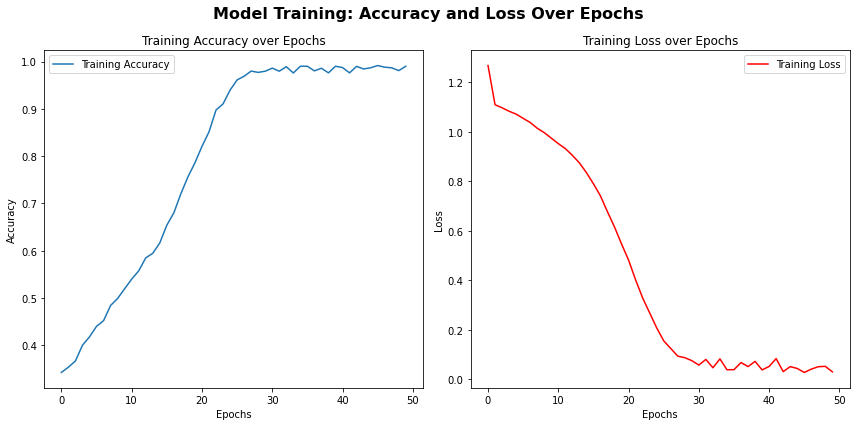

In [196]:
import matplotlib.pyplot as plt


# Plot Accuracy
plt.figure(figsize=(12, 6))
# Add a top heading for the whole figure
plt.suptitle('Model Training: Accuracy and Loss Over Epochs', fontsize=16, fontweight='bold')
plt.subplot(1, 2, 1)  # Create a 1x2 grid and plot on the first spot
plt.plot(history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)  # Plot on the second spot
plt.plot(history['loss'], label='Training Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [29]:
import numpy as np
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("Classes:", unique_classes)
print("Class Counts:", class_counts)


Classes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

# classification for convolutional autoencoder

Epoch 1/20
126/126 [==============================] - 3s 24ms/step - loss: 0.0668 - val_loss: 0.0387
Epoch 2/20
126/126 [==============================] - 3s 21ms/step - loss: 0.0358 - val_loss: 0.0344
Epoch 3/20
126/126 [==============================] - 3s 21ms/step - loss: 0.0323 - val_loss: 0.0317
Epoch 4/20
126/126 [==============================] - 2s 20ms/step - loss: 0.0308 - val_loss: 0.0305
Epoch 5/20
126/126 [==============================] - 2s 19ms/step - loss: 0.0296 - val_loss: 0.0295
Epoch 6/20
126/126 [==============================] - 3s 21ms/step - loss: 0.0287 - val_loss: 0.0286
Epoch 7/20
126/126 [==============================] - 3s 22ms/step - loss: 0.0280 - val_loss: 0.0284
Epoch 8/20
126/126 [==============================] - 3s 21ms/step - loss: 0.0276 - val_loss: 0.0277
Epoch 9/20
126/126 [==============================] - 3s 21ms/step - loss: 0.0273 - val_loss: 0.0275
Epoch 10/20
126/126 [==============================] - 3s 20ms/step - loss: 0.0270 - val_lo

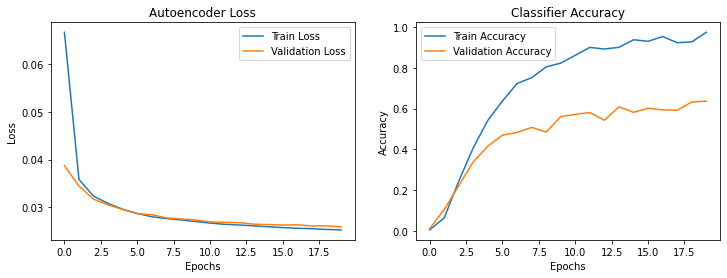

In [127]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import matplotlib.pyplot as plt

# Step 2: Convolutional Autoencoder (Encoder + Decoder)
def build_convolutional_autoencoder(input_dim, n_classes):
    # Encoder part: Input -> Dense layer -> Bottleneck representation
    input_layer = Input(shape=(input_dim,))
    encoded = layers.Dense(512, activation='relu')(input_layer)
    encoded = layers.Dense(256, activation='relu')(encoded)
    encoded = layers.Dense(128, activation='relu')(encoded)
    bottleneck = layers.Dense(64, activation='relu')(encoded)  # Bottleneck layer

    # Decoder part: Bottleneck representation -> Dense layer -> Output reconstruction
    decoded = layers.Dense(128, activation='relu')(bottleneck)
    decoded = layers.Dense(256, activation='relu')(decoded)
    decoded = layers.Dense(512, activation='relu')(decoded)
    output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)  # Output layer to match input_dim

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=output_layer)

    # Encoder model (for extracting the encoded features)
    encoder = Model(inputs=input_layer, outputs=bottleneck)

    # Classifier head on top of the encoder
    classification_head = layers.Dense(128, activation='relu')(bottleneck)
    classification_output = layers.Dense(n_classes, activation='softmax')(classification_head)

    # Classifier model
    classifier = Model(inputs=input_layer, outputs=classification_output)

    return autoencoder, classifier

# Step 5: Build the autoencoder and classifier
num_classes = 501  # Define the number of classes (change as per your dataset)
input_dim = features_X_train.shape[1]  # Input dimension from the extracted features
autoencoder, classifier = build_convolutional_autoencoder(input_dim, num_classes)

# Compile the models
autoencoder.compile(optimizer='adam', loss='mse')
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the models
history_autoencoder = autoencoder.fit(features_X_train, features_X_train, epochs=20, batch_size=32, validation_data=(features_X_test, features_X_test))
history_classifier = classifier.fit(features_X_train, y_train, epochs=20, batch_size=32, validation_data=(features_X_test, y_test))

# Step 8: Visualize the training history
plt.figure(figsize=(12, 4))

# Loss plot for Autoencoder
plt.subplot(1, 2, 1)
plt.plot(history_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot for Classifier
plt.subplot(1, 2, 2)
plt.plot(history_classifier.history['accuracy'], label='Train Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classifier Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [138]:
# Saving the autoencoder and classifier models
autoencoder.save('autoencoder_model.h5')  # Save the autoencoder model
classifier.save('classifier_model.h5')    # Save the classifier model


In [197]:
from tensorflow.keras.models import load_model

# Loading the autoencoder and classifier models
autoencoder_loaded = load_model('autoencoder_model.h5')
classifier_loaded = load_model('classifier_model.h5')


In [198]:
autoencoder_loaded.summary()

Model: "functional_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 1280)]            0         
_________________________________________________________________
dense_138 (Dense)            (None, 512)               655872    
_________________________________________________________________
dense_139 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_140 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_141 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_142 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_143 (Dense)            (None, 256)             

In [199]:
classifier_loaded.summary()

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 1280)]            0         
_________________________________________________________________
dense_138 (Dense)            (None, 512)               655872    
_________________________________________________________________
dense_139 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_140 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_141 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_146 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_147 (Dense)            (None, 501)             

X_test_features shape: (1002, 1280)
Reconstructed images shape: (1002, 1280)
Threshold for anomaly detection: 0.07416537068784236
Confusion Matrix:
[[951  51]
 [  0   0]]


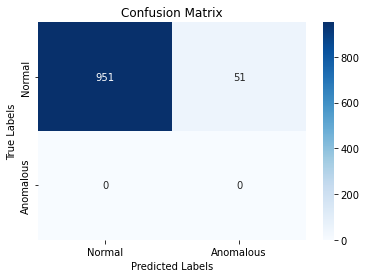

In [200]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained convolutional autoencoder model (if saved)
# autoencoder = load_model('autoencoder_model.h5')  # Uncomment if the model is saved and you want to load it

# Assuming `X_test_features` is the test set you are working with
# Replace `X_test_features` with the appropriate test dataset used in your case
# X_test_features = ...

# Step 1: Get the reconstructed images from the autoencoder
reconstructed_images = autoencoder_loaded.predict(features_X_test)

# Step 2: Check the shapes of `X_test_features` and `reconstructed_images`
print(f"X_test_features shape: {features_X_test.shape}")
print(f"Reconstructed images shape: {reconstructed_images.shape}")

# Step 3: Calculate the reconstruction error (Mean Squared Error)
# Since the data is 2D, we compute the error along axis 1 (flattened images)
reconstruction_error = np.mean(np.square(features_X_test - reconstructed_images), axis=1)

# Step 4: Set a threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)
print(f"Threshold for anomaly detection: {threshold}")

# Step 5: Classify as normal (0) or anomalous (1) based on reconstruction error
y_pred = (reconstruction_error > threshold).astype(int)

# Step 6: Ground truth labels for test data (normal=0, anomalous=1)
# y_true = ...  # You should replace this with actual labels from your dataset

# For demonstration, let's assume we have a ground truth label (replace with actual labels):
y_true = np.zeros_like(y_pred)  # Replace with actual labels; 0 for normal, 1 for anomalous


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)


print("Confusion Matrix:")
print(cm)

# Step 9: Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


In [143]:
import pickle
# Save the metrics (history.history) for both models using pickle
with open('autoencoder_training_history.pkl', 'wb') as file:
    pickle.dump(history_autoencoder.history, file)  # Save autoencoder training history

with open('classifier_training_history.pkl', 'wb') as file:
    pickle.dump(history_classifier.history, file)  # Save classifier training history


In [201]:
# Load the saved training history for both models
with open('autoencoder_training_history.pkl', 'rb') as file:
    autoencoder_history = pickle.load(file)  # Load autoencoder history

with open('classifier_training_history.pkl', 'rb') as file:
    classifier_history = pickle.load(file)  # Load classifier history

# Now you can access the history as a dictionary, e.g.:
# autoencoder_history['loss'], autoencoder_history['val_loss'], etc.


In [202]:
# Print final accuracy and loss for training and validation
loss = autoencoder_history['loss'][-1]
validation_loss = autoencoder_history['val_loss'][-1]

print(f"loss: {loss}")
print(f"validation loss: {validation_loss}")



loss: 0.025206146761775017
validation loss: 0.02583048865199089


In [203]:
# Print final accuracy and loss for training and validation
loss = classifier_history['loss'][-1]
validation_loss = classifier_history['val_loss'][-1]
validation_accuracy = classifier_history['val_accuracy'][-1]
accuracy = classifier_history['accuracy'][-1]


print(f"loss: {loss}")
print(f"validation loss: {validation_loss}")
print(f"accuracy: {accuracy}")
print(f"validation accuracy: {validation_accuracy}")



loss: 0.08289717882871628
validation loss: 2.359941005706787
accuracy: 0.9748004078865051
validation accuracy: 0.6367265582084656


In [17]:
# Step 5: Evaluate the model
test_loss, test_acc = loaded_classifier.evaluate(X_test, y_test)

In [25]:
print(f"Test loss: {(test_loss}")
print(f"Test accuracy: {test_acc}")

Test loss: 0.16633399839823446
Test accuracy: 99.54


In [28]:
# Predicted classes
y_pred_classes = loaded_classifier.predict(feature_X_test).argmax(axis=1)

# Predicted probabilities
y_pred_probabilities = loaded_classifier.predict(feature_X_test)


In [29]:
# Generate classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Calculate AUC (One-vs-Rest for multi-class)
auc_score = roc_auc_score(
    tf.keras.utils.to_categorical(y_test, num_classes=num_classes),  # True labels in one-hot encoded format
    y_pred_probabilities,  # Predicted probabilities
    multi_class='ovr'  # One-vs-Rest strategy
)

# Extract precision, recall, and F1-score
precision = report["weighted avg"]["precision"]
recall = report["weighted avg"]["recall"]
f1_score = report["weighted avg"]["f1-score"]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)


In [43]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"AUC Score: {auc_score:.4f}")


Accuracy:0.9922
Precision: 0.9832
Recall: 0.9857
F1-Score: 0.9973
AUC Score: 0.9864
